In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats
import seaborn as sns
%matplotlib inline

Text(0, 0.5, '$pdf(x)$')

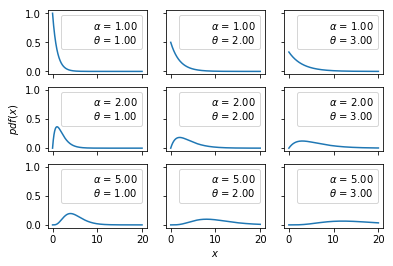

In [3]:
rates = [1, 2, 5]
scales = [1, 2, 3]

x = np.linspace(0, 20, 1000)
f, ax = plt.subplots(len(rates), len(scales), sharex=True, sharey=True)
for i in range(len(rates)):
    for j in range(len(scales)):
        rate = rates[i]
        scale = scales[j]
        rv = stats.gamma(a=rate, scale=scale)
        ax[i, j].plot(x, rv.pdf(x))
        ax[i, j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\theta$ = {:3.2f}".format(rate, scale), alpha=0)
        ax[i, j].legend()
ax[2, 1].set_xlabel('$x$')
ax[1, 0].set_ylabel('$pdf(x)$')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, '$y$')

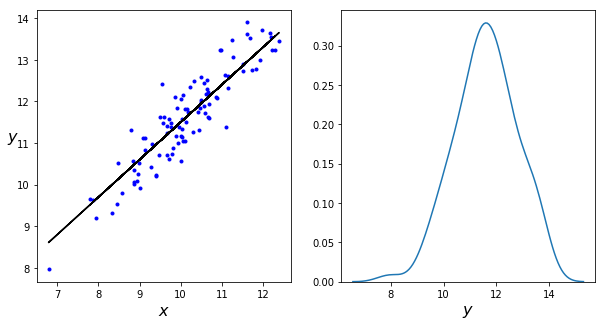

In [4]:
np.random.seed(314)
N = 100
alfa_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alfa_real + beta_real * x
y = y_real + eps_real

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, 'b.')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.plot(x, y_real, 'k')
plt.subplot(1, 2, 2)
sns.kdeplot(y)
plt.xlabel('$y$', fontsize=16)


In [5]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = pm.Deterministic('mu', alpha+beta*x)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step, start)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

logp = -531.72, ||grad|| = 651.01:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -2.8872e+16, ||grad|| = 6.8076e+16:   0%|          | 10/5000 [00:00<00:02, 1668.45it/s]

logp = -78.303, ||grad|| = 14.883:   0%|          | 20/5000 [00:00<00:02, 2224.09it/s]        

logp = -71.578, ||grad|| = 0.14936:   1%|          | 30/5000 [00:00<00:01, 2502.57it/s]

logp = -71.578, ||grad|| = 0.14936: 100%|██████████| 36/36 [00:00<00:00, 2402.47it/s]  

Multiprocess sampling (4 chains in 4 jobs)

CompoundStep

>Metropolis: [epsilon]

>Metropolis: [beta]

>Metropolis: [alpha]

Sampling 4 chains:   0%|          | 0/42000 [00:00<?, ?draws/s]

Sampling 4 chains:   0%|          | 72/42000 [00:00<00:58, 713.60draws/s]

Sampling 4 chains:   0%|          | 133/42000 [00:00<01:02, 674.73draws/s]

Sampling 4 chains:   0%|          | 197/42000 [00:00<01:03, 662.08draws/s]

Sampling 4 chains:   1%|          | 259/42000 [00:00<01:04, 647.04draws/s]

Sampling 4 chains:   1%|          | 324/42000 [00:00<01:04, 646.19draws/s]

Sampling 4 chains:   1%|          | 384/42000 [00:00<01:06, 627.85draws/s]

Sampling 4 chains:   1%|          | 449/42000 [00:00<01:05, 632.67draws/s]

Sampling 4 chains:   1%|          | 513/42000 [00:00<01:05, 631.29draws/s]

Sampling 4 chains:   1%|▏         | 573/42000 [00:00<01:06, 619.84draws/s]

Sampling 4 chains:   2%|▏         | 638/42000 [00:01<01:05, 626.96draws/s]

Sampling 4 chains:   2%|▏         | 701/42000 [00:01<01:05, 626.19draws/s]

Sampling 4 chains:   2%|▏         | 765/42000 [00:01<01:05, 628.60draws/s]

Sampling 4 chains:   2%|▏         | 827/42000 [00:01<01:06, 615.02draws/s]

Sampling 4 chains:   2%|▏         | 891/42000 [00:01<01:06, 620.69draws/s]

Sampling 4 chains:   2%|▏         | 953/42000 [00:01<01:07, 609.69draws/s]

Sampling 4 chains:   2%|▏         | 1017/42000 [00:01<01:06, 616.88draws/s]

Sampling 4 chains:   3%|▎         | 1079/42000 [00:01<01:06, 616.16draws/s]

Sampling 4 chains:   3%|▎         | 1141/42000 [00:01<01:06, 613.83draws/s]

Sampling 4 chains:   3%|▎         | 1204/42000 [00:01<01:06, 615.16draws/s]

Sampling 4 chains:   3%|▎         | 1266/42000 [00:02<01:06, 613.14draws/s]

Sampling 4 chains:   3%|▎         | 1328/42000 [00:02<01:07, 604.58draws/s]

Sampling 4 chains:   3%|▎         | 1389/42000 [00:02<01:07, 602.79draws/s]

Sampling 4 chains:   3%|▎         | 1450/42000 [00:02<01:07, 599.77draws/s]

Sampling 4 chains:   4%|▎         | 1510/42000 [00:02<01:08, 592.91draws/s]

Sampling 4 chains:   4%|▎         | 1570/42000 [00:02<01:08, 591.68draws/s]

Sampling 4 chains:   4%|▍         | 1634/42000 [00:02<01:06, 603.86draws/s]

Sampling 4 chains:   4%|▍         | 1698/42000 [00:02<01:05, 612.68draws/s]

Sampling 4 chains:   4%|▍         | 1761/42000 [00:02<01:05, 616.15draws/s]

Sampling 4 chains:   4%|▍         | 1825/42000 [00:02<01:04, 621.49draws/s]

Sampling 4 chains:   4%|▍         | 1890/42000 [00:03<01:04, 626.33draws/s]

Sampling 4 chains:   5%|▍         | 1953/42000 [00:03<01:05, 614.77draws/s]

Sampling 4 chains:   5%|▍         | 2017/42000 [00:03<01:04, 620.50draws/s]

Sampling 4 chains:   5%|▍         | 2081/42000 [00:03<01:03, 624.58draws/s]

Sampling 4 chains:   5%|▌         | 2146/42000 [00:03<01:03, 628.52draws/s]

Sampling 4 chains:   5%|▌         | 2212/42000 [00:03<01:02, 634.16draws/s]

Sampling 4 chains:   5%|▌         | 2276/42000 [00:03<01:02, 632.33draws/s]

Sampling 4 chains:   6%|▌         | 2340/42000 [00:03<01:03, 629.19draws/s]

Sampling 4 chains:   6%|▌         | 2405/42000 [00:03<01:02, 633.63draws/s]

Sampling 4 chains:   6%|▌         | 2469/42000 [00:03<01:02, 633.83draws/s]

Sampling 4 chains:   6%|▌         | 2533/42000 [00:04<01:02, 632.10draws/s]

Sampling 4 chains:   6%|▌         | 2597/42000 [00:04<01:02, 632.76draws/s]

Sampling 4 chains:   6%|▋         | 2661/42000 [00:04<01:02, 633.23draws/s]

Sampling 4 chains:   6%|▋         | 2725/42000 [00:04<01:03, 617.07draws/s]

Sampling 4 chains:   7%|▋         | 2790/42000 [00:04<01:02, 623.18draws/s]

Sampling 4 chains:   7%|▋         | 2853/42000 [00:04<01:02, 623.55draws/s]

Sampling 4 chains:   7%|▋         | 2917/42000 [00:04<01:02, 626.74draws/s]

Sampling 4 chains:   7%|▋         | 2982/42000 [00:04<01:01, 630.05draws/s]

Sampling 4 chains:   7%|▋         | 3050/42000 [00:04<01:00, 642.61draws/s]

Sampling 4 chains:   7%|▋         | 3117/42000 [00:04<01:00, 647.01draws/s]

Sampling 4 chains:   8%|▊         | 3185/42000 [00:05<00:59, 652.98draws/s]

Sampling 4 chains:   8%|▊         | 3251/42000 [00:05<00:59, 649.47draws/s]

Sampling 4 chains:   8%|▊         | 3318/42000 [00:05<00:59, 653.78draws/s]

Sampling 4 chains:   8%|▊         | 3384/42000 [00:05<00:59, 651.95draws/s]

Sampling 4 chains:   8%|▊         | 3450/42000 [00:05<00:59, 652.60draws/s]

Sampling 4 chains:   8%|▊         | 3516/42000 [00:05<00:59, 647.30draws/s]

Sampling 4 chains:   9%|▊         | 3582/42000 [00:05<00:59, 649.34draws/s]

Sampling 4 chains:   9%|▊         | 3647/42000 [00:05<00:59, 643.95draws/s]

Sampling 4 chains:   9%|▉         | 3714/42000 [00:05<00:59, 647.96draws/s]

Sampling 4 chains:   9%|▉         | 3779/42000 [00:06<00:59, 643.00draws/s]

Sampling 4 chains:   9%|▉         | 3845/42000 [00:06<00:59, 646.30draws/s]

Sampling 4 chains:   9%|▉         | 3910/42000 [00:06<00:58, 645.68draws/s]

Sampling 4 chains:   9%|▉         | 3976/42000 [00:06<00:58, 646.29draws/s]

Sampling 4 chains:  10%|▉         | 4041/42000 [00:06<00:59, 641.85draws/s]

Sampling 4 chains:  10%|▉         | 4108/42000 [00:06<00:58, 648.35draws/s]

Sampling 4 chains:  10%|▉         | 4173/42000 [00:06<00:58, 647.11draws/s]

Sampling 4 chains:  10%|█         | 4238/42000 [00:06<00:58, 642.41draws/s]

Sampling 4 chains:  10%|█         | 4303/42000 [00:06<00:58, 642.95draws/s]

Sampling 4 chains:  10%|█         | 4368/42000 [00:06<00:58, 643.33draws/s]

Sampling 4 chains:  11%|█         | 4433/42000 [00:07<00:58, 643.60draws/s]

Sampling 4 chains:  11%|█         | 4498/42000 [00:07<00:58, 643.79draws/s]

Sampling 4 chains:  11%|█         | 4563/42000 [00:07<00:58, 640.12draws/s]

Sampling 4 chains:  11%|█         | 4628/42000 [00:07<00:58, 639.45draws/s]

Sampling 4 chains:  11%|█         | 4694/42000 [00:07<00:57, 643.79draws/s]

Sampling 4 chains:  11%|█▏        | 4760/42000 [00:07<00:57, 644.96draws/s]

Sampling 4 chains:  11%|█▏        | 4825/42000 [00:07<00:57, 644.74draws/s]

Sampling 4 chains:  12%|█▏        | 4890/42000 [00:07<00:57, 642.67draws/s]

Sampling 4 chains:  12%|█▏        | 4956/42000 [00:07<00:57, 646.07draws/s]

Sampling 4 chains:  12%|█▏        | 5022/42000 [00:07<00:57, 648.47draws/s]

Sampling 4 chains:  12%|█▏        | 5087/42000 [00:08<00:57, 643.35draws/s]

Sampling 4 chains:  12%|█▏        | 5152/42000 [00:08<00:57, 641.71draws/s]

Sampling 4 chains:  12%|█▏        | 5218/42000 [00:08<00:57, 643.50draws/s]

Sampling 4 chains:  13%|█▎        | 5285/42000 [00:08<00:56, 649.53draws/s]

Sampling 4 chains:  13%|█▎        | 5294/42000 [00:08<01:01, 598.53draws/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

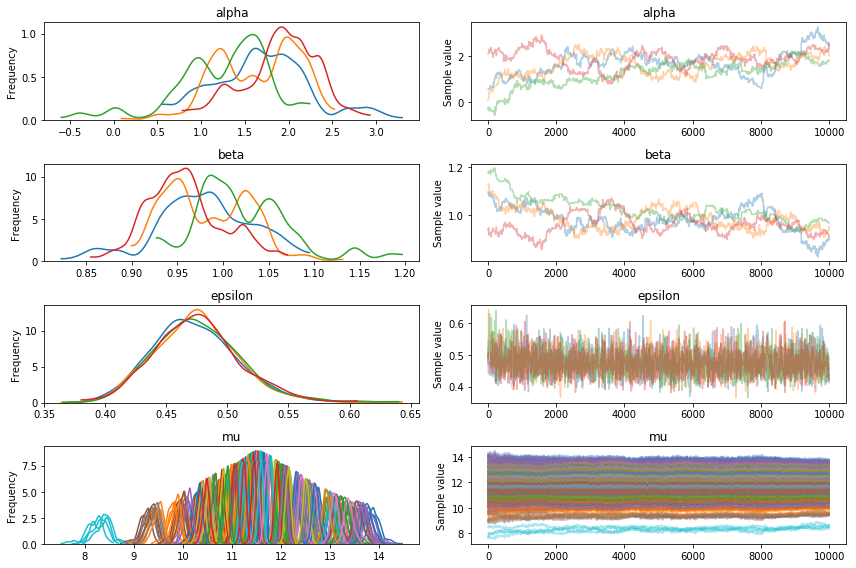

In [6]:
pm.traceplot(trace)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D05A0EDEF0>,
      dtype=object)

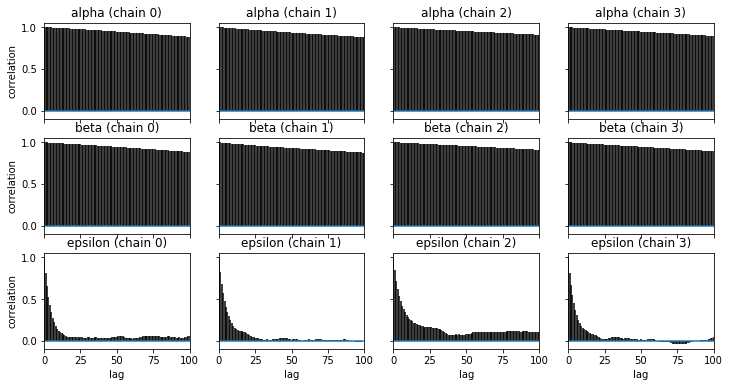

In [8]:
varnames = ['alpha', 'beta', 'epsilon']
pm.autocorrplot(trace, varnames)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, '$\\beta$')

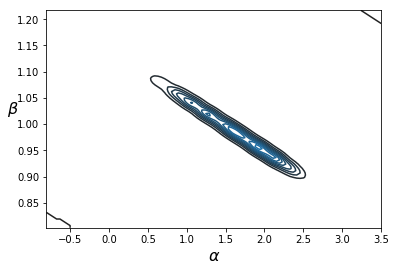

In [9]:
sns.kdeplot(trace['alpha'], trace['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)

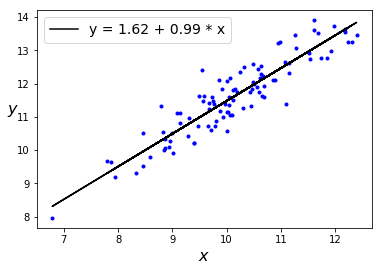

In [11]:
plt.plot(x, y, 'b.')
alpha_m = trace['alpha'].mean()
beta_m = trace['beta'].mean()
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)

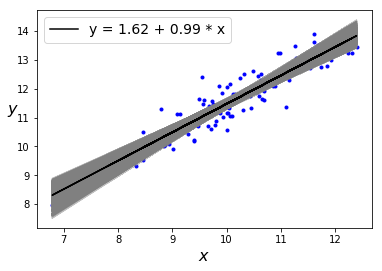

In [12]:
plt.plot(x, y, 'b.')

idx = range(0, len(trace['alpha']), 10)
plt.plot(x, trace['alpha'][idx] + trace['beta'][idx] * x[:, np.newaxis], c='gray', alpha=0.5)
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)

Text(0, 0.5, '$y$')

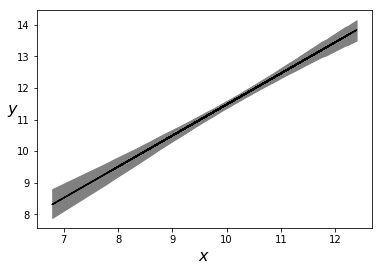

In [13]:
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))

idx = np.argsort(x)
x_ord = x[idx]
sig = pm.hpd(trace['mu'], alpha=0.02)[idx]
plt.fill_between(x_ord, sig[:, 0], sig[:, 1], color='gray')

plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

 19%|█▉        | 189/1000 [00:00<00:00, 1873.21it/s]

 44%|████▎     | 436/1000 [00:00<00:00, 2015.16it/s]

 68%|██████▊   | 677/1000 [00:00<00:00, 2114.32it/s]

 86%|████████▋ | 863/1000 [00:00<00:00, 2025.07it/s]

100%|██████████| 1000/1000 [00:00<00:00, 2171.41it/s]

Text(0, 0.5, '$y$')

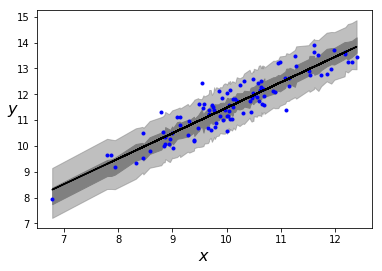

In [14]:
ppc = pm.sample_posterior_predictive(trace, samples=1000, model=model)

plt.plot(x, y, 'b.')
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))

sig0 = pm.hpd(ppc['y_pred'], alpha=0.5)[idx]
sig1 = pm.hpd(ppc['y_pred'], alpha=0.05)[idx]
plt.fill_between(x_ord, sig0[:, 0], sig0[:, 1], color='gray', alpha=1)
plt.fill_between(x_ord, sig1[:, 0], sig1[:, 1], color='gray', alpha=0.5)

plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

logp = -531.72, ||grad|| = 651.01:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -2.8872e+16, ||grad|| = 6.8076e+16:   0%|          | 10/5000 [00:00<00:01, 2502.12it/s]

logp = -78.303, ||grad|| = 14.883:   0%|          | 20/5000 [00:00<00:01, 2859.79it/s]        

logp = -71.578, ||grad|| = 0.14936:   1%|          | 30/5000 [00:00<00:01, 2729.72it/s]

logp = -71.578, ||grad|| = 0.14936: 100%|██████████| 36/36 [00:00<00:00, 2771.92it/s]  

Multiprocess sampling (4 chains in 4 jobs)

NUTS: [epsilon, beta, alpha]

Sampling 4 chains:   0%|          | 0/10000 [00:00<?, ?draws/s]

Sampling 4 chains:   0%|          | 34/10000 [00:00<00:29, 336.98draws/s]

Sampling 4 chains:   1%|          | 63/10000 [00:00<00:31, 317.25draws/s]

Sampling 4 chains:   1%|          | 96/10000 [00:00<00:30, 320.14draws/s]

Sampling 4 chains:   1%|▏         | 127/10000 [00:00<00:31, 316.16draws/s]

Sampling 4 chains:   2%|▏         | 172/10000 [00:00<00:28, 346.41draws/s]

Sampling 4 chains:   2%|▏         | 208/10000 [00:00<00:28, 345.44draws/s]

Sampling 4 chains:   2%|▎         | 250/10000 [00:00<00:26, 364.02draws/s]

Sampling 4 chains:   3%|▎         | 285/10000 [00:00<00:28, 345.96draws/s]

Sampling 4 chains:   3%|▎         | 319/10000 [00:00<00:29, 330.23draws/s]

Sampling 4 chains:   4%|▎         | 373/10000 [00:01<00:25, 372.32draws/s]

Sampling 4 chains:   4%|▍         | 436/10000 [00:01<00:22, 423.63draws/s]

Sampling 4 chains:   5%|▌         | 520/10000 [00:01<00:19, 496.84draws/s]

Sampling 4 chains:   6%|▌         | 600/10000 [00:01<00:16, 559.51draws/s]

Sampling 4 chains:   7%|▋         | 683/10000 [00:01<00:15, 618.90draws/s]

Sampling 4 chains:   8%|▊         | 766/10000 [00:01<00:13, 668.57draws/s]

Sampling 4 chains:   9%|▊         | 858/10000 [00:01<00:12, 726.73draws/s]

Sampling 4 chains:   9%|▉         | 942/10000 [00:01<00:11, 755.54draws/s]

Sampling 4 chains:  10%|█         | 1022/10000 [00:01<00:12, 734.73draws/s]

Sampling 4 chains:  11%|█         | 1099/10000 [00:01<00:12, 726.23draws/s]

Sampling 4 chains:  12%|█▏        | 1174/10000 [00:02<00:12, 704.51draws/s]

Sampling 4 chains:  12%|█▏        | 1247/10000 [00:02<00:12, 703.95draws/s]

Sampling 4 chains:  13%|█▎        | 1331/10000 [00:02<00:11, 738.15draws/s]

Sampling 4 chains:  14%|█▍        | 1434/10000 [00:02<00:10, 805.03draws/s]

Sampling 4 chains:  15%|█▌        | 1541/10000 [00:02<00:09, 865.64draws/s]

Sampling 4 chains:  16%|█▋        | 1636/10000 [00:02<00:09, 887.09draws/s]

Sampling 4 chains:  17%|█▋        | 1733/10000 [00:02<00:09, 905.61draws/s]

Sampling 4 chains:  18%|█▊        | 1837/10000 [00:02<00:08, 939.84draws/s]

Sampling 4 chains:  19%|█▉        | 1938/10000 [00:02<00:08, 957.39draws/s]

Sampling 4 chains:  20%|██        | 2035/10000 [00:03<00:08, 958.59draws/s]

Sampling 4 chains:  21%|██▏       | 2132/10000 [00:03<00:08, 953.77draws/s]

Sampling 4 chains:  22%|██▏       | 2234/10000 [00:03<00:08, 967.47draws/s]

Sampling 4 chains:  23%|██▎       | 2349/10000 [00:03<00:07, 1013.43draws/s]

Sampling 4 chains:  25%|██▍       | 2460/10000 [00:03<00:07, 1037.97draws/s]

Sampling 4 chains:  26%|██▌       | 2565/10000 [00:03<00:07, 1005.81draws/s]

Sampling 4 chains:  27%|██▋       | 2670/10000 [00:03<00:07, 1013.24draws/s]

Sampling 4 chains:  28%|██▊       | 2788/10000 [00:03<00:06, 1055.56draws/s]

Sampling 4 chains:  29%|██▉       | 2895/10000 [00:03<00:06, 1050.81draws/s]

Sampling 4 chains:  30%|███       | 3001/10000 [00:03<00:06, 1050.74draws/s]

Sampling 4 chains:  31%|███       | 3107/10000 [00:04<00:06, 1047.58draws/s]

Sampling 4 chains:  32%|███▏      | 3217/10000 [00:04<00:06, 1060.02draws/s]

Sampling 4 chains:  33%|███▎      | 3329/10000 [00:04<00:06, 1074.55draws/s]

Sampling 4 chains:  34%|███▍      | 3442/10000 [00:04<00:06, 1087.78draws/s]

Sampling 4 chains:  36%|███▌      | 3551/10000 [00:04<00:06, 1051.02draws/s]

Sampling 4 chains:  37%|███▋      | 3668/10000 [00:04<00:05, 1081.40draws/s]

Sampling 4 chains:  38%|███▊      | 3777/10000 [00:04<00:05, 1062.13draws/s]

Sampling 4 chains:  39%|███▉      | 3884/10000 [00:04<00:05, 1061.64draws/s]

Sampling 4 chains:  40%|███▉      | 3993/10000 [00:04<00:05, 1067.17draws/s]

Sampling 4 chains:  41%|████      | 4100/10000 [00:04<00:05, 1058.84draws/s]

Sampling 4 chains:  42%|████▏     | 4207/10000 [00:05<00:05, 1053.09draws/s]

Sampling 4 chains:  43%|████▎     | 4313/10000 [00:05<00:05, 1052.33draws/s]

Sampling 4 chains:  44%|████▍     | 4425/10000 [00:05<00:05, 1065.96draws/s]

Sampling 4 chains:  45%|████▌     | 4545/10000 [00:05<00:04, 1097.18draws/s]

Sampling 4 chains:  47%|████▋     | 4656/10000 [00:05<00:05, 1066.45draws/s]

Sampling 4 chains:  48%|████▊     | 4773/10000 [00:05<00:04, 1092.78draws/s]

Sampling 4 chains:  49%|████▉     | 4883/10000 [00:05<00:04, 1069.73draws/s]

Sampling 4 chains:  50%|████▉     | 4996/10000 [00:05<00:04, 1084.32draws/s]

Sampling 4 chains:  51%|█████     | 5106/10000 [00:05<00:04, 1086.09draws/s]

Sampling 4 chains:  52%|█████▏    | 5215/10000 [00:05<00:04, 1071.57draws/s]

Sampling 4 chains:  53%|█████▎    | 5323/10000 [00:06<00:04, 1028.42draws/s]

Sampling 4 chains:  54%|█████▍    | 5435/10000 [00:06<00:04, 1051.62draws/s]

Sampling 4 chains:  56%|█████▌    | 5559/10000 [00:06<00:04, 1096.30draws/s]

Sampling 4 chains:  57%|█████▋    | 5676/10000 [00:06<00:03, 1114.55draws/s]

Sampling 4 chains:  58%|█████▊    | 5789/10000 [00:06<00:03, 1087.20draws/s]

Sampling 4 chains:  59%|█████▉    | 5899/10000 [00:06<00:03, 1069.09draws/s]

Sampling 4 chains:  60%|██████    | 6007/10000 [00:06<00:03, 1063.17draws/s]

Sampling 4 chains:  61%|██████    | 6115/10000 [00:06<00:03, 1065.33draws/s]

Sampling 4 chains:  62%|██████▏   | 6222/10000 [00:06<00:03, 1027.14draws/s]

Sampling 4 chains:  63%|██████▎   | 6335/10000 [00:07<00:03, 1053.33draws/s]

Sampling 4 chains:  64%|██████▍   | 6441/10000 [00:07<00:03, 1046.27draws/s]

Sampling 4 chains:  66%|██████▌   | 6561/10000 [00:07<00:03, 1085.44draws/s]

Sampling 4 chains:  67%|██████▋   | 6671/10000 [00:07<00:03, 1083.67draws/s]

Sampling 4 chains:  68%|██████▊   | 6780/10000 [00:07<00:03, 1063.66draws/s]

Sampling 4 chains:  69%|██████▉   | 6887/10000 [00:07<00:02, 1047.12draws/s]

Sampling 4 chains:  70%|███████   | 7001/10000 [00:07<00:02, 1070.65draws/s]

Sampling 4 chains:  71%|███████   | 7109/10000 [00:07<00:02, 1051.82draws/s]

Sampling 4 chains:  72%|███████▏  | 7217/10000 [00:07<00:02, 1057.33draws/s]

Sampling 4 chains:  73%|███████▎  | 7331/10000 [00:07<00:02, 1078.09draws/s]

Sampling 4 chains:  74%|███████▍  | 7446/10000 [00:08<00:02, 1095.89draws/s]

Sampling 4 chains:  76%|███████▌  | 7556/10000 [00:08<00:02, 1065.59draws/s]

Sampling 4 chains:  77%|███████▋  | 7663/10000 [00:08<00:02, 1057.75draws/s]

Sampling 4 chains:  78%|███████▊  | 7771/10000 [00:08<00:02, 1058.40draws/s]

Sampling 4 chains:  79%|███████▉  | 7884/10000 [00:08<00:01, 1076.14draws/s]

Sampling 4 chains:  80%|███████▉  | 7992/10000 [00:08<00:01, 1052.45draws/s]

Sampling 4 chains:  81%|████████  | 8098/10000 [00:08<00:01, 1018.56draws/s]

Sampling 4 chains:  82%|████████▏ | 8211/10000 [00:08<00:01, 1047.00draws/s]

Sampling 4 chains:  83%|████████▎ | 8317/10000 [00:08<00:01, 1017.91draws/s]

Sampling 4 chains:  84%|████████▍ | 8420/10000 [00:09<00:01, 989.46draws/s] 

Sampling 4 chains:  85%|████████▌ | 8521/10000 [00:09<00:01, 992.90draws/s]

Sampling 4 chains:  86%|████████▋ | 8628/10000 [00:09<00:01, 1009.39draws/s]

Sampling 4 chains:  87%|████████▋ | 8730/10000 [00:09<00:02, 475.33draws/s] 

Sampling 4 chains:  88%|████████▊ | 8819/10000 [00:09<00:02, 551.64draws/s]

Sampling 4 chains:  89%|████████▉ | 8914/10000 [00:09<00:01, 628.65draws/s]

Sampling 4 chains:  90%|████████▉ | 8999/10000 [00:10<00:03, 331.02draws/s]

Sampling 4 chains:  91%|█████████ | 9063/10000 [00:10<00:02, 374.26draws/s]

Sampling 4 chains:  91%|█████████▏| 9126/10000 [00:10<00:02, 425.39draws/s]

Sampling 4 chains:  92%|█████████▏| 9194/10000 [00:10<00:01, 477.30draws/s]

Sampling 4 chains:  93%|█████████▎| 9257/10000 [00:10<00:01, 502.55draws/s]

Sampling 4 chains:  93%|█████████▎| 9319/10000 [00:11<00:02, 248.01draws/s]

Sampling 4 chains:  94%|█████████▎| 9366/10000 [00:11<00:02, 256.82draws/s]

Sampling 4 chains:  94%|█████████▍| 9407/10000 [00:11<00:02, 271.50draws/s]

Sampling 4 chains:  94%|█████████▍| 9445/10000 [00:11<00:01, 284.99draws/s]

Sampling 4 chains:  95%|█████████▍| 9482/10000 [00:11<00:01, 281.72draws/s]

Sampling 4 chains:  95%|█████████▌| 9516/10000 [00:12<00:01, 283.70draws/s]

Sampling 4 chains:  95%|█████████▌| 9549/10000 [00:12<00:01, 290.00draws/s]

Sampling 4 chains:  96%|█████████▌| 9581/10000 [00:12<00:01, 293.56draws/s]

Sampling 4 chains:  96%|█████████▌| 9613/10000 [00:12<00:01, 295.28draws/s]

Sampling 4 chains:  96%|█████████▋| 9644/10000 [00:12<00:01, 297.05draws/s]

Sampling 4 chains:  97%|█████████▋| 9679/10000 [00:12<00:01, 309.61draws/s]

Sampling 4 chains:  97%|█████████▋| 9711/10000 [00:12<00:00, 303.85draws/s]

Sampling 4 chains:  97%|█████████▋| 9742/10000 [00:12<00:00, 301.31draws/s]

Sampling 4 chains:  98%|█████████▊| 9773/10000 [00:12<00:00, 286.29draws/s]

Sampling 4 chains:  98%|█████████▊| 9807/10000 [00:13<00:00, 298.24draws/s]

Sampling 4 chains:  98%|█████████▊| 9838/10000 [00:13<00:00, 296.57draws/s]

Sampling 4 chains:  99%|█████████▉| 9879/10000 [00:13<00:00, 322.73draws/s]

Sampling 4 chains:  99%|█████████▉| 9913/10000 [00:13<00:00, 299.28draws/s]

Sampling 4 chains:  99%|█████████▉| 9944/10000 [00:13<00:00, 289.80draws/s]

Sampling 4 chains: 100%|█████████▉| 9974/10000 [00:13<00:00, 287.82draws/s]

Sampling 4 chains: 100%|██████████| 10000/10000 [00:14<00:00, 711.16draws/s]

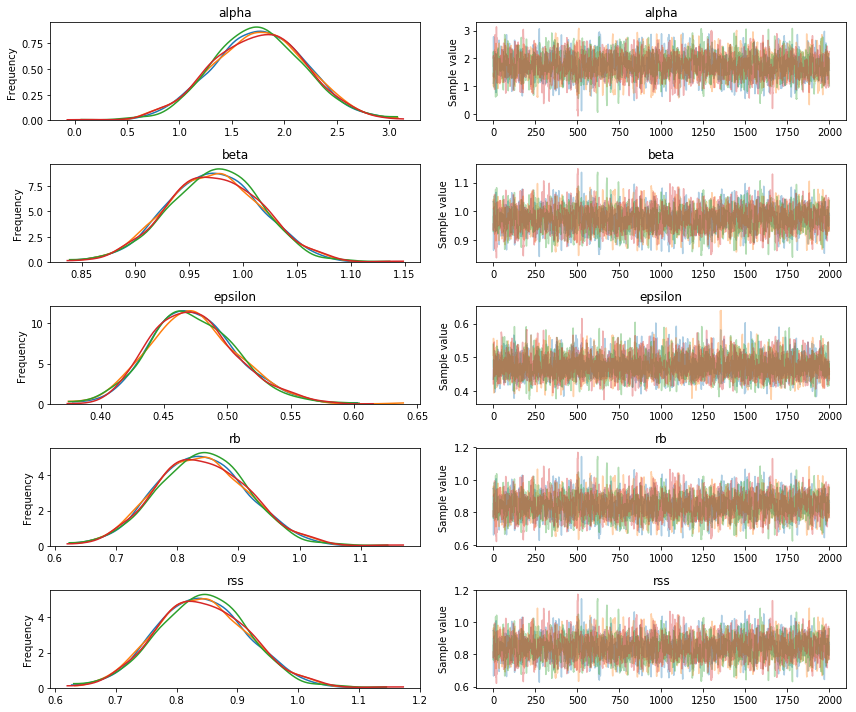

In [15]:
with pm.Model() as model_n:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = alpha + beta * x
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    rb = pm.Deterministic('rb', (beta * x.std() / y.std()) ** 2)
    
    y_mean = y.mean()
    ss_reg = pm.math.sum((mu - y_mean) ** 2)
    ss_tot = pm.math.sum((y - y_mean) ** 2)
    rss = pm.Deterministic('rss', ss_reg/ss_tot)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_n = pm.sample(2000, step=step, start=start)
pm.traceplot(trace_n)
plt.show()

In [16]:
pm.summary(trace_n, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,1.750798,0.441416,0.007715,0.917039,2.639987,2609.739304,0.999981
beta,0.972779,0.043392,0.000750,0.887013,1.055851,2619.502901,0.999996
epsilon,0.473504,0.034472,0.000595,0.408847,0.542815,3580.608927,0.999827


Text(0.5, 0, '$x_2$')

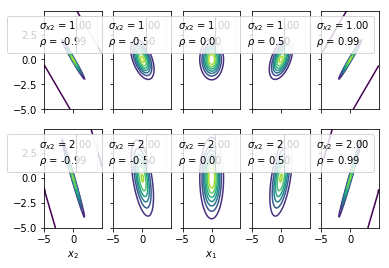

In [17]:
sigma_x1 = 1
sigmas_x2 = [1, 2]
rhos = [-0.99, -0.5, 0, 0.5, 0.99]

x, y = np.mgrid[-5:5:0.1, -5:5:0.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
f, ax = plt.subplots(len(sigmas_x2), len(rhos), sharex=True, sharey=True)

for i in range(2):
    for j in range(5):
        sigma_x2 = sigmas_x2[i]
        rho = rhos[j]
        cov = [[sigma_x1**2, sigma_x1*sigma_x2*rho], [sigma_x1*sigma_x2*rho, sigma_x2**2]]
        rv = stats.multivariate_normal([0, 0], cov)
        ax[i, j].contour(x, y, rv.pdf(pos))
        ax[i, j].plot(0, 0, label="$\\sigma_{{x2}}$ = {:3.2f}\n$\\rho$ = {:3.2f}".format(sigma_x2, rho), alpha=0)
        ax[i, j].legend()
ax[1, 2].set_xlabel('$x_1$')
ax[1, 0].set_xlabel('$x_2$')

In [25]:
with pm.Model() as pearson_model:
    data = np.stack((x, y)).T
    mu = pm.Normal('mu', mu=0, sd=10, shape=2)
    
    sigma_1 = pm.HalfNormal('sigma_1', 10)
    sigma_2 = pm.HalfNormal('sigma_2', 10)
    rho = pm.Uniform('rho', -1, 1)
    
    cov = pm.math.stack(([sigma_1**2, sigma_1*sigma_2*rho], [sigma_1*sigma_2*rho, sigma_2**2]))
    
    y_pred = pm.MvNormal('y_pred', mu=mu, cov=cov, observed=data)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_p = pm.sample(1000, step=step, start=start)
    

[[-5.   -0.05]
 [-4.9  -0.05]
 [-4.8  -0.05]
 [-4.7  -0.05]
 [-4.6  -0.05]
 [-4.5  -0.05]
 [-4.4  -0.05]
 [-4.3  -0.05]
 [-4.2  -0.05]
 [-4.1  -0.05]
 [-4.   -0.05]
 [-3.9  -0.05]
 [-3.8  -0.05]
 [-3.7  -0.05]
 [-3.6  -0.05]
 [-3.5  -0.05]
 [-3.4  -0.05]
 [-3.3  -0.05]
 [-3.2  -0.05]
 [-3.1  -0.05]
 [-3.   -0.05]
 [-2.9  -0.05]
 [-2.8  -0.05]
 [-2.7  -0.05]
 [-2.6  -0.05]
 [-2.5  -0.05]
 [-2.4  -0.05]
 [-2.3  -0.05]
 [-2.2  -0.05]
 [-2.1  -0.05]
 [-2.   -0.05]
 [-1.9  -0.05]
 [-1.8  -0.05]
 [-1.7  -0.05]
 [-1.6  -0.05]
 [-1.5  -0.05]
 [-1.4  -0.05]
 [-1.3  -0.05]
 [-1.2  -0.05]
 [-1.1  -0.05]
 [-1.   -0.05]
 [-0.9  -0.05]
 [-0.8  -0.05]
 [-0.7  -0.05]
 [-0.6  -0.05]
 [-0.5  -0.05]
 [-0.4  -0.05]
 [-0.3  -0.05]
 [-0.2  -0.05]
 [-0.1  -0.05]
 [ 0.   -0.05]
 [ 0.1  -0.05]
 [ 0.2  -0.05]
 [ 0.3  -0.05]
 [ 0.4  -0.05]
 [ 0.5  -0.05]
 [ 0.6  -0.05]
 [ 0.7  -0.05]
 [ 0.8  -0.05]
 [ 0.9  -0.05]
 [ 1.   -0.05]
 [ 1.1  -0.05]
 [ 1.2  -0.05]
 [ 1.3  -0.05]
 [ 1.4  -0.05]
 [ 1.5  -0.05]
 [ 1.6  -0

Exception: 

In [2]:
ans = sns.load_dataset('anscombe')
x_3 = ans[ans.dataset == 'III']['x'].values
y_3 = ans[ans.dataset == 'III']['y'].values

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, '$y$')

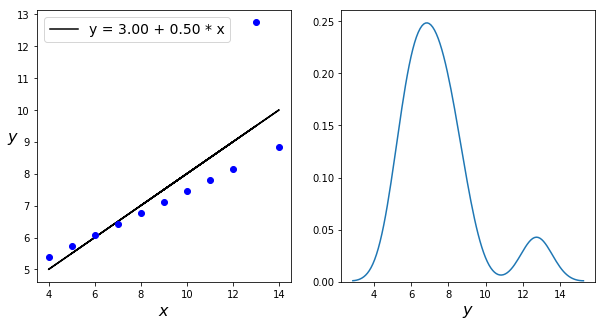

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]
plt.plot(x_3, (alpha_c + beta_c*x_3), 'k', label='y = {:.2f} + {:.2f} * x'.format(alpha_c, beta_c))
plt.plot(x_3, y_3, 'bo')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=0, fontsize=14)
plt.subplot(1, 2, 2)
sns.kdeplot(y_3)
plt.xlabel('$y$', fontsize=16)

In [4]:
with pm.Model() as model_t:
    alpha = pm.Normal('alpha', mu=0, sd=100)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    nu = pm.Deterministic('nu', pm.Exponential('nu_', lam=1/29)+1)
    
    y_pred = pm.StudentT('y_pred', mu=alpha+beta*x_3, sd=epsilon, nu=nu, observed=y_3)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_t = pm.sample(2000, step=step, start=start, chains=1)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

logp = -54.09, ||grad|| = 31.783:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -32.894, ||grad|| = 2.6927:   0%|          | 10/5000 [00:00<00:02, 2001.96it/s]

logp = -25.91, ||grad|| = 20.295:   0%|          | 20/5000 [00:00<00:01, 2502.72it/s] 

logp = -19.737, ||grad|| = 1,801.7:   1%|          | 30/5000 [00:00<00:01, 2502.57it/s]

logp = -114.04, ||grad|| = 5,174.1:   1%|          | 40/5000 [00:00<00:01, 2502.53it/s]

logp = -3.8617, ||grad|| = 4,069:   1%|          | 50/5000 [00:00<00:01, 2634.28it/s]  

logp = -1.7234, ||grad|| = 94.271:   1%|          | 60/5000 [00:00<00:01, 2611.38it/s]

logp = 0.6375, ||grad|| = 11,702:   1%|▏         | 70/5000 [00:00<00:01, 2695.10it/s] 

logp = 17.601, ||grad|| = 439.78:   2%|▏         | 80/5000 [00:00<00:01, 2583.30it/s]

logp = 21.528, ||grad|| = 5,868.1:   2%|▏         | 90/5000 [00:00<00:01, 2649.80it/s]

logp = 23.109, ||grad|| = 30,487:   2%|▏         | 100/5000 [00:00<00:01, 2634.30it/s]

logp = 24.485, ||grad|| = 4.4909e+05:   2%|▏         | 110/5000 [00:00<00:01, 2621.72it/s]

logp = 25.387, ||grad|| = 3.7806e+05:   2%|▏         | 120/5000 [00:00<00:01, 2611.39it/s]

logp = -4,084.1, ||grad|| = 88.023:   3%|▎         | 130/5000 [00:00<00:01, 2602.65it/s]  

logp = -59.792, ||grad|| = 17,087:   3%|▎         | 140/5000 [00:00<00:01, 2644.22it/s] 

logp = -59.792, ||grad|| = 17,087: 100%|██████████| 144/144 [00:00<00:00, 2620.87it/s] 

C:\ProgramData\Anaconda3\lib\site-packages\theano\gpuarray\dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "


Sequential sampling (1 chains in 1 job)

NUTS: [nu_, epsilon, beta, alpha]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 12/2500 [00:00<00:23, 107.25it/s]

  1%|          | 17/2500 [00:00<00:31, 78.00it/s] 

  1%|          | 21/2500 [00:00<00:41, 60.45it/s]

  1%|          | 26/2500 [00:00<00:44, 55.39it/s]

  1%|▏         | 32/2500 [00:00<00:44, 55.46it/s]

  1%|▏         | 37/2500 [00:00<00:51, 48.14it/s]

  2%|▏         | 42/2500 [00:00<00:50, 48.27it/s]

  2%|▏         | 47/2500 [00:00<00:55, 43.91it/s]

  2%|▏         | 53/2500 [00:01<00:52, 46.54it/s]

  2%|▏         | 58/2500 [00:01<00:51, 47.14it/s]

  3%|▎         | 63/2500 [00:01<00:51, 47.70it/s]

  3%|▎         | 68/2500 [00:01<00:59, 40.91it/s]

  3%|▎         | 73/2500 [00:01<00:57, 42.51it/s]

  3%|▎         | 78/2500 [00:01<00:54, 44.05it/s]

  3%|▎         | 83/2500 [00:01<00:58, 41.59it/s]

  4%|▎         | 88/2500 [00:01<00:56, 42.58it/s]

  4%|▎         | 93/2500 [00:01<00:54, 44.34it/s]

  4%|▍         | 98/2500 [00:02<00:56, 42.20it/s]

  4%|▍         | 103/2500 [00:02<00:55, 43.36it/s]

  4%|▍         | 108/2500 [00:02<00:57, 41.47it/s]

  5%|▍         | 113/2500 [00:02<00:58, 40.93it/s]

  5%|▍         | 118/2500 [00:02<01:00, 39.60it/s]

  5%|▍         | 123/2500 [00:02<00:57, 41.20it/s]

  5%|▌         | 128/2500 [00:02<00:55, 43.06it/s]

  5%|▌         | 133/2500 [00:02<00:53, 44.23it/s]

  6%|▌         | 138/2500 [00:03<00:52, 44.60it/s]

  6%|▌         | 145/2500 [00:03<00:49, 48.00it/s]

  6%|▌         | 150/2500 [00:03<00:48, 48.32it/s]

  6%|▌         | 155/2500 [00:03<00:54, 42.81it/s]

  6%|▋         | 160/2500 [00:03<00:52, 44.16it/s]

  7%|▋         | 169/2500 [00:03<00:46, 50.05it/s]

  7%|▋         | 175/2500 [00:03<00:47, 48.47it/s]

  7%|▋         | 181/2500 [00:03<00:52, 43.99it/s]

  7%|▋         | 186/2500 [00:04<00:51, 45.03it/s]

  8%|▊         | 191/2500 [00:04<00:54, 42.20it/s]

  8%|▊         | 197/2500 [00:04<00:51, 44.48it/s]

  8%|▊         | 202/2500 [00:04<01:01, 37.53it/s]

  8%|▊         | 207/2500 [00:04<01:21, 28.08it/s]

  8%|▊         | 211/2500 [00:05<02:05, 18.24it/s]

  9%|▊         | 214/2500 [00:05<02:26, 15.61it/s]

  9%|▊         | 217/2500 [00:05<02:41, 14.10it/s]

  9%|▉         | 219/2500 [00:05<02:52, 13.23it/s]

  9%|▉         | 223/2500 [00:05<02:26, 15.59it/s]

  9%|▉         | 225/2500 [00:06<02:31, 15.04it/s]

  9%|▉         | 227/2500 [00:06<02:31, 15.05it/s]

  9%|▉         | 229/2500 [00:06<03:12, 11.78it/s]

  9%|▉         | 231/2500 [00:06<02:59, 12.65it/s]

  9%|▉         | 233/2500 [00:06<03:32, 10.67it/s]

  9%|▉         | 235/2500 [00:07<03:26, 10.96it/s]

  9%|▉         | 237/2500 [00:07<03:12, 11.75it/s]

 10%|▉         | 239/2500 [00:07<03:00, 12.51it/s]

 10%|▉         | 241/2500 [00:07<02:58, 12.65it/s]

 10%|▉         | 244/2500 [00:07<02:28, 15.24it/s]

 10%|▉         | 246/2500 [00:07<02:34, 14.58it/s]

 10%|▉         | 248/2500 [00:07<02:33, 14.69it/s]

 10%|█         | 250/2500 [00:08<03:14, 11.55it/s]

 10%|█         | 252/2500 [00:08<03:42, 10.10it/s]

 10%|█         | 254/2500 [00:08<03:20, 11.21it/s]

 10%|█         | 256/2500 [00:08<03:46,  9.92it/s]

 10%|█         | 258/2500 [00:08<03:23, 10.99it/s]

 10%|█         | 261/2500 [00:09<02:52, 13.00it/s]

 11%|█         | 263/2500 [00:09<02:45, 13.50it/s]

 11%|█         | 265/2500 [00:09<03:21, 11.08it/s]

 11%|█         | 267/2500 [00:09<03:05, 12.06it/s]

 11%|█         | 269/2500 [00:09<02:54, 12.80it/s]

 11%|█         | 271/2500 [00:09<03:27, 10.73it/s]

 11%|█         | 273/2500 [00:10<03:08, 11.80it/s]

 11%|█         | 275/2500 [00:10<03:36, 10.27it/s]

 11%|█         | 277/2500 [00:10<03:15, 11.39it/s]

 11%|█         | 279/2500 [00:10<03:41, 10.05it/s]

 11%|█▏        | 283/2500 [00:10<03:01, 12.19it/s]

 11%|█▏        | 285/2500 [00:11<02:50, 12.98it/s]

 11%|█▏        | 287/2500 [00:11<03:24, 10.84it/s]

 12%|█▏        | 289/2500 [00:11<03:06, 11.85it/s]

 12%|█▏        | 291/2500 [00:11<03:34, 10.30it/s]

 12%|█▏        | 293/2500 [00:11<03:13, 11.43it/s]

 12%|█▏        | 295/2500 [00:11<02:59, 12.28it/s]

 12%|█▏        | 298/2500 [00:12<02:36, 14.06it/s]

 12%|█▏        | 300/2500 [00:12<03:20, 10.96it/s]

 12%|█▏        | 302/2500 [00:12<03:04, 11.89it/s]

 12%|█▏        | 304/2500 [00:12<03:36, 10.16it/s]

 12%|█▏        | 306/2500 [00:12<03:16, 11.16it/s]

 12%|█▏        | 308/2500 [00:13<03:01, 12.08it/s]

 12%|█▏        | 310/2500 [00:13<03:31, 10.37it/s]

 12%|█▏        | 312/2500 [00:13<03:11, 11.43it/s]

 13%|█▎        | 314/2500 [00:13<03:37, 10.07it/s]

 13%|█▎        | 316/2500 [00:13<03:15, 11.16it/s]

 13%|█▎        | 318/2500 [00:13<02:59, 12.17it/s]

 13%|█▎        | 322/2500 [00:14<02:31, 14.39it/s]

 13%|█▎        | 324/2500 [00:14<03:15, 11.15it/s]

 13%|█▎        | 326/2500 [00:14<03:00, 12.04it/s]

 13%|█▎        | 328/2500 [00:14<02:50, 12.76it/s]

 13%|█▎        | 330/2500 [00:14<02:42, 13.37it/s]

 13%|█▎        | 332/2500 [00:14<02:40, 13.50it/s]

 13%|█▎        | 334/2500 [00:15<02:37, 13.79it/s]

 13%|█▎        | 336/2500 [00:15<03:13, 11.20it/s]

 14%|█▎        | 341/2500 [00:15<02:36, 13.81it/s]

 14%|█▎        | 343/2500 [00:15<03:11, 11.25it/s]

 14%|█▍        | 346/2500 [00:15<02:46, 12.94it/s]

 14%|█▍        | 348/2500 [00:16<02:40, 13.40it/s]

 14%|█▍        | 351/2500 [00:16<02:37, 13.67it/s]

 14%|█▍        | 353/2500 [00:16<02:32, 14.12it/s]

 14%|█▍        | 355/2500 [00:16<02:29, 14.36it/s]

 14%|█▍        | 357/2500 [00:16<03:03, 11.68it/s]

 14%|█▍        | 359/2500 [00:16<02:51, 12.50it/s]

 14%|█▍        | 361/2500 [00:16<02:42, 13.19it/s]

 15%|█▍        | 363/2500 [00:17<03:16, 10.85it/s]

 15%|█▍        | 366/2500 [00:17<02:46, 12.82it/s]

 15%|█▍        | 368/2500 [00:17<02:37, 13.50it/s]

 15%|█▍        | 370/2500 [00:17<02:39, 13.35it/s]

 15%|█▍        | 372/2500 [00:17<02:33, 13.90it/s]

 15%|█▍        | 374/2500 [00:18<03:08, 11.25it/s]

 15%|█▌        | 376/2500 [00:18<02:56, 12.07it/s]

 15%|█▌        | 378/2500 [00:18<03:24, 10.39it/s]

 15%|█▌        | 382/2500 [00:18<02:44, 12.87it/s]

 15%|█▌        | 384/2500 [00:18<03:16, 10.78it/s]

 15%|█▌        | 386/2500 [00:19<03:38,  9.70it/s]

 16%|█▌        | 389/2500 [00:19<03:00, 11.68it/s]

 16%|█▌        | 391/2500 [00:19<03:26, 10.19it/s]

 16%|█▌        | 393/2500 [00:19<03:05, 11.38it/s]

 16%|█▌        | 395/2500 [00:19<03:31,  9.97it/s]

 16%|█▌        | 397/2500 [00:20<03:54,  8.99it/s]

 16%|█▌        | 399/2500 [00:20<03:25, 10.22it/s]

 16%|█▌        | 401/2500 [00:20<03:05, 11.29it/s]

 16%|█▌        | 403/2500 [00:20<02:52, 12.18it/s]

 16%|█▌        | 405/2500 [00:20<02:45, 12.63it/s]

 16%|█▋        | 407/2500 [00:20<03:16, 10.66it/s]

 16%|█▋        | 409/2500 [00:21<03:38,  9.56it/s]

 16%|█▋        | 411/2500 [00:21<03:13, 10.80it/s]

 17%|█▋        | 413/2500 [00:21<02:58, 11.72it/s]

 17%|█▋        | 415/2500 [00:21<02:45, 12.63it/s]

 17%|█▋        | 417/2500 [00:21<03:16, 10.61it/s]

 17%|█▋        | 420/2500 [00:22<02:46, 12.47it/s]

 17%|█▋        | 422/2500 [00:22<03:16, 10.58it/s]

 17%|█▋        | 425/2500 [00:22<02:45, 12.56it/s]

 17%|█▋        | 427/2500 [00:22<03:15, 10.63it/s]

 17%|█▋        | 429/2500 [00:22<02:57, 11.70it/s]

 17%|█▋        | 431/2500 [00:23<03:23, 10.18it/s]

 17%|█▋        | 433/2500 [00:23<03:02, 11.30it/s]

 17%|█▋        | 435/2500 [00:23<02:49, 12.19it/s]

 18%|█▊        | 438/2500 [00:23<02:28, 13.87it/s]

 18%|█▊        | 440/2500 [00:23<02:33, 13.43it/s]

 18%|█▊        | 443/2500 [00:23<02:15, 15.17it/s]

 18%|█▊        | 445/2500 [00:24<02:53, 11.86it/s]

 18%|█▊        | 448/2500 [00:24<02:46, 12.33it/s]

 18%|█▊        | 450/2500 [00:24<02:39, 12.88it/s]

 18%|█▊        | 452/2500 [00:24<02:44, 12.41it/s]

 18%|█▊        | 455/2500 [00:24<02:22, 14.37it/s]

 18%|█▊        | 457/2500 [00:24<02:57, 11.49it/s]

 18%|█▊        | 459/2500 [00:25<03:22, 10.05it/s]

 18%|█▊        | 462/2500 [00:25<02:48, 12.08it/s]

 19%|█▊        | 464/2500 [00:25<03:16, 10.38it/s]

 19%|█▊        | 466/2500 [00:25<02:57, 11.49it/s]

 19%|█▊        | 468/2500 [00:25<03:21, 10.09it/s]

 19%|█▉        | 473/2500 [00:26<02:40, 12.67it/s]

 19%|█▉        | 475/2500 [00:26<03:10, 10.65it/s]

 19%|█▉        | 477/2500 [00:26<02:53, 11.69it/s]

 19%|█▉        | 479/2500 [00:26<02:40, 12.63it/s]

 19%|█▉        | 481/2500 [00:26<02:32, 13.22it/s]

 19%|█▉        | 483/2500 [00:27<03:04, 10.95it/s]

 19%|█▉        | 485/2500 [00:27<02:49, 11.90it/s]

 19%|█▉        | 487/2500 [00:27<02:38, 12.73it/s]

 20%|█▉        | 489/2500 [00:27<03:07, 10.71it/s]

 20%|█▉        | 492/2500 [00:27<02:37, 12.75it/s]

 20%|█▉        | 494/2500 [00:27<03:07, 10.69it/s]

 20%|█▉        | 496/2500 [00:28<02:54, 11.50it/s]

 20%|█▉        | 498/2500 [00:28<02:42, 12.36it/s]

 20%|██        | 500/2500 [00:28<03:10, 10.53it/s]

 20%|██        | 503/2500 [00:28<02:45, 12.09it/s]

 20%|██        | 507/2500 [00:28<02:16, 14.61it/s]

 20%|██        | 509/2500 [00:29<02:51, 11.59it/s]

 20%|██        | 511/2500 [00:29<03:16, 10.13it/s]

 21%|██        | 513/2500 [00:29<03:32,  9.33it/s]

 21%|██        | 515/2500 [00:29<03:44,  8.83it/s]

 21%|██        | 517/2500 [00:30<03:52,  8.52it/s]

 21%|██        | 519/2500 [00:30<03:21,  9.84it/s]

 21%|██        | 521/2500 [00:30<03:01, 10.89it/s]

 21%|██        | 523/2500 [00:30<03:22,  9.79it/s]

 21%|██        | 525/2500 [00:30<03:36,  9.14it/s]

 21%|██        | 527/2500 [00:31<03:46,  8.72it/s]

 21%|██        | 528/2500 [00:31<03:53,  8.43it/s]

 21%|██        | 529/2500 [00:31<03:59,  8.24it/s]

 21%|██        | 530/2500 [00:31<04:04,  8.05it/s]

 21%|██        | 531/2500 [00:31<04:06,  7.98it/s]

 21%|██▏       | 532/2500 [00:31<04:08,  7.91it/s]

 21%|██▏       | 533/2500 [00:31<04:10,  7.85it/s]

 21%|██▏       | 534/2500 [00:31<04:10,  7.84it/s]

 21%|██▏       | 535/2500 [00:32<04:12,  7.80it/s]

 21%|██▏       | 536/2500 [00:32<04:12,  7.79it/s]

 21%|██▏       | 537/2500 [00:32<04:11,  7.80it/s]

 22%|██▏       | 540/2500 [00:32<03:27,  9.43it/s]

 22%|██▏       | 542/2500 [00:32<03:39,  8.90it/s]

 22%|██▏       | 544/2500 [00:32<03:11, 10.21it/s]

 22%|██▏       | 546/2500 [00:33<03:30,  9.26it/s]

 22%|██▏       | 548/2500 [00:33<03:42,  8.79it/s]

 22%|██▏       | 549/2500 [00:33<03:50,  8.47it/s]

 22%|██▏       | 550/2500 [00:33<03:56,  8.25it/s]

 22%|██▏       | 553/2500 [00:33<03:14, 10.00it/s]

 22%|██▏       | 559/2500 [00:33<02:31, 12.78it/s]

 22%|██▏       | 561/2500 [00:34<02:25, 13.36it/s]

 23%|██▎       | 563/2500 [00:34<02:19, 13.89it/s]

 23%|██▎       | 566/2500 [00:34<02:04, 15.50it/s]

 23%|██▎       | 568/2500 [00:34<02:40, 12.04it/s]

 23%|██▎       | 570/2500 [00:34<03:05, 10.41it/s]

 23%|██▎       | 572/2500 [00:35<03:23,  9.50it/s]

 23%|██▎       | 576/2500 [00:35<02:42, 11.85it/s]

 23%|██▎       | 578/2500 [00:35<03:06, 10.29it/s]

 23%|██▎       | 580/2500 [00:35<03:25,  9.35it/s]

 23%|██▎       | 582/2500 [00:36<03:38,  8.80it/s]

 23%|██▎       | 584/2500 [00:36<03:46,  8.46it/s]

 23%|██▎       | 587/2500 [00:36<03:06, 10.27it/s]

 24%|██▎       | 589/2500 [00:36<02:49, 11.26it/s]

 24%|██▎       | 591/2500 [00:36<02:38, 12.05it/s]

 24%|██▎       | 593/2500 [00:37<03:04, 10.35it/s]

 24%|██▍       | 595/2500 [00:37<03:22,  9.42it/s]

 24%|██▍       | 597/2500 [00:37<03:33,  8.90it/s]

 24%|██▍       | 598/2500 [00:37<03:42,  8.55it/s]

 24%|██▍       | 599/2500 [00:37<03:48,  8.31it/s]

 24%|██▍       | 600/2500 [00:37<03:52,  8.16it/s]

 24%|██▍       | 601/2500 [00:38<03:55,  8.06it/s]

 24%|██▍       | 602/2500 [00:38<03:58,  7.96it/s]

 24%|██▍       | 603/2500 [00:38<03:59,  7.92it/s]

 24%|██▍       | 604/2500 [00:38<03:59,  7.91it/s]

 24%|██▍       | 605/2500 [00:38<04:01,  7.85it/s]

 24%|██▍       | 606/2500 [00:38<04:01,  7.84it/s]

 24%|██▍       | 607/2500 [00:38<04:01,  7.85it/s]

 24%|██▍       | 609/2500 [00:38<03:27,  9.12it/s]

 24%|██▍       | 611/2500 [00:39<03:02, 10.32it/s]

 25%|██▍       | 614/2500 [00:39<02:34, 12.18it/s]

 25%|██▍       | 616/2500 [00:39<03:00, 10.45it/s]

 25%|██▍       | 618/2500 [00:39<03:17,  9.51it/s]

 25%|██▍       | 620/2500 [00:39<03:30,  8.94it/s]

 25%|██▍       | 622/2500 [00:40<03:05, 10.15it/s]

 25%|██▍       | 624/2500 [00:40<02:45, 11.33it/s]

 25%|██▌       | 626/2500 [00:40<02:34, 12.17it/s]

 25%|██▌       | 628/2500 [00:40<02:35, 12.00it/s]

 25%|██▌       | 631/2500 [00:40<02:14, 13.91it/s]

 25%|██▌       | 633/2500 [00:40<02:10, 14.29it/s]

 25%|██▌       | 635/2500 [00:41<02:41, 11.53it/s]

 25%|██▌       | 637/2500 [00:41<03:04, 10.11it/s]

 26%|██▌       | 639/2500 [00:41<02:45, 11.27it/s]

 26%|██▌       | 641/2500 [00:41<03:09,  9.82it/s]

 26%|██▌       | 643/2500 [00:42<03:31,  8.80it/s]

 26%|██▌       | 644/2500 [00:42<03:40,  8.42it/s]

 26%|██▌       | 647/2500 [00:42<03:00, 10.25it/s]

 26%|██▌       | 649/2500 [00:42<03:17,  9.35it/s]

 26%|██▌       | 652/2500 [00:42<02:42, 11.36it/s]

 26%|██▌       | 654/2500 [00:42<02:31, 12.17it/s]

 26%|██▋       | 661/2500 [00:42<01:58, 15.46it/s]

 27%|██▋       | 664/2500 [00:43<02:51, 10.72it/s]

 27%|██▋       | 666/2500 [00:43<03:10,  9.63it/s]

 27%|██▋       | 668/2500 [00:43<02:51, 10.69it/s]

 27%|██▋       | 670/2500 [00:43<02:36, 11.71it/s]

 27%|██▋       | 672/2500 [00:44<02:59, 10.17it/s]

 27%|██▋       | 676/2500 [00:44<02:25, 12.54it/s]

 27%|██▋       | 678/2500 [00:44<02:17, 13.23it/s]

 27%|██▋       | 680/2500 [00:44<02:11, 13.81it/s]

 27%|██▋       | 682/2500 [00:44<02:41, 11.23it/s]

 27%|██▋       | 684/2500 [00:45<02:31, 11.98it/s]

 27%|██▋       | 686/2500 [00:45<02:22, 12.76it/s]

 28%|██▊       | 692/2500 [00:45<01:53, 15.93it/s]

 28%|██▊       | 695/2500 [00:45<02:28, 12.15it/s]

 28%|██▊       | 697/2500 [00:45<02:20, 12.87it/s]

 28%|██▊       | 700/2500 [00:45<02:02, 14.69it/s]

 28%|██▊       | 704/2500 [00:46<01:45, 16.98it/s]

 28%|██▊       | 709/2500 [00:46<01:29, 20.06it/s]

 28%|██▊       | 712/2500 [00:46<01:29, 19.97it/s]

 29%|██▊       | 715/2500 [00:46<01:48, 16.47it/s]

 29%|██▉       | 719/2500 [00:46<01:34, 18.81it/s]

 29%|██▉       | 722/2500 [00:47<02:13, 13.34it/s]

 29%|██▉       | 724/2500 [00:47<02:40, 11.08it/s]

 29%|██▉       | 726/2500 [00:47<02:26, 12.08it/s]

 29%|██▉       | 728/2500 [00:47<02:17, 12.86it/s]

 29%|██▉       | 730/2500 [00:47<02:43, 10.83it/s]

 29%|██▉       | 732/2500 [00:48<03:00,  9.78it/s]

 29%|██▉       | 734/2500 [00:48<03:13,  9.15it/s]

 29%|██▉       | 736/2500 [00:48<03:21,  8.75it/s]

 29%|██▉       | 737/2500 [00:48<03:28,  8.47it/s]

 30%|██▉       | 738/2500 [00:48<03:32,  8.28it/s]

 30%|██▉       | 739/2500 [00:49<03:36,  8.14it/s]

 30%|██▉       | 740/2500 [00:49<03:38,  8.04it/s]

 30%|██▉       | 741/2500 [00:49<03:40,  7.99it/s]

 30%|██▉       | 742/2500 [00:49<03:41,  7.92it/s]

 30%|██▉       | 746/2500 [00:49<02:53, 10.11it/s]

 30%|██▉       | 748/2500 [00:49<02:35, 11.23it/s]

 30%|███       | 750/2500 [00:50<02:55,  9.96it/s]

 30%|███       | 756/2500 [00:50<02:21, 12.35it/s]

 30%|███       | 758/2500 [00:50<02:18, 12.61it/s]

 30%|███       | 761/2500 [00:50<02:00, 14.47it/s]

 31%|███       | 763/2500 [00:50<02:30, 11.57it/s]

 31%|███       | 765/2500 [00:51<02:50, 10.16it/s]

 31%|███       | 767/2500 [00:51<03:04,  9.38it/s]

 31%|███       | 770/2500 [00:51<02:31, 11.38it/s]

 31%|███       | 772/2500 [00:51<02:52, 10.05it/s]

 31%|███       | 775/2500 [00:51<02:23, 11.99it/s]

 31%|███       | 777/2500 [00:51<02:13, 12.87it/s]

 31%|███       | 779/2500 [00:52<02:40, 10.71it/s]

 31%|███       | 781/2500 [00:52<02:27, 11.63it/s]

 31%|███▏      | 783/2500 [00:52<02:48, 10.16it/s]

 31%|███▏      | 785/2500 [00:52<03:03,  9.32it/s]

 32%|███▏      | 788/2500 [00:52<02:31, 11.28it/s]

 32%|███▏      | 790/2500 [00:53<02:51,  9.99it/s]

 32%|███▏      | 792/2500 [00:53<03:04,  9.25it/s]

 32%|███▏      | 794/2500 [00:53<02:42, 10.52it/s]

 32%|███▏      | 796/2500 [00:53<02:26, 11.61it/s]

 32%|███▏      | 798/2500 [00:53<02:47, 10.18it/s]

 32%|███▏      | 800/2500 [00:54<03:01,  9.39it/s]

 32%|███▏      | 802/2500 [00:54<02:40, 10.57it/s]

 32%|███▏      | 804/2500 [00:54<02:28, 11.43it/s]

 32%|███▏      | 807/2500 [00:54<02:07, 13.29it/s]

 32%|███▏      | 809/2500 [00:54<02:06, 13.41it/s]

 32%|███▏      | 811/2500 [00:54<02:01, 13.89it/s]

 33%|███▎      | 813/2500 [00:55<02:29, 11.31it/s]

 33%|███▎      | 815/2500 [00:55<02:47, 10.03it/s]

 33%|███▎      | 817/2500 [00:55<03:01,  9.27it/s]

 33%|███▎      | 819/2500 [00:55<03:10,  8.83it/s]

 33%|███▎      | 820/2500 [00:56<03:29,  8.01it/s]

 33%|███▎      | 821/2500 [00:56<03:31,  7.93it/s]

 33%|███▎      | 822/2500 [00:56<03:32,  7.90it/s]

 33%|███▎      | 823/2500 [00:56<03:32,  7.89it/s]

 33%|███▎      | 824/2500 [00:56<03:33,  7.84it/s]

 33%|███▎      | 825/2500 [00:56<03:33,  7.83it/s]

 33%|███▎      | 826/2500 [00:56<03:33,  7.83it/s]

 33%|███▎      | 827/2500 [00:57<03:35,  7.77it/s]

 33%|███▎      | 828/2500 [00:57<03:35,  7.77it/s]

 33%|███▎      | 829/2500 [00:57<03:34,  7.78it/s]

 33%|███▎      | 830/2500 [00:57<03:33,  7.81it/s]

 33%|███▎      | 832/2500 [00:57<03:01,  9.18it/s]

 33%|███▎      | 834/2500 [00:57<03:09,  8.78it/s]

 33%|███▎      | 835/2500 [00:57<03:16,  8.49it/s]

 33%|███▎      | 836/2500 [00:58<03:21,  8.26it/s]

 34%|███▎      | 840/2500 [00:58<02:40, 10.34it/s]

 34%|███▎      | 842/2500 [00:58<02:55,  9.45it/s]

 34%|███▍      | 844/2500 [00:58<02:34, 10.73it/s]

 34%|███▍      | 846/2500 [00:58<02:28, 11.15it/s]

 34%|███▍      | 848/2500 [00:58<02:46,  9.95it/s]

 34%|███▍      | 850/2500 [00:59<02:58,  9.25it/s]

 34%|███▍      | 852/2500 [00:59<03:06,  8.83it/s]

 34%|███▍      | 853/2500 [00:59<03:13,  8.50it/s]

 34%|███▍      | 854/2500 [00:59<03:18,  8.28it/s]

 34%|███▍      | 855/2500 [00:59<03:22,  8.12it/s]

 34%|███▍      | 857/2500 [00:59<02:53,  9.46it/s]

 34%|███▍      | 859/2500 [01:00<02:36, 10.48it/s]

 34%|███▍      | 861/2500 [01:00<02:52,  9.50it/s]

 35%|███▍      | 863/2500 [01:00<02:34, 10.61it/s]

 35%|███▍      | 865/2500 [01:00<02:53,  9.44it/s]

 35%|███▍      | 867/2500 [01:00<02:36, 10.46it/s]

 35%|███▍      | 869/2500 [01:01<02:51,  9.52it/s]

 35%|███▍      | 871/2500 [01:01<03:01,  8.96it/s]

 35%|███▍      | 872/2500 [01:01<03:09,  8.59it/s]

 35%|███▍      | 873/2500 [01:01<03:14,  8.36it/s]

 35%|███▌      | 876/2500 [01:01<02:37, 10.31it/s]

 35%|███▌      | 878/2500 [01:01<02:21, 11.46it/s]

 35%|███▌      | 881/2500 [01:02<02:02, 13.19it/s]

 35%|███▌      | 884/2500 [01:02<01:49, 14.73it/s]

 35%|███▌      | 886/2500 [01:02<01:47, 14.99it/s]

 36%|███▌      | 888/2500 [01:02<02:16, 11.80it/s]

 36%|███▌      | 890/2500 [01:02<02:36, 10.28it/s]

 36%|███▌      | 892/2500 [01:03<02:50,  9.44it/s]

 36%|███▌      | 894/2500 [01:03<03:00,  8.90it/s]

 36%|███▌      | 895/2500 [01:03<03:07,  8.57it/s]

 36%|███▌      | 897/2500 [01:03<02:41,  9.90it/s]

 36%|███▌      | 899/2500 [01:03<02:24, 11.09it/s]

 36%|███▌      | 901/2500 [01:04<02:41,  9.90it/s]

 36%|███▌      | 903/2500 [01:04<02:53,  9.18it/s]

 36%|███▌      | 905/2500 [01:04<02:33, 10.40it/s]

 36%|███▋      | 907/2500 [01:04<02:28, 10.71it/s]

 36%|███▋      | 910/2500 [01:04<02:05, 12.65it/s]

 36%|███▋      | 912/2500 [01:04<02:01, 13.05it/s]

 37%|███▋      | 917/2500 [01:05<01:38, 16.01it/s]

 37%|███▋      | 920/2500 [01:05<01:38, 16.00it/s]

 37%|███▋      | 922/2500 [01:05<01:39, 15.89it/s]

 37%|███▋      | 924/2500 [01:05<01:40, 15.63it/s]

 37%|███▋      | 926/2500 [01:05<02:09, 12.14it/s]

 37%|███▋      | 928/2500 [01:05<02:29, 10.49it/s]

 37%|███▋      | 931/2500 [01:06<02:05, 12.50it/s]

 37%|███▋      | 933/2500 [01:06<02:26, 10.68it/s]

 37%|███▋      | 936/2500 [01:06<02:09, 12.08it/s]

 38%|███▊      | 938/2500 [01:06<02:01, 12.81it/s]

 38%|███▊      | 941/2500 [01:06<01:52, 13.91it/s]

 38%|███▊      | 943/2500 [01:07<02:17, 11.31it/s]

 38%|███▊      | 945/2500 [01:07<02:35, 10.02it/s]

 38%|███▊      | 947/2500 [01:07<02:46,  9.31it/s]

 38%|███▊      | 949/2500 [01:07<02:55,  8.86it/s]

 38%|███▊      | 950/2500 [01:07<03:01,  8.54it/s]

 38%|███▊      | 951/2500 [01:08<03:05,  8.33it/s]

 38%|███▊      | 952/2500 [01:08<03:08,  8.19it/s]

 38%|███▊      | 953/2500 [01:08<03:11,  8.10it/s]

 38%|███▊      | 956/2500 [01:08<02:36,  9.86it/s]

 38%|███▊      | 958/2500 [01:08<02:25, 10.56it/s]

 38%|███▊      | 960/2500 [01:08<02:11, 11.70it/s]

 38%|███▊      | 962/2500 [01:08<02:01, 12.63it/s]

 39%|███▊      | 965/2500 [01:09<01:44, 14.64it/s]

 39%|███▊      | 967/2500 [01:09<02:11, 11.69it/s]

 39%|███▉      | 969/2500 [01:09<02:29, 10.26it/s]

 39%|███▉      | 971/2500 [01:09<02:13, 11.46it/s]

 39%|███▉      | 973/2500 [01:09<02:02, 12.46it/s]

 39%|███▉      | 975/2500 [01:10<02:22, 10.68it/s]

 39%|███▉      | 985/2500 [01:10<01:46, 14.29it/s]

 40%|███▉      | 988/2500 [01:10<01:52, 13.41it/s]

 40%|███▉      | 991/2500 [01:10<02:16, 11.09it/s]

 40%|███▉      | 994/2500 [01:10<01:55, 13.06it/s]

 40%|███▉      | 996/2500 [01:11<02:17, 10.96it/s]

 40%|███▉      | 998/2500 [01:11<02:04, 12.04it/s]

 40%|████      | 1001/2500 [01:11<01:43, 14.45it/s]

 40%|████      | 1003/2500 [01:11<01:44, 14.37it/s]

 40%|████      | 1005/2500 [01:11<02:09, 11.56it/s]

 40%|████      | 1007/2500 [01:12<02:27, 10.14it/s]

 40%|████      | 1009/2500 [01:12<02:39,  9.33it/s]

 40%|████      | 1012/2500 [01:12<02:13, 11.18it/s]

 41%|████      | 1014/2500 [01:12<02:30,  9.89it/s]

 41%|████      | 1016/2500 [01:12<02:13, 11.12it/s]

 41%|████      | 1024/2500 [01:13<01:42, 14.45it/s]

 41%|████      | 1027/2500 [01:13<02:07, 11.55it/s]

 41%|████      | 1029/2500 [01:13<02:24, 10.18it/s]

 41%|████▏     | 1032/2500 [01:13<02:02, 11.96it/s]

 41%|████▏     | 1034/2500 [01:13<01:53, 12.89it/s]

 41%|████▏     | 1036/2500 [01:14<02:18, 10.54it/s]

 42%|████▏     | 1038/2500 [01:14<02:32,  9.58it/s]

 42%|████▏     | 1040/2500 [01:14<02:14, 10.84it/s]

 42%|████▏     | 1042/2500 [01:14<02:29,  9.74it/s]

 42%|████▏     | 1051/2500 [01:15<01:50, 13.08it/s]

 42%|████▏     | 1054/2500 [01:15<01:56, 12.44it/s]

 42%|████▏     | 1057/2500 [01:15<02:15, 10.62it/s]

 42%|████▏     | 1059/2500 [01:15<02:30,  9.61it/s]

 42%|████▏     | 1061/2500 [01:16<02:14, 10.71it/s]

 43%|████▎     | 1063/2500 [01:16<02:02, 11.74it/s]

 43%|████▎     | 1065/2500 [01:16<02:20, 10.24it/s]

 43%|████▎     | 1067/2500 [01:16<02:32,  9.40it/s]

 43%|████▎     | 1070/2500 [01:16<02:12, 10.80it/s]

 43%|████▎     | 1072/2500 [01:17<02:26,  9.72it/s]

 43%|████▎     | 1074/2500 [01:17<02:36,  9.11it/s]

 43%|████▎     | 1076/2500 [01:17<02:42,  8.74it/s]

 43%|████▎     | 1077/2500 [01:17<02:48,  8.46it/s]

 43%|████▎     | 1080/2500 [01:17<02:16, 10.42it/s]

 43%|████▎     | 1082/2500 [01:18<02:28,  9.53it/s]

 43%|████▎     | 1084/2500 [01:18<02:37,  9.00it/s]

 43%|████▎     | 1086/2500 [01:18<02:20, 10.04it/s]

 44%|████▎     | 1088/2500 [01:18<02:31,  9.31it/s]

 44%|████▎     | 1090/2500 [01:19<02:39,  8.86it/s]

 44%|████▍     | 1096/2500 [01:19<02:01, 11.56it/s]

 44%|████▍     | 1098/2500 [01:19<02:17, 10.19it/s]

 44%|████▍     | 1101/2500 [01:19<02:04, 11.23it/s]

 44%|████▍     | 1103/2500 [01:19<02:19,  9.99it/s]

 44%|████▍     | 1105/2500 [01:20<02:30,  9.25it/s]

 44%|████▍     | 1107/2500 [01:20<02:12, 10.53it/s]

 44%|████▍     | 1109/2500 [01:20<02:25,  9.59it/s]

 44%|████▍     | 1111/2500 [01:20<02:33,  9.05it/s]

 45%|████▍     | 1113/2500 [01:21<02:39,  8.70it/s]

 45%|████▍     | 1116/2500 [01:21<02:09, 10.69it/s]

 45%|████▍     | 1118/2500 [01:21<01:56, 11.81it/s]

 45%|████▍     | 1120/2500 [01:21<02:13, 10.32it/s]

 45%|████▍     | 1122/2500 [01:21<02:25,  9.49it/s]

 45%|████▍     | 1124/2500 [01:22<02:33,  8.96it/s]

 45%|████▌     | 1126/2500 [01:22<02:38,  8.64it/s]

 45%|████▌     | 1130/2500 [01:22<02:05, 10.93it/s]

 45%|████▌     | 1132/2500 [01:22<02:18,  9.85it/s]

 45%|████▌     | 1134/2500 [01:22<02:28,  9.20it/s]

 45%|████▌     | 1136/2500 [01:23<02:09, 10.52it/s]

 46%|████▌     | 1140/2500 [01:23<01:44, 12.97it/s]

 46%|████▌     | 1142/2500 [01:23<02:04, 10.92it/s]

 46%|████▌     | 1144/2500 [01:23<02:17,  9.83it/s]

 46%|████▌     | 1146/2500 [01:23<02:27,  9.19it/s]

 46%|████▌     | 1148/2500 [01:24<02:34,  8.78it/s]

 46%|████▌     | 1150/2500 [01:24<02:38,  8.51it/s]

 46%|████▌     | 1151/2500 [01:24<02:42,  8.29it/s]

 46%|████▌     | 1152/2500 [01:24<02:47,  8.03it/s]

 46%|████▌     | 1153/2500 [01:24<02:50,  7.91it/s]

 46%|████▋     | 1158/2500 [01:24<02:09, 10.34it/s]

 46%|████▋     | 1160/2500 [01:25<02:21,  9.48it/s]

 46%|████▋     | 1162/2500 [01:25<02:29,  8.98it/s]

 47%|████▋     | 1165/2500 [01:25<02:02, 10.88it/s]

 47%|████▋     | 1167/2500 [01:25<02:16,  9.80it/s]

 47%|████▋     | 1170/2500 [01:26<01:57, 11.32it/s]

 47%|████▋     | 1172/2500 [01:26<02:12, 10.06it/s]

 47%|████▋     | 1174/2500 [01:26<02:22,  9.33it/s]

 47%|████▋     | 1176/2500 [01:26<02:04, 10.61it/s]

 47%|████▋     | 1178/2500 [01:26<02:16,  9.68it/s]

 47%|████▋     | 1180/2500 [01:27<02:24,  9.11it/s]

 47%|████▋     | 1186/2500 [01:27<01:50, 11.88it/s]

 48%|████▊     | 1188/2500 [01:27<02:07, 10.31it/s]

 48%|████▊     | 1190/2500 [01:27<02:18,  9.47it/s]

 48%|████▊     | 1192/2500 [01:27<02:02, 10.63it/s]

 48%|████▊     | 1194/2500 [01:28<01:51, 11.74it/s]

 48%|████▊     | 1196/2500 [01:28<02:06, 10.27it/s]

 48%|████▊     | 1198/2500 [01:28<01:53, 11.43it/s]

 48%|████▊     | 1200/2500 [01:28<02:08, 10.09it/s]

 48%|████▊     | 1202/2500 [01:28<02:19,  9.32it/s]

 48%|████▊     | 1204/2500 [01:29<02:03, 10.45it/s]

 48%|████▊     | 1206/2500 [01:29<02:18,  9.32it/s]

 48%|████▊     | 1208/2500 [01:29<02:25,  8.87it/s]

 48%|████▊     | 1209/2500 [01:29<02:36,  8.23it/s]

 48%|████▊     | 1212/2500 [01:29<02:08, 10.06it/s]

 49%|████▊     | 1214/2500 [01:30<02:18,  9.32it/s]

 49%|████▊     | 1216/2500 [01:30<02:24,  8.88it/s]

 49%|████▉     | 1219/2500 [01:30<02:00, 10.66it/s]

 49%|████▉     | 1221/2500 [01:30<01:49, 11.68it/s]

 49%|████▉     | 1225/2500 [01:30<01:32, 13.74it/s]

 49%|████▉     | 1228/2500 [01:31<01:28, 14.40it/s]

 49%|████▉     | 1230/2500 [01:31<01:26, 14.72it/s]

 49%|████▉     | 1232/2500 [01:31<01:25, 14.92it/s]

 49%|████▉     | 1234/2500 [01:31<01:33, 13.48it/s]

 49%|████▉     | 1237/2500 [01:31<01:24, 15.03it/s]

 50%|████▉     | 1244/2500 [01:31<01:06, 18.84it/s]

 50%|█████     | 1251/2500 [01:31<00:55, 22.51it/s]

 50%|█████     | 1255/2500 [01:32<01:07, 18.36it/s]

 50%|█████     | 1258/2500 [01:32<01:34, 13.21it/s]

 50%|█████     | 1260/2500 [01:32<01:30, 13.74it/s]

 50%|█████     | 1262/2500 [01:33<01:49, 11.26it/s]

 51%|█████     | 1264/2500 [01:33<01:40, 12.31it/s]

 51%|█████     | 1266/2500 [01:33<01:34, 13.13it/s]

 51%|█████     | 1268/2500 [01:33<01:51, 11.01it/s]

 51%|█████     | 1270/2500 [01:33<02:05,  9.80it/s]

 51%|█████     | 1272/2500 [01:34<02:13,  9.18it/s]

 51%|█████     | 1274/2500 [01:34<02:19,  8.80it/s]

 51%|█████     | 1275/2500 [01:34<02:23,  8.52it/s]

 51%|█████     | 1276/2500 [01:34<02:26,  8.34it/s]

 51%|█████     | 1277/2500 [01:34<02:28,  8.22it/s]

 51%|█████     | 1278/2500 [01:34<02:31,  8.05it/s]

 51%|█████     | 1279/2500 [01:34<02:32,  8.02it/s]

 51%|█████     | 1280/2500 [01:35<02:32,  8.00it/s]

 51%|█████▏    | 1282/2500 [01:35<02:09,  9.39it/s]

 51%|█████▏    | 1284/2500 [01:35<02:17,  8.87it/s]

 51%|█████▏    | 1285/2500 [01:35<02:22,  8.52it/s]

 51%|█████▏    | 1286/2500 [01:35<02:25,  8.34it/s]

 51%|█████▏    | 1287/2500 [01:35<02:27,  8.22it/s]

 52%|█████▏    | 1288/2500 [01:35<02:32,  7.92it/s]

 52%|█████▏    | 1289/2500 [01:36<02:33,  7.91it/s]

 52%|█████▏    | 1290/2500 [01:36<02:32,  7.92it/s]

 52%|█████▏    | 1291/2500 [01:36<02:35,  7.78it/s]

 52%|█████▏    | 1292/2500 [01:36<02:35,  7.79it/s]

 52%|█████▏    | 1293/2500 [01:36<02:34,  7.82it/s]

 52%|█████▏    | 1294/2500 [01:36<02:35,  7.76it/s]

 52%|█████▏    | 1295/2500 [01:36<02:34,  7.80it/s]

 52%|█████▏    | 1296/2500 [01:36<02:33,  7.84it/s]

 52%|█████▏    | 1298/2500 [01:37<02:13,  9.00it/s]

 52%|█████▏    | 1299/2500 [01:37<02:19,  8.63it/s]

 52%|█████▏    | 1300/2500 [01:37<02:22,  8.39it/s]

 52%|█████▏    | 1301/2500 [01:37<02:27,  8.15it/s]

 52%|█████▏    | 1302/2500 [01:37<02:28,  8.09it/s]

 52%|█████▏    | 1303/2500 [01:37<02:29,  8.03it/s]

 52%|█████▏    | 1304/2500 [01:37<02:29,  7.98it/s]

 52%|█████▏    | 1305/2500 [01:38<02:29,  7.97it/s]

 52%|█████▏    | 1307/2500 [01:38<02:09,  9.24it/s]

 52%|█████▏    | 1309/2500 [01:38<02:15,  8.81it/s]

 52%|█████▏    | 1310/2500 [01:38<02:19,  8.55it/s]

 52%|█████▏    | 1312/2500 [01:38<02:00,  9.86it/s]

 53%|█████▎    | 1321/2500 [01:38<01:29, 13.12it/s]

 53%|█████▎    | 1324/2500 [01:39<01:46, 11.00it/s]

 53%|█████▎    | 1326/2500 [01:39<01:59,  9.85it/s]

 53%|█████▎    | 1328/2500 [01:39<02:07,  9.21it/s]

 53%|█████▎    | 1330/2500 [01:39<02:13,  8.78it/s]

 53%|█████▎    | 1332/2500 [01:40<02:18,  8.43it/s]

 53%|█████▎    | 1334/2500 [01:40<02:00,  9.71it/s]

 54%|█████▎    | 1339/2500 [01:40<01:33, 12.36it/s]

 54%|█████▎    | 1341/2500 [01:40<01:49, 10.56it/s]

 54%|█████▎    | 1343/2500 [01:40<02:00,  9.60it/s]

 54%|█████▍    | 1345/2500 [01:41<02:07,  9.05it/s]

 54%|█████▍    | 1347/2500 [01:41<01:54, 10.06it/s]

 54%|█████▍    | 1349/2500 [01:41<01:43, 11.17it/s]

 54%|█████▍    | 1351/2500 [01:41<01:55,  9.93it/s]

 54%|█████▍    | 1353/2500 [01:42<02:05,  9.14it/s]

 54%|█████▍    | 1355/2500 [01:42<02:11,  8.72it/s]

 54%|█████▍    | 1356/2500 [01:42<02:15,  8.47it/s]

 54%|█████▍    | 1357/2500 [01:42<02:18,  8.24it/s]

 54%|█████▍    | 1358/2500 [01:42<02:20,  8.11it/s]

 54%|█████▍    | 1359/2500 [01:42<02:21,  8.04it/s]

 54%|█████▍    | 1360/2500 [01:42<02:22,  7.99it/s]

 54%|█████▍    | 1361/2500 [01:43<02:22,  7.98it/s]

 54%|█████▍    | 1362/2500 [01:43<02:23,  7.95it/s]

 55%|█████▍    | 1363/2500 [01:43<02:23,  7.93it/s]

 55%|█████▍    | 1364/2500 [01:43<02:30,  7.56it/s]

 55%|█████▍    | 1365/2500 [01:43<02:28,  7.63it/s]

 55%|█████▍    | 1366/2500 [01:43<02:28,  7.62it/s]

 55%|█████▍    | 1368/2500 [01:43<02:06,  8.94it/s]

 55%|█████▍    | 1374/2500 [01:44<01:39, 11.28it/s]

 55%|█████▌    | 1376/2500 [01:44<01:52,  9.97it/s]

 55%|█████▌    | 1378/2500 [01:44<02:01,  9.23it/s]

 55%|█████▌    | 1380/2500 [01:44<01:46, 10.47it/s]

 55%|█████▌    | 1384/2500 [01:44<01:26, 12.85it/s]

 55%|█████▌    | 1386/2500 [01:45<01:47, 10.39it/s]

 56%|█████▌    | 1390/2500 [01:45<01:28, 12.60it/s]

 56%|█████▌    | 1392/2500 [01:45<01:43, 10.68it/s]

 56%|█████▌    | 1394/2500 [01:45<01:54,  9.67it/s]

 56%|█████▌    | 1396/2500 [01:45<01:41, 10.88it/s]

 56%|█████▌    | 1398/2500 [01:46<01:52,  9.75it/s]

 56%|█████▌    | 1400/2500 [01:46<02:00,  9.15it/s]

 56%|█████▌    | 1404/2500 [01:46<01:34, 11.57it/s]

 56%|█████▋    | 1409/2500 [01:46<01:15, 14.39it/s]

 56%|█████▋    | 1412/2500 [01:46<01:21, 13.38it/s]

 57%|█████▋    | 1414/2500 [01:47<01:17, 13.93it/s]

 57%|█████▋    | 1416/2500 [01:47<01:35, 11.36it/s]

 57%|█████▋    | 1418/2500 [01:47<01:47, 10.05it/s]

 57%|█████▋    | 1420/2500 [01:47<01:36, 11.22it/s]

 57%|█████▋    | 1422/2500 [01:47<01:48,  9.94it/s]

 57%|█████▋    | 1424/2500 [01:48<01:58,  9.08it/s]

 57%|█████▋    | 1426/2500 [01:48<02:04,  8.62it/s]

 57%|█████▋    | 1427/2500 [01:48<02:08,  8.32it/s]

 57%|█████▋    | 1428/2500 [01:48<02:14,  7.99it/s]

 57%|█████▋    | 1429/2500 [01:48<02:15,  7.90it/s]

 57%|█████▋    | 1430/2500 [01:49<02:16,  7.86it/s]

 57%|█████▋    | 1431/2500 [01:49<02:16,  7.85it/s]

 57%|█████▋    | 1432/2500 [01:49<02:17,  7.78it/s]

 57%|█████▋    | 1433/2500 [01:49<02:16,  7.79it/s]

 57%|█████▋    | 1436/2500 [01:49<01:50,  9.63it/s]

 58%|█████▊    | 1438/2500 [01:49<01:38, 10.79it/s]

 58%|█████▊    | 1440/2500 [01:49<01:48,  9.74it/s]

 58%|█████▊    | 1442/2500 [01:50<01:37, 10.86it/s]

 58%|█████▊    | 1447/2500 [01:50<01:17, 13.55it/s]

 58%|█████▊    | 1452/2500 [01:50<01:05, 15.94it/s]

 58%|█████▊    | 1455/2500 [01:50<01:21, 12.89it/s]

 58%|█████▊    | 1457/2500 [01:50<01:16, 13.55it/s]

 58%|█████▊    | 1459/2500 [01:51<01:14, 14.00it/s]

 58%|█████▊    | 1461/2500 [01:51<01:12, 14.30it/s]

 59%|█████▊    | 1467/2500 [01:51<00:59, 17.41it/s]

 59%|█████▉    | 1470/2500 [01:51<00:57, 17.92it/s]

 59%|█████▉    | 1473/2500 [01:51<01:07, 15.12it/s]

 59%|█████▉    | 1478/2500 [01:51<00:55, 18.29it/s]

 59%|█████▉    | 1481/2500 [01:52<01:04, 15.69it/s]

 59%|█████▉    | 1483/2500 [01:52<01:05, 15.42it/s]

 59%|█████▉    | 1486/2500 [01:52<01:00, 16.87it/s]

 60%|█████▉    | 1488/2500 [01:52<01:20, 12.64it/s]

 60%|█████▉    | 1490/2500 [01:52<01:33, 10.75it/s]

 60%|█████▉    | 1493/2500 [01:53<01:18, 12.76it/s]

 60%|█████▉    | 1495/2500 [01:53<01:33, 10.76it/s]

 60%|█████▉    | 1497/2500 [01:53<01:24, 11.87it/s]

 60%|██████    | 1500/2500 [01:53<01:12, 13.86it/s]

 60%|██████    | 1502/2500 [01:53<01:10, 14.20it/s]

 60%|██████    | 1505/2500 [01:53<01:03, 15.70it/s]

 60%|██████    | 1509/2500 [01:54<00:56, 17.61it/s]

 60%|██████    | 1511/2500 [01:54<01:17, 12.80it/s]

 61%|██████    | 1514/2500 [01:54<01:09, 14.13it/s]

 61%|██████    | 1516/2500 [01:54<01:08, 14.40it/s]

 61%|██████    | 1518/2500 [01:54<01:25, 11.48it/s]

 61%|██████    | 1520/2500 [01:55<01:36, 10.14it/s]

 61%|██████    | 1522/2500 [01:55<01:26, 11.30it/s]

 61%|██████    | 1524/2500 [01:55<01:19, 12.23it/s]

 61%|██████    | 1526/2500 [01:55<01:14, 12.99it/s]

 61%|██████    | 1528/2500 [01:55<01:28, 10.93it/s]

 61%|██████    | 1530/2500 [01:55<01:39,  9.78it/s]

 61%|██████▏   | 1532/2500 [01:56<01:46,  9.12it/s]

 61%|██████▏   | 1537/2500 [01:56<01:21, 11.77it/s]

 62%|██████▏   | 1539/2500 [01:56<01:33, 10.24it/s]

 62%|██████▏   | 1541/2500 [01:56<01:42,  9.39it/s]

 62%|██████▏   | 1543/2500 [01:56<01:30, 10.61it/s]

 62%|██████▏   | 1545/2500 [01:57<01:39,  9.64it/s]

 62%|██████▏   | 1547/2500 [01:57<01:27, 10.87it/s]

 62%|██████▏   | 1550/2500 [01:57<01:13, 12.88it/s]

 62%|██████▏   | 1552/2500 [01:57<01:10, 13.41it/s]

 62%|██████▏   | 1558/2500 [01:57<00:57, 16.39it/s]

 63%|██████▎   | 1564/2500 [01:57<00:48, 19.33it/s]

 63%|██████▎   | 1567/2500 [01:58<01:09, 13.44it/s]

 63%|██████▎   | 1569/2500 [01:58<01:23, 11.15it/s]

 63%|██████▎   | 1572/2500 [01:58<01:11, 12.99it/s]

 63%|██████▎   | 1574/2500 [01:59<01:25, 10.82it/s]

 63%|██████▎   | 1576/2500 [01:59<01:35,  9.71it/s]

 63%|██████▎   | 1580/2500 [01:59<01:16, 12.08it/s]

 63%|██████▎   | 1582/2500 [01:59<01:11, 12.87it/s]

 63%|██████▎   | 1584/2500 [01:59<01:24, 10.82it/s]

 63%|██████▎   | 1586/2500 [01:59<01:17, 11.75it/s]

 64%|██████▎   | 1588/2500 [02:00<01:28, 10.29it/s]

 64%|██████▎   | 1590/2500 [02:00<01:35,  9.48it/s]

 64%|██████▎   | 1592/2500 [02:00<01:41,  8.97it/s]

 64%|██████▍   | 1594/2500 [02:00<01:28, 10.24it/s]

 64%|██████▍   | 1596/2500 [02:00<01:19, 11.33it/s]

 64%|██████▍   | 1599/2500 [02:01<01:09, 13.06it/s]

 64%|██████▍   | 1601/2500 [02:01<01:22, 10.94it/s]

 64%|██████▍   | 1603/2500 [02:01<01:31,  9.76it/s]

 64%|██████▍   | 1605/2500 [02:01<01:38,  9.08it/s]

 64%|██████▍   | 1607/2500 [02:02<01:42,  8.72it/s]

 64%|██████▍   | 1608/2500 [02:02<01:45,  8.45it/s]

 64%|██████▍   | 1609/2500 [02:02<01:47,  8.27it/s]

 64%|██████▍   | 1610/2500 [02:02<01:49,  8.15it/s]

 65%|██████▍   | 1619/2500 [02:02<01:21, 10.76it/s]

 65%|██████▍   | 1621/2500 [02:02<01:13, 11.89it/s]

 65%|██████▍   | 1623/2500 [02:03<01:24, 10.36it/s]

 65%|██████▌   | 1625/2500 [02:03<01:32,  9.50it/s]

 65%|██████▌   | 1627/2500 [02:03<01:23, 10.48it/s]

 65%|██████▌   | 1631/2500 [02:03<01:08, 12.67it/s]

 65%|██████▌   | 1633/2500 [02:03<01:20, 10.75it/s]

 65%|██████▌   | 1636/2500 [02:04<01:11, 12.01it/s]

 66%|██████▌   | 1638/2500 [02:04<01:23, 10.31it/s]

 66%|██████▌   | 1640/2500 [02:04<01:31,  9.44it/s]

 66%|██████▌   | 1642/2500 [02:04<01:36,  8.91it/s]

 66%|██████▌   | 1644/2500 [02:05<01:39,  8.59it/s]

 66%|██████▌   | 1645/2500 [02:05<01:42,  8.36it/s]

 66%|██████▌   | 1646/2500 [02:05<01:43,  8.21it/s]

 66%|██████▌   | 1647/2500 [02:05<01:45,  8.09it/s]

 66%|██████▌   | 1648/2500 [02:05<01:46,  8.03it/s]

 66%|██████▌   | 1653/2500 [02:05<01:19, 10.70it/s]

 66%|██████▌   | 1656/2500 [02:05<01:16, 11.03it/s]

 66%|██████▋   | 1661/2500 [02:06<01:00, 13.76it/s]

 67%|██████▋   | 1664/2500 [02:06<01:04, 12.97it/s]

 67%|██████▋   | 1666/2500 [02:06<01:00, 13.69it/s]

 67%|██████▋   | 1668/2500 [02:06<01:13, 11.27it/s]

 67%|██████▋   | 1670/2500 [02:07<01:22, 10.03it/s]

 67%|██████▋   | 1672/2500 [02:07<01:28,  9.32it/s]

 67%|██████▋   | 1674/2500 [02:07<01:18, 10.49it/s]

 67%|██████▋   | 1679/2500 [02:07<01:01, 13.30it/s]

 67%|██████▋   | 1681/2500 [02:07<01:14, 11.01it/s]

 67%|██████▋   | 1683/2500 [02:07<01:07, 12.04it/s]

 67%|██████▋   | 1685/2500 [02:08<01:03, 12.74it/s]

 67%|██████▋   | 1687/2500 [02:08<01:01, 13.19it/s]

 68%|██████▊   | 1689/2500 [02:08<01:14, 10.87it/s]

 68%|██████▊   | 1691/2500 [02:08<01:23,  9.63it/s]

 68%|██████▊   | 1693/2500 [02:08<01:30,  8.95it/s]

 68%|██████▊   | 1695/2500 [02:09<01:18, 10.31it/s]

 68%|██████▊   | 1698/2500 [02:09<01:05, 12.21it/s]

 68%|██████▊   | 1700/2500 [02:09<01:16, 10.50it/s]

 68%|██████▊   | 1704/2500 [02:09<01:02, 12.75it/s]

 68%|██████▊   | 1706/2500 [02:09<01:13, 10.83it/s]

 68%|██████▊   | 1708/2500 [02:10<01:13, 10.74it/s]

 68%|██████▊   | 1710/2500 [02:10<01:21,  9.71it/s]

 68%|██████▊   | 1712/2500 [02:10<01:12, 10.94it/s]

 69%|██████▊   | 1714/2500 [02:10<01:19,  9.83it/s]

 69%|██████▊   | 1716/2500 [02:10<01:25,  9.18it/s]

 69%|██████▊   | 1718/2500 [02:11<01:16, 10.19it/s]

 69%|██████▉   | 1720/2500 [02:11<01:09, 11.21it/s]

 69%|██████▉   | 1722/2500 [02:11<01:17,  9.98it/s]

 69%|██████▉   | 1724/2500 [02:11<01:23,  9.28it/s]

 69%|██████▉   | 1726/2500 [02:12<01:27,  8.82it/s]

 69%|██████▉   | 1727/2500 [02:12<01:30,  8.50it/s]

 69%|██████▉   | 1729/2500 [02:12<01:18,  9.82it/s]

 69%|██████▉   | 1731/2500 [02:12<01:24,  9.14it/s]

 69%|██████▉   | 1732/2500 [02:12<01:28,  8.68it/s]

 69%|██████▉   | 1733/2500 [02:12<01:31,  8.36it/s]

 69%|██████▉   | 1734/2500 [02:12<01:34,  8.07it/s]

 70%|██████▉   | 1740/2500 [02:13<01:13, 10.41it/s]

 70%|██████▉   | 1742/2500 [02:13<01:19,  9.48it/s]

 70%|██████▉   | 1744/2500 [02:13<01:24,  8.99it/s]

 70%|██████▉   | 1746/2500 [02:13<01:27,  8.65it/s]

 70%|██████▉   | 1748/2500 [02:14<01:29,  8.42it/s]

 70%|██████▉   | 1749/2500 [02:14<01:30,  8.27it/s]

 70%|███████   | 1751/2500 [02:14<01:18,  9.58it/s]

 70%|███████   | 1753/2500 [02:14<01:22,  9.03it/s]

 70%|███████   | 1755/2500 [02:14<01:12, 10.22it/s]

 70%|███████   | 1757/2500 [02:14<01:05, 11.42it/s]

 70%|███████   | 1761/2500 [02:15<00:52, 13.99it/s]

 71%|███████   | 1763/2500 [02:15<00:51, 14.42it/s]

 71%|███████   | 1765/2500 [02:15<01:03, 11.59it/s]

 71%|███████   | 1767/2500 [02:15<00:58, 12.45it/s]

 71%|███████   | 1769/2500 [02:15<01:08, 10.65it/s]

 71%|███████   | 1771/2500 [02:15<01:03, 11.40it/s]

 71%|███████   | 1773/2500 [02:16<01:11, 10.10it/s]

 71%|███████   | 1775/2500 [02:16<01:17,  9.35it/s]

 71%|███████   | 1777/2500 [02:16<01:21,  8.90it/s]

 71%|███████   | 1778/2500 [02:16<01:24,  8.59it/s]

 71%|███████   | 1779/2500 [02:16<01:25,  8.39it/s]

 71%|███████▏  | 1782/2500 [02:17<01:09, 10.36it/s]

 72%|███████▏  | 1789/2500 [02:17<00:53, 13.33it/s]

 72%|███████▏  | 1792/2500 [02:17<01:03, 11.11it/s]

 72%|███████▏  | 1795/2500 [02:17<00:54, 13.01it/s]

 72%|███████▏  | 1797/2500 [02:18<01:04, 10.92it/s]

 72%|███████▏  | 1799/2500 [02:18<01:00, 11.65it/s]

 72%|███████▏  | 1801/2500 [02:18<01:02, 11.24it/s]

 72%|███████▏  | 1803/2500 [02:18<01:09, 10.01it/s]

 72%|███████▏  | 1805/2500 [02:18<01:14,  9.27it/s]

 72%|███████▏  | 1807/2500 [02:18<01:07, 10.19it/s]

 72%|███████▏  | 1809/2500 [02:19<01:13,  9.39it/s]

 72%|███████▏  | 1811/2500 [02:19<01:17,  8.92it/s]

 73%|███████▎  | 1814/2500 [02:19<01:03, 10.84it/s]

 73%|███████▎  | 1816/2500 [02:19<01:09,  9.78it/s]

 73%|███████▎  | 1818/2500 [02:20<01:14,  9.16it/s]

 73%|███████▎  | 1820/2500 [02:20<01:17,  8.76it/s]

 73%|███████▎  | 1821/2500 [02:20<01:20,  8.48it/s]

 73%|███████▎  | 1822/2500 [02:20<01:21,  8.31it/s]

 73%|███████▎  | 1823/2500 [02:20<01:22,  8.18it/s]

 73%|███████▎  | 1824/2500 [02:20<01:23,  8.11it/s]

 73%|███████▎  | 1826/2500 [02:21<01:11,  9.41it/s]

 73%|███████▎  | 1828/2500 [02:21<01:15,  8.93it/s]

 73%|███████▎  | 1830/2500 [02:21<01:06, 10.02it/s]

 73%|███████▎  | 1836/2500 [02:21<00:51, 12.99it/s]

 74%|███████▎  | 1839/2500 [02:21<00:52, 12.58it/s]

 74%|███████▎  | 1841/2500 [02:22<01:01, 10.74it/s]

 74%|███████▎  | 1843/2500 [02:22<01:07,  9.73it/s]

 74%|███████▍  | 1846/2500 [02:22<00:55, 11.76it/s]

 74%|███████▍  | 1848/2500 [02:22<01:03, 10.30it/s]

 74%|███████▍  | 1850/2500 [02:22<01:08,  9.48it/s]

 74%|███████▍  | 1852/2500 [02:23<01:12,  8.97it/s]

 74%|███████▍  | 1854/2500 [02:23<01:14,  8.66it/s]

 74%|███████▍  | 1855/2500 [02:23<01:16,  8.41it/s]

 74%|███████▍  | 1856/2500 [02:23<01:17,  8.27it/s]

 74%|███████▍  | 1857/2500 [02:23<01:18,  8.15it/s]

 74%|███████▍  | 1859/2500 [02:23<01:07,  9.43it/s]

 74%|███████▍  | 1861/2500 [02:24<01:11,  8.93it/s]

 75%|███████▍  | 1863/2500 [02:24<01:02, 10.19it/s]

 75%|███████▍  | 1865/2500 [02:24<01:07,  9.41it/s]

 75%|███████▍  | 1867/2500 [02:24<01:11,  8.90it/s]

 75%|███████▍  | 1868/2500 [02:24<01:13,  8.59it/s]

 75%|███████▍  | 1870/2500 [02:25<01:07,  9.29it/s]

 75%|███████▍  | 1871/2500 [02:25<01:11,  8.84it/s]

 75%|███████▍  | 1872/2500 [02:25<01:13,  8.53it/s]

 75%|███████▍  | 1873/2500 [02:25<01:15,  8.34it/s]

 75%|███████▍  | 1874/2500 [02:25<01:16,  8.22it/s]

 75%|███████▌  | 1875/2500 [02:25<01:17,  8.12it/s]

 75%|███████▌  | 1878/2500 [02:25<01:03,  9.75it/s]

 75%|███████▌  | 1881/2500 [02:26<00:53, 11.65it/s]

 75%|███████▌  | 1883/2500 [02:26<01:00, 10.23it/s]

 75%|███████▌  | 1885/2500 [02:26<00:53, 11.40it/s]

 76%|███████▌  | 1890/2500 [02:26<00:44, 13.84it/s]

 76%|███████▌  | 1892/2500 [02:26<00:53, 11.32it/s]

 76%|███████▌  | 1894/2500 [02:27<01:00, 10.06it/s]

 76%|███████▌  | 1896/2500 [02:27<01:04,  9.30it/s]

 76%|███████▌  | 1898/2500 [02:27<01:08,  8.85it/s]

 76%|███████▌  | 1900/2500 [02:27<01:10,  8.56it/s]

 76%|███████▌  | 1901/2500 [02:28<01:11,  8.32it/s]

 76%|███████▌  | 1902/2500 [02:28<01:13,  8.14it/s]

 76%|███████▌  | 1903/2500 [02:28<01:14,  8.03it/s]

 76%|███████▌  | 1906/2500 [02:28<01:00,  9.90it/s]

 76%|███████▋  | 1908/2500 [02:28<01:04,  9.14it/s]

 76%|███████▋  | 1910/2500 [02:28<01:07,  8.75it/s]

 76%|███████▋  | 1912/2500 [02:29<00:58, 10.00it/s]

 77%|███████▋  | 1914/2500 [02:29<00:52, 11.11it/s]

 77%|███████▋  | 1916/2500 [02:29<00:58,  9.97it/s]

 77%|███████▋  | 1918/2500 [02:29<00:52, 11.18it/s]

 77%|███████▋  | 1920/2500 [02:29<00:58,  9.98it/s]

 77%|███████▋  | 1922/2500 [02:29<00:52, 11.10it/s]

 77%|███████▋  | 1926/2500 [02:30<00:44, 12.98it/s]

 77%|███████▋  | 1928/2500 [02:30<00:52, 10.92it/s]

 77%|███████▋  | 1930/2500 [02:30<00:57,  9.83it/s]

 77%|███████▋  | 1932/2500 [02:30<00:51, 11.08it/s]

 77%|███████▋  | 1934/2500 [02:31<00:57,  9.91it/s]

 77%|███████▋  | 1936/2500 [02:31<00:50, 11.08it/s]

 78%|███████▊  | 1939/2500 [02:31<00:42, 13.09it/s]

 78%|███████▊  | 1941/2500 [02:31<00:50, 11.00it/s]

 78%|███████▊  | 1943/2500 [02:31<00:56,  9.86it/s]

 78%|███████▊  | 1945/2500 [02:32<01:00,  9.22it/s]

 78%|███████▊  | 1947/2500 [02:32<00:55,  9.97it/s]

 78%|███████▊  | 1951/2500 [02:32<00:44, 12.43it/s]

 78%|███████▊  | 1953/2500 [02:32<00:51, 10.63it/s]

 78%|███████▊  | 1956/2500 [02:32<00:43, 12.56it/s]

 78%|███████▊  | 1960/2500 [02:32<00:35, 15.01it/s]

 78%|███████▊  | 1962/2500 [02:33<00:36, 14.63it/s]

 79%|███████▊  | 1964/2500 [02:33<00:45, 11.68it/s]

 79%|███████▊  | 1966/2500 [02:33<00:52, 10.25it/s]

 79%|███████▉  | 1973/2500 [02:33<00:40, 13.09it/s]

 79%|███████▉  | 1976/2500 [02:33<00:41, 12.63it/s]

 79%|███████▉  | 1980/2500 [02:34<00:34, 15.16it/s]

 79%|███████▉  | 1983/2500 [02:34<00:37, 13.80it/s]

 79%|███████▉  | 1986/2500 [02:34<00:33, 15.53it/s]

 80%|███████▉  | 1988/2500 [02:34<00:42, 12.09it/s]

 80%|███████▉  | 1995/2500 [02:34<00:33, 15.16it/s]

 80%|███████▉  | 1998/2500 [02:35<00:36, 13.94it/s]

 80%|████████  | 2004/2500 [02:35<00:28, 17.28it/s]

 80%|████████  | 2007/2500 [02:35<00:26, 18.59it/s]

 80%|████████  | 2010/2500 [02:35<00:24, 19.78it/s]

 81%|████████  | 2013/2500 [02:36<00:35, 13.67it/s]

 81%|████████  | 2015/2500 [02:36<00:43, 11.24it/s]

 81%|████████  | 2017/2500 [02:36<00:48,  9.89it/s]

 81%|████████  | 2019/2500 [02:36<00:52,  9.15it/s]

 81%|████████  | 2021/2500 [02:37<00:54,  8.73it/s]

 81%|████████  | 2023/2500 [02:37<00:56,  8.48it/s]

 81%|████████  | 2024/2500 [02:37<00:57,  8.31it/s]

 81%|████████  | 2025/2500 [02:37<00:58,  8.18it/s]

 81%|████████  | 2026/2500 [02:37<00:58,  8.09it/s]

 81%|████████  | 2031/2500 [02:37<00:46, 10.07it/s]

 81%|████████▏ | 2033/2500 [02:38<00:50,  9.31it/s]

 81%|████████▏ | 2035/2500 [02:38<00:52,  8.87it/s]

 82%|████████▏ | 2041/2500 [02:38<00:39, 11.53it/s]

 82%|████████▏ | 2043/2500 [02:38<00:44, 10.16it/s]

 82%|████████▏ | 2045/2500 [02:39<00:48,  9.39it/s]

 82%|████████▏ | 2047/2500 [02:39<00:42, 10.62it/s]

 82%|████████▏ | 2049/2500 [02:39<00:46,  9.66it/s]

 82%|████████▏ | 2051/2500 [02:39<00:41, 10.89it/s]

 82%|████████▏ | 2054/2500 [02:39<00:35, 12.65it/s]

 82%|████████▏ | 2056/2500 [02:39<00:41, 10.74it/s]

 82%|████████▏ | 2058/2500 [02:40<00:37, 11.77it/s]

 82%|████████▏ | 2060/2500 [02:40<00:42, 10.29it/s]

 82%|████████▏ | 2062/2500 [02:40<00:46,  9.45it/s]

 83%|████████▎ | 2067/2500 [02:40<00:36, 11.90it/s]

 83%|████████▎ | 2069/2500 [02:40<00:41, 10.35it/s]

 83%|████████▎ | 2071/2500 [02:41<00:45,  9.49it/s]

 83%|████████▎ | 2073/2500 [02:41<00:47,  8.97it/s]

 83%|████████▎ | 2075/2500 [02:41<00:43,  9.70it/s]

 83%|████████▎ | 2080/2500 [02:41<00:34, 12.30it/s]

 83%|████████▎ | 2082/2500 [02:42<00:39, 10.56it/s]

 83%|████████▎ | 2084/2500 [02:42<00:43,  9.62it/s]

 83%|████████▎ | 2086/2500 [02:42<00:38, 10.85it/s]

 84%|████████▎ | 2088/2500 [02:42<00:34, 11.94it/s]

 84%|████████▎ | 2090/2500 [02:42<00:39, 10.36it/s]

 84%|████████▎ | 2092/2500 [02:42<00:35, 11.55it/s]

 84%|████████▍ | 2094/2500 [02:43<00:39, 10.16it/s]

 84%|████████▍ | 2096/2500 [02:43<00:43,  9.38it/s]

 84%|████████▍ | 2098/2500 [02:43<00:37, 10.62it/s]

 84%|████████▍ | 2100/2500 [02:43<00:34, 11.59it/s]

 84%|████████▍ | 2102/2500 [02:43<00:39, 10.20it/s]

 84%|████████▍ | 2104/2500 [02:44<00:34, 11.33it/s]

 84%|████████▍ | 2106/2500 [02:44<00:39, 10.05it/s]

 84%|████████▍ | 2108/2500 [02:44<00:42,  9.32it/s]

 84%|████████▍ | 2110/2500 [02:44<00:43,  8.88it/s]

 84%|████████▍ | 2111/2500 [02:44<00:45,  8.56it/s]

 84%|████████▍ | 2112/2500 [02:45<00:46,  8.34it/s]

 85%|████████▍ | 2113/2500 [02:45<00:47,  8.22it/s]

 85%|████████▍ | 2115/2500 [02:45<00:40,  9.58it/s]

 85%|████████▍ | 2117/2500 [02:45<00:35, 10.84it/s]

 85%|████████▍ | 2119/2500 [02:45<00:38,  9.77it/s]

 85%|████████▍ | 2121/2500 [02:45<00:34, 10.92it/s]

 85%|████████▍ | 2123/2500 [02:46<00:38,  9.85it/s]

 85%|████████▌ | 2125/2500 [02:46<00:40,  9.20it/s]

 85%|████████▌ | 2127/2500 [02:46<00:42,  8.81it/s]

 85%|████████▌ | 2128/2500 [02:46<00:43,  8.51it/s]

 85%|████████▌ | 2129/2500 [02:46<00:44,  8.33it/s]

 85%|████████▌ | 2130/2500 [02:47<00:45,  8.19it/s]

 85%|████████▌ | 2131/2500 [02:47<00:45,  8.08it/s]

 85%|████████▌ | 2132/2500 [02:47<00:45,  8.02it/s]

 85%|████████▌ | 2133/2500 [02:47<00:45,  8.00it/s]

 85%|████████▌ | 2134/2500 [02:47<00:45,  7.96it/s]

 85%|████████▌ | 2136/2500 [02:47<00:40,  8.98it/s]

 85%|████████▌ | 2137/2500 [02:47<00:42,  8.62it/s]

 86%|████████▌ | 2138/2500 [02:47<00:43,  8.39it/s]

 86%|████████▌ | 2139/2500 [02:48<00:43,  8.23it/s]

 86%|████████▌ | 2140/2500 [02:48<00:44,  8.12it/s]

 86%|████████▌ | 2141/2500 [02:48<00:44,  8.05it/s]

 86%|████████▌ | 2142/2500 [02:48<00:44,  8.00it/s]

 86%|████████▌ | 2143/2500 [02:48<00:44,  7.98it/s]

 86%|████████▌ | 2144/2500 [02:48<00:44,  7.95it/s]

 86%|████████▌ | 2147/2500 [02:48<00:35,  9.84it/s]

 86%|████████▌ | 2149/2500 [02:49<00:38,  9.20it/s]

 86%|████████▌ | 2151/2500 [02:49<00:39,  8.82it/s]

 86%|████████▌ | 2153/2500 [02:49<00:35,  9.65it/s]

 86%|████████▌ | 2155/2500 [02:49<00:31, 10.85it/s]

 86%|████████▋ | 2157/2500 [02:49<00:28, 11.92it/s]

 86%|████████▋ | 2159/2500 [02:49<00:26, 12.84it/s]

 86%|████████▋ | 2161/2500 [02:50<00:31, 10.84it/s]

 87%|████████▋ | 2163/2500 [02:50<00:34,  9.80it/s]

 87%|████████▋ | 2165/2500 [02:50<00:36,  9.18it/s]

 87%|████████▋ | 2167/2500 [02:50<00:37,  8.78it/s]

 87%|████████▋ | 2168/2500 [02:51<00:38,  8.51it/s]

 87%|████████▋ | 2169/2500 [02:51<00:39,  8.31it/s]

 87%|████████▋ | 2171/2500 [02:51<00:35,  9.30it/s]

 87%|████████▋ | 2173/2500 [02:51<00:30, 10.55it/s]

 87%|████████▋ | 2175/2500 [02:51<00:33,  9.62it/s]

 87%|████████▋ | 2177/2500 [02:51<00:29, 10.88it/s]

 87%|████████▋ | 2181/2500 [02:51<00:23, 13.39it/s]

 87%|████████▋ | 2183/2500 [02:52<00:28, 11.03it/s]

 87%|████████▋ | 2185/2500 [02:52<00:32,  9.84it/s]

 87%|████████▋ | 2187/2500 [02:52<00:28, 10.96it/s]

 88%|████████▊ | 2189/2500 [02:52<00:26, 11.89it/s]

 88%|████████▊ | 2191/2500 [02:52<00:29, 10.35it/s]

 88%|████████▊ | 2193/2500 [02:53<00:31,  9.67it/s]

 88%|████████▊ | 2195/2500 [02:53<00:27, 10.93it/s]

 88%|████████▊ | 2197/2500 [02:53<00:30,  9.84it/s]

 88%|████████▊ | 2199/2500 [02:53<00:32,  9.20it/s]

 88%|████████▊ | 2201/2500 [02:54<00:33,  8.82it/s]

 88%|████████▊ | 2202/2500 [02:54<00:35,  8.51it/s]

 88%|████████▊ | 2203/2500 [02:54<00:35,  8.33it/s]

 88%|████████▊ | 2208/2500 [02:54<00:27, 10.81it/s]

 88%|████████▊ | 2210/2500 [02:54<00:24, 11.94it/s]

 88%|████████▊ | 2212/2500 [02:54<00:27, 10.39it/s]

 89%|████████▊ | 2214/2500 [02:54<00:24, 11.45it/s]

 89%|████████▊ | 2216/2500 [02:55<00:28, 10.13it/s]

 89%|████████▊ | 2218/2500 [02:55<00:30,  9.37it/s]

 89%|████████▉ | 2220/2500 [02:55<00:31,  8.90it/s]

 89%|████████▉ | 2222/2500 [02:55<00:27, 10.22it/s]

 89%|████████▉ | 2224/2500 [02:56<00:29,  9.44it/s]

 89%|████████▉ | 2227/2500 [02:56<00:24, 11.28it/s]

 89%|████████▉ | 2229/2500 [02:56<00:27, 10.03it/s]

 89%|████████▉ | 2231/2500 [02:56<00:28,  9.31it/s]

 89%|████████▉ | 2233/2500 [02:57<00:30,  8.86it/s]

 89%|████████▉ | 2236/2500 [02:57<00:24, 10.82it/s]

 90%|████████▉ | 2238/2500 [02:57<00:26,  9.76it/s]

 90%|████████▉ | 2240/2500 [02:57<00:23, 10.88it/s]

 90%|████████▉ | 2244/2500 [02:57<00:19, 13.32it/s]

 90%|████████▉ | 2246/2500 [02:57<00:22, 11.07it/s]

 90%|████████▉ | 2248/2500 [02:58<00:20, 12.14it/s]

 90%|█████████ | 2250/2500 [02:58<00:23, 10.48it/s]

 90%|█████████ | 2252/2500 [02:58<00:25,  9.55it/s]

 90%|█████████ | 2254/2500 [02:58<00:23, 10.59it/s]

 90%|█████████ | 2256/2500 [02:58<00:20, 11.70it/s]

 90%|█████████ | 2258/2500 [02:58<00:19, 12.61it/s]

 91%|█████████ | 2263/2500 [02:59<00:15, 15.52it/s]

 91%|█████████ | 2266/2500 [02:59<00:14, 16.70it/s]

 91%|█████████ | 2269/2500 [02:59<00:13, 17.76it/s]

 91%|█████████ | 2272/2500 [02:59<00:17, 13.03it/s]

 91%|█████████ | 2274/2500 [02:59<00:16, 13.55it/s]

 91%|█████████ | 2276/2500 [03:00<00:20, 11.13it/s]

 91%|█████████ | 2278/2500 [03:00<00:22,  9.92it/s]

 91%|█████████ | 2280/2500 [03:00<00:23,  9.22it/s]

 91%|█████████▏| 2282/2500 [03:00<00:25,  8.71it/s]

 91%|█████████▏| 2285/2500 [03:01<00:20, 10.56it/s]

 91%|█████████▏| 2287/2500 [03:01<00:18, 11.58it/s]

 92%|█████████▏| 2291/2500 [03:01<00:14, 14.14it/s]

 92%|█████████▏| 2293/2500 [03:01<00:18, 11.44it/s]

 92%|█████████▏| 2295/2500 [03:01<00:20, 10.09it/s]

 92%|█████████▏| 2304/2500 [03:02<00:14, 13.17it/s]

 92%|█████████▏| 2307/2500 [03:02<00:17, 11.02it/s]

 92%|█████████▏| 2309/2500 [03:02<00:19,  9.88it/s]

 92%|█████████▏| 2311/2500 [03:02<00:20,  9.17it/s]

 93%|█████████▎| 2313/2500 [03:03<00:17, 10.47it/s]

 93%|█████████▎| 2315/2500 [03:03<00:19,  9.56it/s]

 93%|█████████▎| 2317/2500 [03:03<00:17, 10.43it/s]

 93%|█████████▎| 2319/2500 [03:03<00:18,  9.55it/s]

 93%|█████████▎| 2321/2500 [03:03<00:16, 10.59it/s]

 93%|█████████▎| 2323/2500 [03:04<00:18,  9.66it/s]

 93%|█████████▎| 2325/2500 [03:04<00:16, 10.72it/s]

 93%|█████████▎| 2327/2500 [03:04<00:17,  9.71it/s]

 93%|█████████▎| 2329/2500 [03:04<00:18,  9.12it/s]

 93%|█████████▎| 2330/2500 [03:04<00:19,  8.69it/s]

 93%|█████████▎| 2334/2500 [03:05<00:15, 10.97it/s]

 93%|█████████▎| 2336/2500 [03:05<00:16,  9.85it/s]

 94%|█████████▎| 2338/2500 [03:05<00:17,  9.10it/s]

 94%|█████████▎| 2340/2500 [03:05<00:15, 10.34it/s]

 94%|█████████▍| 2345/2500 [03:05<00:12, 12.76it/s]

 94%|█████████▍| 2347/2500 [03:06<00:12, 11.96it/s]

 94%|█████████▍| 2349/2500 [03:06<00:14, 10.07it/s]

 94%|█████████▍| 2351/2500 [03:06<00:13, 11.20it/s]

 94%|█████████▍| 2353/2500 [03:06<00:12, 12.15it/s]

 94%|█████████▍| 2355/2500 [03:06<00:14, 10.23it/s]

 94%|█████████▍| 2357/2500 [03:07<00:17,  8.35it/s]

 94%|█████████▍| 2359/2500 [03:07<00:16,  8.56it/s]

 94%|█████████▍| 2360/2500 [03:07<00:16,  8.30it/s]

 94%|█████████▍| 2361/2500 [03:07<00:17,  8.09it/s]

 95%|█████████▍| 2364/2500 [03:07<00:13, 10.03it/s]

 95%|█████████▍| 2366/2500 [03:08<00:14,  9.25it/s]

 95%|█████████▍| 2368/2500 [03:08<00:15,  8.79it/s]

 95%|█████████▍| 2370/2500 [03:08<00:15,  8.52it/s]

 95%|█████████▍| 2371/2500 [03:08<00:15,  8.28it/s]

 95%|█████████▍| 2372/2500 [03:08<00:15,  8.09it/s]

 95%|█████████▍| 2373/2500 [03:08<00:15,  8.01it/s]

 95%|█████████▍| 2374/2500 [03:09<00:15,  7.95it/s]

 95%|█████████▌| 2381/2500 [03:09<00:11, 10.37it/s]

 95%|█████████▌| 2383/2500 [03:09<00:12,  9.47it/s]

 95%|█████████▌| 2385/2500 [03:09<00:12,  8.93it/s]

 95%|█████████▌| 2387/2500 [03:10<00:13,  8.59it/s]

 96%|█████████▌| 2389/2500 [03:10<00:11,  9.86it/s]

 96%|█████████▌| 2391/2500 [03:10<00:09, 11.07it/s]

 96%|█████████▌| 2393/2500 [03:10<00:09, 11.65it/s]

 96%|█████████▌| 2395/2500 [03:10<00:10, 10.17it/s]

 96%|█████████▌| 2400/2500 [03:10<00:07, 12.88it/s]

 96%|█████████▌| 2402/2500 [03:10<00:07, 13.38it/s]

 96%|█████████▌| 2404/2500 [03:11<00:07, 13.53it/s]

 96%|█████████▌| 2406/2500 [03:11<00:06, 13.56it/s]

 97%|█████████▋| 2413/2500 [03:11<00:05, 16.81it/s]

 97%|█████████▋| 2416/2500 [03:11<00:06, 12.55it/s]

 97%|█████████▋| 2418/2500 [03:11<00:06, 13.18it/s]

 97%|█████████▋| 2420/2500 [03:12<00:05, 13.83it/s]

 97%|█████████▋| 2422/2500 [03:12<00:06, 11.32it/s]

 97%|█████████▋| 2424/2500 [03:12<00:07, 10.05it/s]

 97%|█████████▋| 2426/2500 [03:12<00:07,  9.31it/s]

 97%|█████████▋| 2428/2500 [03:12<00:06, 10.34it/s]

 97%|█████████▋| 2430/2500 [03:13<00:07,  9.47it/s]

 97%|█████████▋| 2432/2500 [03:13<00:06, 10.69it/s]

 97%|█████████▋| 2434/2500 [03:13<00:06,  9.68it/s]

 97%|█████████▋| 2436/2500 [03:13<00:07,  9.10it/s]

 97%|█████████▋| 2437/2500 [03:13<00:07,  8.70it/s]

 98%|█████████▊| 2438/2500 [03:14<00:07,  8.41it/s]

 98%|█████████▊| 2439/2500 [03:14<00:07,  8.27it/s]

 98%|█████████▊| 2440/2500 [03:14<00:07,  8.15it/s]

 98%|█████████▊| 2441/2500 [03:14<00:07,  8.09it/s]

 98%|█████████▊| 2444/2500 [03:14<00:05, 10.02it/s]

 98%|█████████▊| 2446/2500 [03:14<00:05,  9.31it/s]

 98%|█████████▊| 2448/2500 [03:15<00:05,  8.88it/s]

 98%|█████████▊| 2450/2500 [03:15<00:05,  8.60it/s]

 98%|█████████▊| 2459/2500 [03:15<00:03, 11.33it/s]

 98%|█████████▊| 2461/2500 [03:15<00:03,  9.96it/s]

 99%|█████████▊| 2463/2500 [03:16<00:04,  9.21it/s]

 99%|█████████▊| 2465/2500 [03:16<00:03,  8.78it/s]

 99%|█████████▊| 2467/2500 [03:16<00:03,  8.48it/s]

 99%|█████████▉| 2469/2500 [03:16<00:03,  8.30it/s]

 99%|█████████▉| 2470/2500 [03:16<00:03,  8.15it/s]

 99%|█████████▉| 2472/2500 [03:17<00:02,  9.41it/s]

 99%|█████████▉| 2474/2500 [03:17<00:02, 10.15it/s]

 99%|█████████▉| 2476/2500 [03:17<00:02,  9.38it/s]

 99%|█████████▉| 2481/2500 [03:17<00:01, 11.74it/s]

 99%|█████████▉| 2483/2500 [03:17<00:01, 10.27it/s]

 99%|█████████▉| 2485/2500 [03:18<00:01, 11.41it/s]

 99%|█████████▉| 2487/2500 [03:18<00:01, 10.10it/s]

100%|█████████▉| 2489/2500 [03:18<00:01,  9.36it/s]

100%|█████████▉| 2491/2500 [03:18<00:01,  8.91it/s]

100%|█████████▉| 2493/2500 [03:19<00:00,  8.60it/s]

100%|█████████▉| 2494/2500 [03:19<00:00,  8.40it/s]

100%|█████████▉| 2495/2500 [03:19<00:00,  8.23it/s]

100%|█████████▉| 2496/2500 [03:19<00:00,  8.11it/s]

100%|█████████▉| 2497/2500 [03:19<00:00,  8.06it/s]

100%|█████████▉| 2498/2500 [03:19<00:00,  7.98it/s]

100%|█████████▉| 2499/2500 [03:19<00:00,  7.93it/s]

100%|██████████| 2500/2500 [03:19<00:00,  7.92it/s]

There were 55 divergences after tuning. Increase `target_accept` or reparameterize.

The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.

Only one chain was sampled, this makes it impossible to run some convergence checks

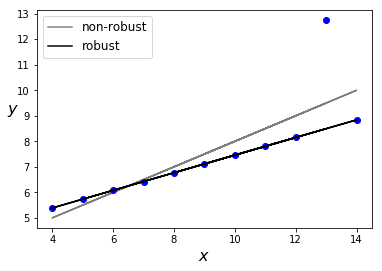

In [6]:
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]
plt.plot(x_3, (alpha_c + beta_c*x_3), 'k', label='non-robust', alpha=0.5)
plt.plot(x_3, y_3, 'bo')
alpha_m = trace_t['alpha'].mean()
beta_m = trace_t['beta'].mean()
plt.plot(x_3, (alpha_m + beta_m*x_3), 'k', label='robust')

plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=12)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.


  0%|          | 0/200 [00:00<?, ?it/s]

 46%|████▌     | 92/200 [00:00<00:00, 911.83it/s]

100%|██████████| 200/200 [00:00<00:00, 1300.03it/s]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


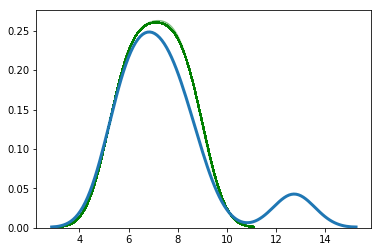

In [7]:
ppc = pm.sample_ppc(trace_t, samples=200, model=model_t, random_seed=2)
for y_tilde in ppc['y_pred']:
    sns.kdeplot(y_tilde, alpha=0.5, c='g')
sns.kdeplot(y_3, linewidth=3)

In [8]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)

alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(60, 10, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))

y_m = np.zeros((len(idx)))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real


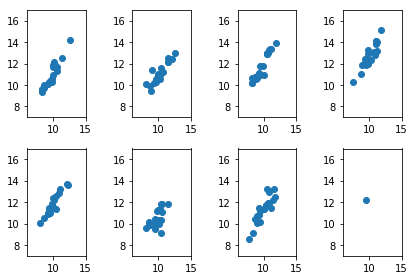

In [9]:
j, k = 0, N
for i in range(M):
    plt.subplot(2, 4, i+1)
    plt.scatter(x_m[j:k], y_m[j:k])
    plt.xlim(6, 15)
    plt.ylim(7, 17)
    j += N
    k += N
plt.tight_layout()

In [10]:
x_centered = x_m - x_m.mean()

In [12]:
with pm.Model() as unpooled_model:
    alpha_tmp = pm.Normal('alpha_tmp', mu=0, sd=10, shape=M)
    beta = pm.Normal('beta', mu=0, sd=10, shape=M)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    nu = pm.Exponential('nu', lam=1/30)
    
    y_pred = pm.StudentT('y_pred', mu=alpha_tmp[idx] + beta[idx]*x_centered, sd=epsilon, nu=nu, observed=y_m)
    alpha = pm.Deterministic('alpha', alpha_tmp - beta*x_m.mean())
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_up = pm.sample(2000, step=step, start=start, chains=1)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

logp = -765.97, ||grad|| = 481.49:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -578.01, ||grad|| = 44.855:   0%|          | 10/5000 [00:00<00:02, 1668.31it/s]

logp = -304.98, ||grad|| = 92.693:   0%|          | 20/5000 [00:00<00:02, 1668.38it/s]

logp = -177.39, ||grad|| = 66.784:   1%|          | 30/5000 [00:00<00:02, 1766.52it/s]

logp = -163.01, ||grad|| = 0.59659:   1%|          | 40/5000 [00:00<00:02, 1740.88it/s]

logp = -171.79, ||grad|| = 31.276:   1%|          | 50/5000 [00:00<00:02, 1787.52it/s] 

logp = -161.56, ||grad|| = 65.153:   1%|          | 60/5000 [00:00<00:02, 1766.35it/s]

logp = -150.35, ||grad|| = 0.10087:   1%|▏         | 70/5000 [00:00<00:02, 1796.68it/s]

logp = -150.35, ||grad|| = 0.10087: 100%|██████████| 75/75 [00:00<00:00, 1787.29it/s]  

Sequential sampling (1 chains in 1 job)

NUTS: [nu, epsilon, beta, alpha_tmp]

  0%|          | 0/2500 [00:00<?, ?it/s]

  1%|          | 28/2500 [00:00<00:08, 274.79it/s]

  3%|▎         | 72/2500 [00:00<00:07, 307.79it/s]

  5%|▍         | 114/2500 [00:00<00:07, 333.10it/s]

  6%|▌         | 146/2500 [00:00<00:07, 328.15it/s]

  7%|▋         | 178/2500 [00:00<00:07, 324.77it/s]

  9%|▊         | 216/2500 [00:00<00:06, 338.77it/s]

 10%|█         | 262/2500 [00:00<00:06, 367.06it/s]

 12%|█▏        | 304/2500 [00:00<00:05, 380.55it/s]

 14%|█▎        | 342/2500 [00:00<00:05, 377.11it/s]

 15%|█▌        | 385/2500 [00:01<00:05, 390.60it/s]

 17%|█▋        | 424/2500 [00:01<00:05, 383.63it/s]

 19%|█▊        | 463/2500 [00:01<00:05, 374.54it/s]

 20%|██        | 502/2500 [00:01<00:05, 372.65it/s]

 22%|██▏       | 540/2500 [00:01<00:05, 370.55it/s]

 23%|██▎       | 583/2500 [00:01<00:04, 385.65it/s]

 25%|██▌       | 630/2500 [00:01<00:04, 403.51it/s]

 27%|██▋       | 671/2500 [00:01<00:04, 397.31it/s]

 28%|██▊       | 711/2500 [00:01<00:04, 383.37it/s]

 30%|███       | 758/2500 [00:01<00:04, 402.79it/s]

 32%|███▏      | 800/2500 [00:02<00:04, 406.74it/s]

 34%|███▍      | 847/2500 [00:02<00:03, 422.83it/s]

 36%|███▌      | 890/2500 [00:02<00:03, 417.66it/s]

 37%|███▋      | 933/2500 [00:02<00:03, 410.56it/s]

 39%|███▉      | 975/2500 [00:02<00:03, 403.94it/s]

 41%|████      | 1016/2500 [00:02<00:03, 402.28it/s]

 42%|████▏     | 1061/2500 [00:02<00:03, 413.33it/s]

 44%|████▍     | 1103/2500 [00:02<00:03, 406.99it/s]

 46%|████▌     | 1144/2500 [00:02<00:03, 400.84it/s]

 48%|████▊     | 1189/2500 [00:03<00:03, 412.26it/s]

 49%|████▉     | 1231/2500 [00:03<00:03, 405.09it/s]

 51%|█████     | 1279/2500 [00:03<00:02, 419.53it/s]

 53%|█████▎    | 1322/2500 [00:03<00:02, 407.15it/s]

 55%|█████▍    | 1365/2500 [00:03<00:02, 411.50it/s]

 56%|█████▋    | 1407/2500 [00:03<00:02, 377.34it/s]

 58%|█████▊    | 1446/2500 [00:03<00:02, 374.58it/s]

 59%|█████▉    | 1487/2500 [00:03<00:02, 383.58it/s]

 61%|██████▏   | 1533/2500 [00:03<00:02, 402.75it/s]

 63%|██████▎   | 1579/2500 [00:03<00:02, 415.09it/s]

 65%|██████▍   | 1621/2500 [00:04<00:02, 404.65it/s]

 67%|██████▋   | 1665/2500 [00:04<00:02, 412.43it/s]

 68%|██████▊   | 1709/2500 [00:04<00:01, 418.06it/s]

 70%|███████   | 1752/2500 [00:04<00:01, 397.18it/s]

 72%|███████▏  | 1793/2500 [00:04<00:01, 365.69it/s]

 73%|███████▎  | 1832/2500 [00:04<00:01, 371.70it/s]

 75%|███████▌  | 1877/2500 [00:04<00:01, 391.25it/s]

 77%|███████▋  | 1917/2500 [00:04<00:01, 383.76it/s]

 79%|███████▊  | 1966/2500 [00:04<00:01, 409.54it/s]

 81%|████████  | 2013/2500 [00:05<00:01, 421.51it/s]

 82%|████████▏ | 2056/2500 [00:05<00:01, 420.42it/s]

 84%|████████▍ | 2099/2500 [00:05<00:00, 406.58it/s]

 86%|████████▌ | 2145/2500 [00:05<00:00, 419.08it/s]

 88%|████████▊ | 2189/2500 [00:05<00:00, 419.20it/s]

 89%|████████▉ | 2233/2500 [00:05<00:00, 424.12it/s]

 91%|█████████ | 2276/2500 [00:05<00:00, 397.66it/s]

 93%|█████████▎| 2320/2500 [00:05<00:00, 405.08it/s]

 95%|█████████▍| 2372/2500 [00:05<00:00, 431.80it/s]

 97%|█████████▋| 2416/2500 [00:06<00:00, 420.67it/s]

 98%|█████████▊| 2459/2500 [00:06<00:00, 405.59it/s]

100%|██████████| 2500/2500 [00:06<00:00, 398.81it/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

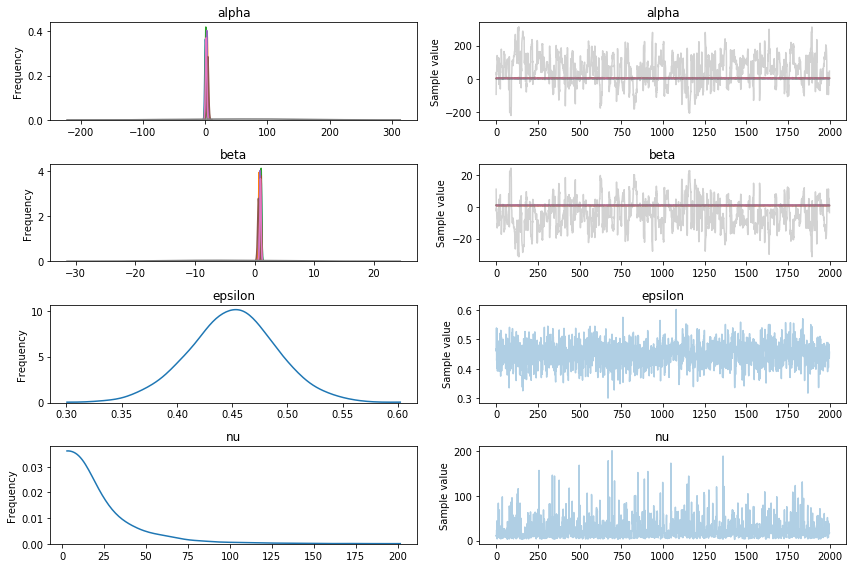

In [13]:
varnames = ['alpha', 'beta', 'epsilon', 'nu']
pm.traceplot(trace_up, varnames)
plt.show()

In [18]:
with pm.Model() as hierarchical_model:
    alpha_tmp_mu = pm.Normal('alpha_tmp_mu', mu=0, sd=10)
    alpha_tmp_sd = pm.HalfNormal('alpha_tmp_sd', sd=10)
    beta_mu = pm.Normal('beta_mu', mu=0, sd=10)
    beta_sd = pm.HalfNormal('beta_sd', sd=10)
    
    alpha_tmp = pm.Normal('alpha_tmp', mu=alpha_tmp_mu, sd=alpha_tmp_sd, shape=M)
    beta = pm.Normal('beta', mu=beta_mu, sd=beta_sd, shape=M)
    epsilon = pm.HalfCauchy('epsilon', 5)
    nu = pm.Exponential('nu', lam=1/30)
    
    y_pred = pm.StudentT('y_pred', mu=alpha_tmp[idx] + beta[idx]*x_centered, sd=epsilon, nu=nu, observed=y_m)
    alpha = pm.Deterministic('alpha', alpha_tmp - beta*x_m.mean())
    alpha_mu = pm.Deterministic('alpha_mu', alpha_tmp_mu - beta_mu*x_m.mean())
    alpha_sd = pm.Deterministic('alpha_sd', alpha_tmp_sd - beta_mu*x_m.mean())
    
    inference = pm.ADVI()
    approx = pm.fit(n=30000, method=inference)
    trace_hm = approx.sample(draws=5000)

  0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 805.93:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 805.93:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,430:   0%|          | 0/30000 [00:00<?, ?it/s] 

Average Loss = 1,430:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,094.1:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,094.1:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,089.5:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,089.5:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,214.4:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,214.4:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,180.5:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,180.5:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,168.2:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,168.2:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,111.8:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,111.8:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,065.4:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,065.4:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,034.7:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,034.7:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,000.4:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 1,000.4:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 993.53:   0%|          | 0/30000 [00:00<?, ?it/s] 

Average Loss = 993.53:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 980.54:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 980.54:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 984.43:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 984.43:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 966.19:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 966.19:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 965.79:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 965.79:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 972.65:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 972.65:   0%|          | 0/30000 [00:00<?, ?it/s]

Average Loss = 972.65:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 976.53:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 976.53:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 971.42:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 971.42:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 966.75:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 966.75:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 968.31:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 968.31:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 961.69:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 961.69:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 956.63:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 956.63:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 951.41:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 951.41:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 940.66:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 940.66:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 947.84:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 947.84:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 940.98:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 940.98:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 935.03:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 935.03:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 939.7:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s] 

Average Loss = 939.7:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 932.78:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 932.78:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 925.09:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 925.09:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 921.14:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 921.14:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 921.36:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 921.36:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 921.75:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 921.75:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 916.06:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 916.06:   1%|          | 161/30000 [00:00<00:18, 1580.05it/s]

Average Loss = 916.06:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 916.21:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 916.21:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 910.46:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 910.46:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 911.22:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 911.22:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 909.76:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 909.76:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 903.6:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s] 

Average Loss = 903.6:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 906.77:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 906.77:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 911.99:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 911.99:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 906.7:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s] 

Average Loss = 906.7:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 905.36:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 905.36:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 901.85:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 901.85:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 909.42:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 909.42:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 908.02:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 908.02:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 909.89:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 909.89:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 911.38:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 911.38:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 910.37:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 910.37:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 909.58:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 909.58:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 910.31:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 910.31:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 908.11:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 908.11:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 907.03:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 907.03:   1%|          | 341/30000 [00:00<00:18, 1636.16it/s]

Average Loss = 907.03:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 907.75:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 907.75:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 912.02:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 912.02:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 909.11:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 909.11:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 914.34:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 914.34:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 911.05:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 911.05:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 912.08:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 912.08:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 912.31:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 912.31:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 909.18:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 909.18:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 906.02:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 906.02:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 903.4:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s] 

Average Loss = 903.4:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 906.31:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 906.31:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 902.2:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s] 

Average Loss = 902.2:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 901.31:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 901.31:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 897.35:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 897.35:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 897.55:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 897.55:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 893.94:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 893.94:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 892.12:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 892.12:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 892.55:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 892.55:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 890.59:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 890.59:   2%|▏         | 531/30000 [00:00<00:17, 1694.06it/s]

Average Loss = 890.59:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 893.59:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 893.59:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 896.86:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 896.86:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 893.78:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 893.78:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 891.13:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 891.13:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 891.32:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 891.32:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 890.61:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 890.61:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 887.93:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 887.93:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 885.53:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 885.53:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 883.06:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 883.06:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 882.01:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 882.01:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 883.64:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 883.64:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 883.57:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 883.57:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 882.43:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 882.43:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 882.76:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 882.76:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 880.27:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 880.27:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 878.45:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 878.45:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 877.11:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 877.11:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 876.44:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 876.44:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 874.75:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 874.75:   2%|▏         | 721/30000 [00:00<00:16, 1737.10it/s]

Average Loss = 874.75:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 873.24:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 873.24:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 870.86:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 870.86:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 868.82:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 868.82:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 869.92:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 869.92:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 869.18:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 869.18:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 868.69:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 868.69:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 868.54:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 868.54:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 866.65:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 866.65:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 868.44:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 868.44:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 860.87:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 860.87:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 861.71:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 861.71:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 859.1:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s] 

Average Loss = 859.1:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 850.18:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 850.18:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 848.62:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 848.62:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 843.77:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 843.77:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 845.06:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 845.06:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 843.78:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 843.78:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 843.14:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 843.14:   3%|▎         | 911/30000 [00:00<00:16, 1768.54it/s]

Average Loss = 843.14:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 843.86:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 843.86:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 842.9:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s] 

Average Loss = 842.9:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 841.62:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 841.62:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 838.05:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 838.05:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 838.05:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 838.05:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 834.84:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 834.84:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 831.48:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 831.48:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 829.84:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 829.84:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 828.62:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 828.62:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 826.07:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 826.07:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 829.21:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 829.21:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 829.57:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 829.57:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 828.84:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 828.84:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 827.19:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 827.19:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 827.3:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s] 

Average Loss = 827.3:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 823.49:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 823.49:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 822.66:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 822.66:   4%|▎         | 1096/30000 [00:00<00:16, 1787.56it/s]

Average Loss = 822.66:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 826.48:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 826.48:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 824.64:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 824.64:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 824.1:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s] 

Average Loss = 824.1:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 823.96:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 823.96:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 825.25:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 825.25:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 822.52:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 822.52:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 825.7:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s] 

Average Loss = 825.7:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 827.96:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 827.96:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 826:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]   

Average Loss = 826:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 825.97:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 825.97:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 822.63:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 822.63:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 820.69:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 820.69:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 821.06:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 821.06:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 817.67:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 817.67:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 814.01:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 814.01:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 815.86:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 815.86:   4%|▍         | 1261/30000 [00:00<00:16, 1739.00it/s]

Average Loss = 815.86:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 814.19:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 814.19:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 813.54:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 813.54:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 808.63:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 808.63:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 806.71:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 806.71:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 804.14:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 804.14:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 801.77:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 801.77:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 799.31:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 799.31:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 798.84:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 798.84:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 797.3:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s] 

Average Loss = 797.3:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 796.1:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 796.1:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 794.77:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 794.77:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 792.05:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 792.05:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 787.97:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 787.97:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 787.2:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s] 

Average Loss = 787.2:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 782.05:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 782.05:   5%|▍         | 1423/30000 [00:00<00:17, 1630.19it/s]

Average Loss = 782.05:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 781.36:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 781.36:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 779.67:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 779.67:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 777.02:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 777.02:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 777.61:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 777.61:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 778.55:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 778.55:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 777.21:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 777.21:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 773.57:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 773.57:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 774.02:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 774.02:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 775.06:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 775.06:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 777.9:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s] 

Average Loss = 777.9:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 776.1:   5%|▌         | 1579/30000 [00:00<00:18, 1570.16it/s]

Average Loss = 776.1:   5%|▌         | 1579/30000 [00:01<00:18, 1570.16it/s]

Average Loss = 777.36:   5%|▌         | 1579/30000 [00:01<00:18, 1570.16it/s]

Average Loss = 777.36:   5%|▌         | 1579/30000 [00:01<00:18, 1570.16it/s]

Average Loss = 776.51:   5%|▌         | 1579/30000 [00:01<00:18, 1570.16it/s]

Average Loss = 776.51:   5%|▌         | 1579/30000 [00:01<00:18, 1570.16it/s]

Average Loss = 774.68:   5%|▌         | 1579/30000 [00:01<00:18, 1570.16it/s]

Average Loss = 774.68:   5%|▌         | 1579/30000 [00:01<00:18, 1570.16it/s]

Average Loss = 773.45:   5%|▌         | 1579/30000 [00:01<00:18, 1570.16it/s]

Average Loss = 773.45:   5%|▌         | 1579/30000 [00:01<00:18, 1570.16it/s]

Average Loss = 768.69:   5%|▌         | 1579/30000 [00:01<00:18, 1570.16it/s]

Average Loss = 768.69:   5%|▌         | 1579/30000 [00:01<00:18, 1570.16it/s]

Average Loss = 768.69:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 763.88:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 763.88:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 764.62:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 764.62:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 765.02:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 765.02:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 762.51:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 762.51:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 760.14:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 760.14:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 759.9:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s] 

Average Loss = 759.9:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 759.82:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 759.82:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 759.92:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 759.92:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 758.47:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 758.47:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 754.67:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 754.67:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 752.92:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 752.92:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 751.35:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 751.35:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 749.96:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 749.96:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 751.8:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s] 

Average Loss = 751.8:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 750.87:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 750.87:   6%|▌         | 1732/30000 [00:01<00:18, 1539.58it/s]

Average Loss = 750.87:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 750.42:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 750.42:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 748.9:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s] 

Average Loss = 748.9:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 748.47:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 748.47:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 748.22:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 748.22:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 748.17:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 748.17:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 747.9:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s] 

Average Loss = 747.9:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 744.71:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 744.71:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 742.83:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 742.83:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 741.3:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s] 

Average Loss = 741.3:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 738.99:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 738.99:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 738.71:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 738.71:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 736.16:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 736.16:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 734.89:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 734.89:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 734.05:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 734.05:   6%|▋         | 1883/30000 [00:01<00:19, 1464.31it/s]

Average Loss = 734.05:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 732.64:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 732.64:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 732.3:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s] 

Average Loss = 732.3:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 730.45:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 730.45:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 729.37:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 729.37:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 728.57:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 728.57:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 727.28:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 727.28:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 726.24:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 726.24:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 724.71:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 724.71:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 722.41:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 722.41:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 721.94:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 721.94:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 722.35:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 722.35:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 721.54:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 721.54:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 721.95:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 721.95:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 721.94:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 721.94:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 720.12:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 720.12:   7%|▋         | 2029/30000 [00:01<00:19, 1429.13it/s]

Average Loss = 720.12:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 719.35:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 719.35:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 719.72:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 719.72:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 714.42:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 714.42:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 710.72:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 710.72:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 711.84:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 711.84:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 711.42:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 711.42:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 710.93:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 710.93:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 709.7:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s] 

Average Loss = 709.7:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 710:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]  

Average Loss = 710:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 704.88:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 704.88:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 703.65:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 703.65:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 702.55:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 702.55:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 701.97:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 701.97:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 700.33:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 700.33:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 698.64:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 698.64:   7%|▋         | 2172/30000 [00:01<00:20, 1388.23it/s]

Average Loss = 698.64:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 693.21:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 693.21:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 689.42:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 689.42:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 689.39:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 689.39:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 688.32:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 688.32:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 688.56:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 688.56:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 687.78:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 687.78:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 687.2:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s] 

Average Loss = 687.2:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 687:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]  

Average Loss = 687:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 686.73:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 686.73:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 683.29:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 683.29:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 682.94:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 682.94:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 682.85:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 682.85:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 682.5:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s] 

Average Loss = 682.5:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 681.82:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 681.82:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 681.09:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 681.09:   8%|▊         | 2321/30000 [00:01<00:19, 1413.65it/s]

Average Loss = 681.09:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 680.46:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 680.46:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 679.41:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 679.41:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 678.42:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 678.42:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 677.1:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s] 

Average Loss = 677.1:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 677.31:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 677.31:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 676.17:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 676.17:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 675.6:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s] 

Average Loss = 675.6:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 674.49:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 674.49:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 673.91:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 673.91:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 674.21:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 674.21:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 673.2:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s] 

Average Loss = 673.2:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 671.62:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 671.62:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 670.65:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 670.65:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 669.45:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 669.45:   8%|▊         | 2471/30000 [00:01<00:19, 1430.69it/s]

Average Loss = 669.45:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 667.67:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 667.67:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 667.67:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 667.67:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 667.05:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 667.05:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 667.77:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 667.77:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 664.58:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 664.58:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 662.31:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 662.31:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 660.06:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 660.06:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 659.4:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s] 

Average Loss = 659.4:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 658.51:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 658.51:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 656.8:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s] 

Average Loss = 656.8:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 656.25:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 656.25:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 656.84:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 656.84:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 656.08:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 656.08:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 655.07:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 655.07:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 653.69:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 653.69:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 653.54:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 653.54:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 653.14:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 653.14:   9%|▊         | 2616/30000 [00:01<00:19, 1432.61it/s]

Average Loss = 653.14:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 652.8:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s] 

Average Loss = 652.8:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 652.07:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 652.07:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 651.25:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 651.25:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 650.54:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 650.54:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 650.17:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 650.17:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 649.55:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 649.55:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 649.34:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 649.34:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 647.64:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 647.64:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 645.14:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 645.14:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 645.16:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 645.16:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 644.42:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 644.42:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 643.76:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 643.76:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 643.45:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 643.45:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 642.32:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 642.32:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 641.47:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 641.47:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 641.14:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 641.14:   9%|▉         | 2781/30000 [00:01<00:18, 1487.95it/s]

Average Loss = 641.14:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 640.86:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 640.86:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 640.82:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 640.82:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 639.99:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 639.99:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 639.56:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 639.56:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 639:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]   

Average Loss = 639:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 638.22:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 638.22:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 637.18:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 637.18:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 635.64:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 635.64:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 635.28:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 635.28:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 634.36:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 634.36:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 634.45:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 634.45:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 634.41:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 634.41:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 633.94:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 633.94:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 633.47:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 633.47:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 633.29:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 633.29:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 633.3:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s] 

Average Loss = 633.3:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 633.34:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 633.34:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 633.58:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 633.58:  10%|▉         | 2941/30000 [00:01<00:17, 1516.01it/s]

Average Loss = 633.58:  10%|█         | 3124/30000 [00:01<00:16, 1594.53it/s]

Average Loss = 632.69:  10%|█         | 3124/30000 [00:01<00:16, 1594.53it/s]

Average Loss = 632.69:  10%|█         | 3124/30000 [00:01<00:16, 1594.53it/s]

Average Loss = 632.31:  10%|█         | 3124/30000 [00:01<00:16, 1594.53it/s]

Average Loss = 632.31:  10%|█         | 3124/30000 [00:01<00:16, 1594.53it/s]

Average Loss = 630.71:  10%|█         | 3124/30000 [00:01<00:16, 1594.53it/s]

Average Loss = 630.71:  10%|█         | 3124/30000 [00:01<00:16, 1594.53it/s]

Average Loss = 629.55:  10%|█         | 3124/30000 [00:01<00:16, 1594.53it/s]

Average Loss = 629.55:  10%|█         | 3124/30000 [00:01<00:16, 1594.53it/s]

Average Loss = 628.3:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s] 

Average Loss = 628.3:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 627.36:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 627.36:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 627.11:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 627.11:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 626.43:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 626.43:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 625.98:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 625.98:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 623.63:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 623.63:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 622.89:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 622.89:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 622.69:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 622.69:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 622.28:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 622.28:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 620.94:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 620.94:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 620.17:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 620.17:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 619.37:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 619.37:  10%|█         | 3124/30000 [00:02<00:16, 1594.53it/s]

Average Loss = 619.37:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 618.54:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 618.54:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 618.37:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 618.37:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 617.92:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 617.92:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 617.47:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 617.47:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 617.05:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 617.05:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 616.7:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s] 

Average Loss = 616.7:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 615.39:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 615.39:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 615.23:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 615.23:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 614.59:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 614.59:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 614.45:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 614.45:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 613.93:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 613.93:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 613.15:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 613.15:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 612.73:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 612.73:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 612.18:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 612.18:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 611.52:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 611.52:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 611.21:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 611.21:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 610.99:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 610.99:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 610.01:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 610.01:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 609.78:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 609.78:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 609.82:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 609.82:  11%|█         | 3285/30000 [00:02<00:17, 1505.49it/s]

Average Loss = 609.82:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 609.56:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 609.56:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 608.86:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 608.86:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 608.81:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 608.81:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 607.59:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 607.59:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 606.86:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 606.86:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 606.16:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 606.16:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 606.08:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 606.08:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 605.91:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 605.91:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 605.09:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 605.09:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 605.14:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 605.14:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 604.63:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 604.63:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 604.6:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s] 

Average Loss = 604.6:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 604.39:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 604.39:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 605.05:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 605.05:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 604.42:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 604.42:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 603.66:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 603.66:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 603.16:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 603.16:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 601.7:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s] 

Average Loss = 601.7:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 601.48:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 601.48:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 601.4:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s] 

Average Loss = 601.4:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 601.25:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 601.25:  12%|█▏        | 3481/30000 [00:02<00:16, 1614.47it/s]

Average Loss = 601.25:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 600.51:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 600.51:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 600.53:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 600.53:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 600.28:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 600.28:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 599.93:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 599.93:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 599.83:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 599.83:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 600.07:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 600.07:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 599.64:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 599.64:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 599.59:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 599.59:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 599.4:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s] 

Average Loss = 599.4:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 599.05:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 599.05:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 598.61:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 598.61:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 598.96:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 598.96:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 598.82:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 598.82:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 598.87:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 598.87:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 598.19:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 598.19:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 598.07:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 598.07:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 597.96:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 597.96:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 597.68:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 597.68:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 597.45:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 597.45:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 597.14:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 597.14:  12%|█▏        | 3691/30000 [00:02<00:15, 1726.68it/s]

Average Loss = 597.14:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 596.81:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 596.81:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 596.71:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 596.71:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 596.31:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 596.31:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 596.27:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 596.27:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 596.16:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 596.16:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 595.78:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 595.78:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 595.37:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 595.37:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 595.1:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s] 

Average Loss = 595.1:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 595.06:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 595.06:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 594.79:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 594.79:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 594.79:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 594.79:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 594.39:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 594.39:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 594.21:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 594.21:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 593.83:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 593.83:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 593.51:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 593.51:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 593.19:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 593.19:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 592.82:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 592.82:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 592.62:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 592.62:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 592.5:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s] 

Average Loss = 592.5:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 592.11:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 592.11:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 591.67:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 591.67:  13%|█▎        | 3891/30000 [00:02<00:14, 1796.15it/s]

Average Loss = 591.67:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 591.54:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 591.54:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 591:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]   

Average Loss = 591:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 590.84:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 590.84:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 590.51:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 590.51:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 590.55:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 590.55:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 590.34:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 590.34:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 590.21:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 590.21:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 590.1:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s] 

Average Loss = 590.1:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 589.78:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 589.78:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 589.4:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s] 

Average Loss = 589.4:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 589.03:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 589.03:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 589.08:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 589.08:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.92:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.92:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.71:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.71:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.81:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.81:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.54:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.54:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.45:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.45:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.43:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.43:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.28:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.28:  14%|█▎        | 4101/30000 [00:02<00:13, 1873.15it/s]

Average Loss = 588.28:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 588.06:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 588.06:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.98:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.98:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 588.02:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 588.02:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 588.02:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 588.02:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.52:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.52:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.37:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.37:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.22:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.22:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.46:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.46:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.6:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s] 

Average Loss = 587.6:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.48:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.48:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.4:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s] 

Average Loss = 587.4:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.35:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.35:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.26:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.26:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.18:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 587.18:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 586.85:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 586.85:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 586.4:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s] 

Average Loss = 586.4:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 585.98:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 585.98:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 585.69:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 585.69:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 585.27:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 585.27:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 585.09:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 585.09:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 584.7:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s] 

Average Loss = 584.7:  14%|█▍        | 4292/30000 [00:02<00:14, 1820.04it/s]

Average Loss = 584.7:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 584.2:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 584.2:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.84:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.84:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.7:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s] 

Average Loss = 583.7:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.91:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.91:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.89:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.89:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.98:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.98:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.94:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.94:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.49:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.49:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.17:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.17:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.07:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 583.07:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 582.99:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 582.99:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 581.86:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 581.86:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 581.93:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 581.93:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 581.91:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 581.91:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 581.71:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 581.71:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 581.37:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 581.37:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 581.21:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 581.21:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 580.89:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 580.89:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 580.75:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 580.75:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 580.65:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 580.65:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 580.58:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 580.58:  15%|█▌        | 4505/30000 [00:02<00:13, 1898.56it/s]

Average Loss = 580.58:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 580.82:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 580.82:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 580.63:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 580.63:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 579.94:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 579.94:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 579.27:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 579.27:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 579.1:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s] 

Average Loss = 579.1:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 578.93:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 578.93:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 578.79:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 578.79:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 578.77:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 578.77:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 578.67:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 578.67:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 578.4:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s] 

Average Loss = 578.4:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 578.02:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 578.02:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 577.91:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 577.91:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 577.81:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 577.81:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 577.48:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 577.48:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 577.38:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 577.38:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 577.22:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 577.22:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 576.9:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s] 

Average Loss = 576.9:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 576.72:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 576.72:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 576.73:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 576.73:  16%|█▌        | 4712/30000 [00:02<00:13, 1942.02it/s]

Average Loss = 576.73:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 576.33:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 576.33:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 576.19:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 576.19:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.96:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.96:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.82:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.82:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.8:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s] 

Average Loss = 575.8:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.63:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.63:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.53:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.53:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.39:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.39:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.27:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.27:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.31:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.31:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.33:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.33:  16%|█▋        | 4909/30000 [00:02<00:13, 1801.24it/s]

Average Loss = 575.16:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 575.16:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 575.08:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 575.08:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 575.06:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 575.06:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.89:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.89:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.79:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.79:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.38:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.38:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.49:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.49:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.55:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.55:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.63:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.63:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.51:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.51:  16%|█▋        | 4909/30000 [00:03<00:13, 1801.24it/s]

Average Loss = 574.51:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574.53:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574.53:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574.22:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574.22:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574.16:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574.16:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.91:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.91:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.96:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.96:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.73:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.73:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.86:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.86:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]   

Average Loss = 574:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574.07:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574.07:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574.08:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574.08:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574.18:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 574.18:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.55:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.55:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.52:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.52:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.19:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.19:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.13:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573.13:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 573:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]   

Average Loss = 573:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 572.87:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 572.87:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 572.62:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 572.62:  17%|█▋        | 5111/30000 [00:03<00:13, 1857.12it/s]

Average Loss = 572.62:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 572.59:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 572.59:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 572.5:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s] 

Average Loss = 572.5:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 572.22:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 572.22:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 572.06:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 572.06:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.96:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.96:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.96:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.96:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.91:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.91:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.53:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.53:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.25:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.25:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.18:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.18:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.02:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.02:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.02:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 571.02:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.9:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s] 

Average Loss = 570.9:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.68:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.68:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.65:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.65:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.49:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.49:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.49:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.49:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.49:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.49:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.35:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.35:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.35:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.35:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.3:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s] 

Average Loss = 570.3:  18%|█▊        | 5300/30000 [00:03<00:14, 1724.45it/s]

Average Loss = 570.3:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 570.22:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 570.22:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 570.13:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 570.13:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 570.11:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 570.11:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 569.78:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 569.78:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 569.67:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 569.67:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 569.32:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 569.32:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 569.17:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 569.17:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 569.05:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 569.05:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.97:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.97:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.93:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.93:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.89:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.89:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.71:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.71:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.52:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.52:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.45:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.45:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.49:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.49:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.56:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.56:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.44:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.44:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.55:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.55:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.24:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.24:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.06:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.06:  18%|█▊        | 5502/30000 [00:03<00:13, 1799.30it/s]

Average Loss = 568.06:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.93:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.93:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.64:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.64:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.58:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.58:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.49:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.49:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.48:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.48:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.43:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.43:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.21:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.21:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.24:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.24:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.09:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 567.09:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.98:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.98:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.77:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.77:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.63:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.63:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.37:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.37:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.39:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.39:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.31:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.31:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.18:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.18:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.12:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.12:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.15:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 566.15:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 565.98:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 565.98:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 565.92:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 565.92:  19%|█▉        | 5701/30000 [00:03<00:14, 1718.78it/s]

Average Loss = 565.92:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.77:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.77:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.58:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.58:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.59:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.59:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.76:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.76:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.65:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.65:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.56:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.56:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.59:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.59:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.6:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s] 

Average Loss = 565.6:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.46:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.46:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.21:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.21:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.09:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.09:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 564.91:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 564.91:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.07:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.07:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.03:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.03:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.1:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s] 

Average Loss = 565.1:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 564.97:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 564.97:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.04:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 565.04:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 564.84:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 564.84:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 564.57:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 564.57:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 564.45:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 564.45:  20%|█▉        | 5902/30000 [00:03<00:13, 1792.57it/s]

Average Loss = 564.45:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 564.31:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 564.31:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 564.26:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 564.26:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 564.09:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 564.09:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.99:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.99:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.83:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.83:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.69:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.69:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.64:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.64:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.45:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.45:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.21:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.21:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.06:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563.06:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 563:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]   

Average Loss = 563:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 562.6:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 562.6:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 562.62:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 562.62:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 562.49:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 562.49:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 562.42:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 562.42:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 562.26:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 562.26:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 562.13:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 562.13:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 561.98:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 561.98:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 561.9:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s] 

Average Loss = 561.9:  20%|██        | 6105/30000 [00:03<00:12, 1853.19it/s]

Average Loss = 561.9:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.92:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.92:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.97:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.97:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 562:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]   

Average Loss = 562:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 562.05:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 562.05:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 562.01:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 562.01:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 562.05:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 562.05:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.84:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.84:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.75:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.75:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.7:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s] 

Average Loss = 561.7:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.48:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.48:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.39:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.39:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.22:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.22:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.33:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.33:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.27:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.27:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.11:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.11:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.06:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 561.06:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 560.97:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 560.97:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 560.98:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 560.98:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 560.93:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 560.93:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 560.79:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 560.79:  21%|██        | 6294/30000 [00:03<00:13, 1745.92it/s]

Average Loss = 560.79:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 560.62:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 560.62:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 560.55:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 560.55:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 560.58:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 560.58:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 560.53:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 560.53:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 560.39:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 560.39:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 560.11:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 560.11:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.97:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.97:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.91:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.91:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.75:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.75:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.64:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.64:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.52:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.52:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.37:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.37:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.27:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.27:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.18:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.18:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.09:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 559.09:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 558.94:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 558.94:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 558.82:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 558.82:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 558.7:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s] 

Average Loss = 558.7:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 558.41:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 558.41:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 558.36:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 558.36:  22%|██▏       | 6491/30000 [00:03<00:13, 1798.22it/s]

Average Loss = 558.36:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 558.38:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 558.38:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 558.23:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 558.23:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 558.09:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 558.09:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 558.09:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 558.09:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 558.05:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 558.05:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 557.94:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 557.94:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 557.88:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 557.88:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 557.82:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 557.82:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 557.7:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s] 

Average Loss = 557.7:  22%|██▏       | 6691/30000 [00:03<00:13, 1729.86it/s]

Average Loss = 557.63:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.63:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.56:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.56:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.53:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.53:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.49:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.49:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.43:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.43:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.3:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s] 

Average Loss = 557.3:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.16:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.16:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.11:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557.11:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 557:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]   

Average Loss = 557:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 556.91:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 556.91:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 556.79:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 556.79:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 556.74:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 556.74:  22%|██▏       | 6691/30000 [00:04<00:13, 1729.86it/s]

Average Loss = 556.74:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 556.69:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 556.69:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 556.6:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s] 

Average Loss = 556.6:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 556.54:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 556.54:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 556.3:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s] 

Average Loss = 556.3:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 556.18:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 556.18:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 556.01:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 556.01:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.92:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.92:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.73:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.73:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.7:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s] 

Average Loss = 555.7:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.64:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.64:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.66:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.66:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.61:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.61:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.24:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.24:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.19:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.19:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.13:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.13:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.09:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.09:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.08:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 555.08:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 554.97:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 554.97:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 554.95:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 554.95:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 554.8:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s] 

Average Loss = 554.8:  23%|██▎       | 6901/30000 [00:04<00:12, 1817.45it/s]

Average Loss = 554.8:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.74:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.74:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.55:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.55:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.5:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s] 

Average Loss = 554.5:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.46:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.46:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.3:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s] 

Average Loss = 554.3:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.22:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.22:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.11:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.11:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.01:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 554.01:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.96:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.96:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.87:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.87:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.75:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.75:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.73:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.73:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.57:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.57:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.49:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.49:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.37:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.37:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.29:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.29:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.24:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.24:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.21:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.21:  24%|██▎       | 7101/30000 [00:04<00:12, 1858.74it/s]

Average Loss = 553.21:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 553.15:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 553.15:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.99:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.99:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.81:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.81:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.68:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.68:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.56:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.56:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.44:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.44:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.29:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.29:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.22:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.22:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.11:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 552.11:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.98:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.98:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.97:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.97:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.91:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.91:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.88:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.88:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.75:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.75:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.56:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.56:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.57:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.57:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.59:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.59:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.49:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.49:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.79:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.79:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.78:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.78:  24%|██▍       | 7290/30000 [00:04<00:12, 1768.99it/s]

Average Loss = 551.78:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.71:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.71:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.63:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.63:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.53:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.53:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.48:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.48:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.38:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.38:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.33:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.33:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.24:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.24:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.26:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.26:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.27:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.27:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.18:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.18:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.14:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.14:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.06:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 551.06:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.86:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.86:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.78:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.78:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.77:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.77:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.67:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.67:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.63:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.63:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.57:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.57:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.52:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.52:  25%|██▍       | 7489/30000 [00:04<00:12, 1825.44it/s]

Average Loss = 550.52:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 550.4:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s] 

Average Loss = 550.4:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 550.29:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 550.29:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 550.24:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 550.24:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 550.08:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 550.08:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 550.01:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 550.01:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.94:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.94:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.94:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.94:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.85:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.85:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.75:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.75:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.65:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.65:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.57:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.57:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.45:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.45:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.44:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.44:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.35:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.35:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.22:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.22:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.19:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.19:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.18:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.18:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.16:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.16:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.12:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.12:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.05:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.05:  26%|██▌       | 7674/30000 [00:04<00:12, 1740.27it/s]

Average Loss = 549.05:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 549.07:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 549.07:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 549.06:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 549.06:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.97:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.97:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.93:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.93:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.92:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.92:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.79:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.79:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.68:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.68:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.57:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.57:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.52:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.52:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.43:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.43:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.41:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.41:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.35:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.35:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.33:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.33:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.21:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.21:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.17:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.17:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.15:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.15:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.01:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 548.01:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 547.91:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 547.91:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 547.84:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 547.84:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 547.72:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 547.72:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 547.67:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 547.67:  26%|██▌       | 7874/30000 [00:04<00:12, 1806.42it/s]

Average Loss = 547.67:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.6:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s] 

Average Loss = 547.6:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.58:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.58:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.59:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.59:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.56:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.56:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.52:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.52:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.5:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s] 

Average Loss = 547.5:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.51:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.51:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.44:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.44:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.45:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.45:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.37:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.37:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.35:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.35:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.32:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.32:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.28:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.28:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.28:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.28:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.24:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.24:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.15:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.15:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.17:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.17:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.14:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.14:  27%|██▋       | 8081/30000 [00:04<00:11, 1863.48it/s]

Average Loss = 547.14:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 547.1:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s] 

Average Loss = 547.1:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 547.14:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 547.14:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 547.08:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 547.08:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 547.02:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 547.02:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 547:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]   

Average Loss = 547:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.94:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.94:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.88:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.88:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.81:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.81:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.8:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s] 

Average Loss = 546.8:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.66:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.66:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.63:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.63:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.6:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s] 

Average Loss = 546.6:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.56:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.56:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.5:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s] 

Average Loss = 546.5:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.39:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.39:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.16:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.16:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.17:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.17:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.12:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 546.12:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 545.95:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 545.95:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 545.91:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 545.91:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 545.46:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 545.46:  28%|██▊       | 8270/30000 [00:04<00:12, 1767.03it/s]

Average Loss = 545.46:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.32:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.32:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.25:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.25:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.24:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.24:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.19:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.19:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.03:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.03:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.99:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.99:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.05:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.05:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.04:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 545.04:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.95:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.95:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.79:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.79:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.76:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.76:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.68:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.68:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.64:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.64:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.61:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.61:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.58:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.58:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.48:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.48:  28%|██▊       | 8474/30000 [00:04<00:11, 1836.47it/s]

Average Loss = 544.48:  28%|██▊       | 8474/30000 [00:05<00:11, 1836.47it/s]

Average Loss = 544.48:  28%|██▊       | 8474/30000 [00:05<00:11, 1836.47it/s]

Average Loss = 544.43:  28%|██▊       | 8474/30000 [00:05<00:11, 1836.47it/s]

Average Loss = 544.43:  28%|██▊       | 8474/30000 [00:05<00:11, 1836.47it/s]

Average Loss = 544.32:  28%|██▊       | 8474/30000 [00:05<00:11, 1836.47it/s]

Average Loss = 544.32:  28%|██▊       | 8474/30000 [00:05<00:11, 1836.47it/s]

Average Loss = 544.32:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.32:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.32:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.32:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.32:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.29:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.29:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.23:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.23:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.26:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.26:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.2:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s] 

Average Loss = 544.2:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.15:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.15:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.05:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.05:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.02:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 544.02:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.9:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s] 

Average Loss = 543.9:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.77:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.77:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.78:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.78:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.72:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.72:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.6:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s] 

Average Loss = 543.6:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.62:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.62:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.65:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.65:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.63:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.63:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.56:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.56:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.58:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.58:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.47:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.47:  29%|██▉       | 8661/30000 [00:05<00:12, 1743.73it/s]

Average Loss = 543.47:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 543.36:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 543.36:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 543.23:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 543.23:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 543.12:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 543.12:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 543.09:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 543.09:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 543.03:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 543.03:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.97:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.97:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.94:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.94:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.92:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.92:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.92:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.92:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.92:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.92:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.85:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.85:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.83:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.83:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.78:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.78:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.73:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.73:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.65:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.65:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.62:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.62:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.55:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.55:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.5:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s] 

Average Loss = 542.5:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.47:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.47:  30%|██▉       | 8862/30000 [00:05<00:11, 1811.49it/s]

Average Loss = 542.47:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 542.37:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 542.37:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 542.29:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 542.29:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 542.26:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 542.26:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 542.19:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 542.19:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 542.16:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 542.16:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 542.12:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 542.12:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.95:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.95:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.9:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s] 

Average Loss = 541.9:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.85:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.85:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.77:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.77:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.72:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.72:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.6:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s] 

Average Loss = 541.6:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.53:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.53:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.39:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.39:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.3:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s] 

Average Loss = 541.3:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.21:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.21:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.11:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.11:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.13:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.13:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.09:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.09:  30%|███       | 9059/30000 [00:05<00:11, 1851.61it/s]

Average Loss = 541.09:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 541.03:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 541.03:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.99:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.99:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.95:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.95:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.81:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.81:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.83:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.83:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.74:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.74:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.67:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.67:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.59:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.59:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.58:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.58:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.48:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.48:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.34:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.34:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.4:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s] 

Average Loss = 540.4:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.32:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.32:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.27:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.27:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.18:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.18:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.11:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.11:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.09:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.09:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.08:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.08:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.05:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540.05:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 540:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]   

Average Loss = 540:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 539.97:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 539.97:  31%|███       | 9247/30000 [00:05<00:11, 1786.42it/s]

Average Loss = 539.97:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.97:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.97:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.93:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.93:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.86:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.86:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.8:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s] 

Average Loss = 539.8:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.73:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.73:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.66:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.66:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.64:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.64:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.53:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.53:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.37:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.37:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.26:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.26:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.22:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.22:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.18:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.18:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.09:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.09:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.03:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539.03:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 539:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]   

Average Loss = 539:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 538.98:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 538.98:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 538.93:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 538.93:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 538.87:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 538.87:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 538.83:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 538.83:  32%|███▏      | 9451/30000 [00:05<00:11, 1851.09it/s]

Average Loss = 538.83:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.76:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.76:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.72:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.72:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.64:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.64:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.61:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.61:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.59:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.59:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.46:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.46:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.4:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s] 

Average Loss = 538.4:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.34:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.34:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.23:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.23:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.22:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.22:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.18:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.18:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.2:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s] 

Average Loss = 538.2:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.19:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.19:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.17:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.17:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.13:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.13:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.08:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 538.08:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 537.98:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 537.98:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 537.89:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 537.89:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 537.82:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 537.82:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 537.74:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 537.74:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 537.62:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 537.62:  32%|███▏      | 9641/30000 [00:05<00:11, 1762.31it/s]

Average Loss = 537.62:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.55:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.55:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.52:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.52:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.46:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.46:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.42:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.42:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.34:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.34:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.28:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.28:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.21:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.21:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.16:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.16:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.1:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s] 

Average Loss = 537.1:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.05:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 537.05:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.97:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.97:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.9:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s] 

Average Loss = 536.9:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.85:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.85:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.81:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.81:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.65:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.65:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.55:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.55:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.52:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.52:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.42:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.42:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.33:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.33:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.18:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.18:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.13:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.13:  33%|███▎      | 9851/30000 [00:05<00:10, 1842.40it/s]

Average Loss = 536.13:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 536.07:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 536.07:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 536.04:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 536.04:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.99:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.99:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.95:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.95:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.87:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.87:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.83:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.83:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.77:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.77:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.71:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.71:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.66:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.66:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.58:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.58:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.56:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.56:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.55:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.55:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.58:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.58:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.56:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.56:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.55:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.55:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.48:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.48:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.34:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.34:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.28:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.28:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.26:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.26:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.25:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.25:  34%|███▎      | 10068/30000 [00:05<00:10, 1925.20it/s]

Average Loss = 535.25:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 535.11:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 535.11:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 535.03:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 535.03:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.87:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.87:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.81:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.81:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.75:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.75:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.73:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.73:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.64:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.64:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.65:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.65:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.61:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.61:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.56:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.56:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.5:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s] 

Average Loss = 534.5:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.45:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.45:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.4:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s] 

Average Loss = 534.4:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.36:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.36:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.3:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s] 

Average Loss = 534.3:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.19:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.19:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.12:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.12:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.03:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.03:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.02:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 534.02:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 533.94:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 533.94:  34%|███▍      | 10264/30000 [00:05<00:10, 1807.66it/s]

Average Loss = 533.88:  34%|███▍      | 10264/30000 [00:06<00:10, 1807.66it/s]

Average Loss = 533.88:  34%|███▍      | 10264/30000 [00:06<00:10, 1807.66it/s]

Average Loss = 533.88:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.79:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.79:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.76:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.76:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.75:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.75:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.71:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.71:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.67:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.67:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.69:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.69:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.69:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.69:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.71:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.71:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.63:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.63:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.55:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.55:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.53:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.53:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.48:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.48:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.44:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.44:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.36:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.36:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.36:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.36:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.29:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.29:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.2:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s] 

Average Loss = 533.2:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.13:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.13:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.06:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.06:  35%|███▍      | 10471/30000 [00:06<00:10, 1869.45it/s]

Average Loss = 533.06:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 533.04:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 533.04:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.96:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.96:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.86:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.86:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.88:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.88:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.82:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.82:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.81:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.81:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.84:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.84:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.72:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.72:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.64:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.64:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.51:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.51:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.4:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s] 

Average Loss = 532.4:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.31:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.31:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.26:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.26:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.14:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.14:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.12:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.12:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.01:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 532.01:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 531.95:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 531.95:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 531.89:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 531.89:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 531.82:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 531.82:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 531.75:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 531.75:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 531.69:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 531.69:  36%|███▌      | 10661/30000 [00:06<00:11, 1754.29it/s]

Average Loss = 531.69:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.72:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.72:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.69:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.69:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.62:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.62:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.58:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.58:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.48:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.48:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.47:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.47:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.43:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.43:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.39:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.39:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.35:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.35:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.34:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.34:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.28:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.28:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.22:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.22:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.2:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s] 

Average Loss = 531.2:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.14:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.14:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.09:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.09:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.07:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.07:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.08:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.08:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.08:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.08:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.02:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.02:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.01:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.01:  36%|███▌      | 10871/30000 [00:06<00:10, 1841.08it/s]

Average Loss = 531.01:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.98:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.98:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.91:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.91:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.85:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.85:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.82:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.82:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.8:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s] 

Average Loss = 530.8:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.76:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.76:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.72:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.72:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.64:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.64:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.58:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.58:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.5:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s] 

Average Loss = 530.5:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.45:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.45:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.39:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.39:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.31:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.31:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.22:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.22:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.2:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s] 

Average Loss = 530.2:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.15:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.15:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.09:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 530.09:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 529.98:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 529.98:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 529.92:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 529.92:  37%|███▋      | 11071/30000 [00:06<00:10, 1881.27it/s]

Average Loss = 529.92:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.89:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.89:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.86:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.86:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.84:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.84:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.85:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.85:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.84:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.84:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.78:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.78:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.76:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.76:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.7:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s] 

Average Loss = 529.7:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.64:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.64:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.52:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.52:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.48:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.48:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.45:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.45:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.43:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.43:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.36:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.36:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.38:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.38:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.32:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.32:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.3:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s] 

Average Loss = 529.3:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.25:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.25:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.16:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.16:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.11:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.11:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.03:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.03:  38%|███▊      | 11262/30000 [00:06<00:10, 1779.52it/s]

Average Loss = 529.03:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 529.04:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 529.04:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 529.02:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 529.02:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.97:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.97:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.98:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.98:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.96:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.96:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.86:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.86:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.81:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.81:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.72:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.72:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.71:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.71:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.66:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.66:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.62:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.62:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.58:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.58:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.49:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.49:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.45:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.45:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.38:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.38:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.43:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.43:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.43:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.43:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.37:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.37:  38%|███▊      | 11471/30000 [00:06<00:09, 1853.14it/s]

Average Loss = 528.37:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.34:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.34:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.27:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.27:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.22:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.22:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.26:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.26:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.2:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s] 

Average Loss = 528.2:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.2:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.2:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.09:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528.09:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 528:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]   

Average Loss = 528:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.96:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.96:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.98:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.98:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.94:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.94:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.87:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.87:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.83:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.83:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.79:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.79:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.83:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.83:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.71:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.71:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.7:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s] 

Average Loss = 527.7:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.58:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.58:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.56:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.56:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.52:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.52:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.42:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.42:  39%|███▉      | 11660/30000 [00:06<00:10, 1780.39it/s]

Average Loss = 527.42:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 527.34:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 527.34:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 527.23:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 527.23:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 527.2:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s] 

Average Loss = 527.2:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 527.14:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 527.14:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 527.08:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 527.08:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 527.05:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 527.05:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.98:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.98:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.92:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.92:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.84:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.84:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.8:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s] 

Average Loss = 526.8:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.77:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.77:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.72:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.72:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.64:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.64:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.6:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s] 

Average Loss = 526.6:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.56:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.56:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.55:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.55:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.47:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.47:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.44:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.44:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.41:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.41:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.36:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.36:  40%|███▉      | 11868/30000 [00:06<00:09, 1856.33it/s]

Average Loss = 526.36:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 526.29:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 526.29:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 526.14:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 526.14:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 526.08:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 526.08:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 526.06:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 526.06:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 526.05:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 526.05:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.96:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.96:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.92:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.92:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.83:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.83:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.77:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.77:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.72:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.72:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.75:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.75:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.68:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.68:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.66:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.66:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.62:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.62:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.57:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.57:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.48:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.48:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.43:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.43:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.43:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.43:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.38:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.38:  40%|████      | 12061/30000 [00:06<00:09, 1872.93it/s]

Average Loss = 525.38:  41%|████      | 12251/30000 [00:06<00:09, 1781.11it/s]

Average Loss = 525.34:  41%|████      | 12251/30000 [00:06<00:09, 1781.11it/s]

Average Loss = 525.34:  41%|████      | 12251/30000 [00:06<00:09, 1781.11it/s]

Average Loss = 525.27:  41%|████      | 12251/30000 [00:06<00:09, 1781.11it/s]

Average Loss = 525.27:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 525.18:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 525.18:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 525.12:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 525.12:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 525.06:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 525.06:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.98:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.98:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.92:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.92:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.82:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.82:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.71:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.71:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.7:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s] 

Average Loss = 524.7:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.71:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.71:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.67:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.67:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.59:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.59:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.52:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.52:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.43:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.43:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.34:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.34:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.34:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.34:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.34:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.34:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.28:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.28:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.26:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.26:  41%|████      | 12251/30000 [00:07<00:09, 1781.11it/s]

Average Loss = 524.26:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 524.2:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s] 

Average Loss = 524.2:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 524.15:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 524.15:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 524.1:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s] 

Average Loss = 524.1:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 524.04:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 524.04:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.96:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.96:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.87:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.87:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.8:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s] 

Average Loss = 523.8:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.79:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.79:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.74:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.74:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.64:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.64:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.56:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.56:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.51:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.51:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.44:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.44:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.4:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s] 

Average Loss = 523.4:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.38:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.38:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.33:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.33:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.24:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.24:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.15:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.15:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.09:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.09:  42%|████▏     | 12457/30000 [00:07<00:09, 1852.02it/s]

Average Loss = 523.09:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 523.05:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 523.05:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 523.06:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 523.06:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.95:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.95:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.88:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.88:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.72:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.72:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.62:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.62:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.5:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s] 

Average Loss = 522.5:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.44:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.44:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.4:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s] 

Average Loss = 522.4:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.35:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.35:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.26:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.26:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.2:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s] 

Average Loss = 522.2:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.18:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.18:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.16:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.16:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 522.1:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s] 

Average Loss = 522.1:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.99:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.99:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.93:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.93:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.87:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.87:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.89:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.89:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.85:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.85:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.86:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.86:  42%|████▏     | 12645/30000 [00:07<00:09, 1771.55it/s]

Average Loss = 521.86:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.87:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.87:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.82:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.82:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.79:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.79:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.74:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.74:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.7:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s] 

Average Loss = 521.7:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.64:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.64:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.6:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s] 

Average Loss = 521.6:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.54:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.54:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.48:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.48:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.43:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.43:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.38:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.38:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.33:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.33:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.2:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s] 

Average Loss = 521.2:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.15:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.15:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.14:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.14:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.01:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 521.01:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 520.91:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 520.91:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 520.88:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 520.88:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 520.81:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 520.81:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 520.76:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 520.76:  43%|████▎     | 12851/30000 [00:07<00:09, 1834.93it/s]

Average Loss = 520.76:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.73:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.73:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.67:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.67:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.69:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.69:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.67:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.67:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.61:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.61:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.54:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.54:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.5:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s] 

Average Loss = 520.5:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.43:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.43:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.37:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.37:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.35:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.35:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.29:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.29:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.21:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.21:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.14:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.14:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.09:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.09:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.02:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520.02:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 520:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]   

Average Loss = 520:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 519.96:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 519.96:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 519.98:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 519.98:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 519.92:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 519.92:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 519.9:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s] 

Average Loss = 519.9:  44%|████▎     | 13060/30000 [00:07<00:08, 1900.01it/s]

Average Loss = 519.9:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.85:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.85:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.86:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.86:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.85:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.85:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.8:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s] 

Average Loss = 519.8:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.75:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.75:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.7:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s] 

Average Loss = 519.7:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.69:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.69:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.73:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.73:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.71:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.71:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.66:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.66:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.6:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s] 

Average Loss = 519.6:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.54:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.54:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.5:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s] 

Average Loss = 519.5:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.45:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.45:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.45:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.45:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.46:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.46:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.42:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.42:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.27:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.27:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.22:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.22:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.13:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.13:  44%|████▍     | 13253/30000 [00:07<00:09, 1772.82it/s]

Average Loss = 519.13:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 519.08:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 519.08:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 519.05:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 519.05:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.97:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.97:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.99:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.99:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.93:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.93:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.91:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.91:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.83:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.83:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.78:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.78:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.73:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.73:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.72:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.72:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.71:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.71:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.7:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s] 

Average Loss = 518.7:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.68:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.68:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.65:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.65:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.6:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s] 

Average Loss = 518.6:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.53:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.53:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.55:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.55:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.48:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.48:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.44:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.44:  45%|████▍     | 13458/30000 [00:07<00:08, 1843.30it/s]

Average Loss = 518.44:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.35:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.35:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.27:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.27:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.21:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.21:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.19:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.19:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.21:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.21:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.23:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.23:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.22:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.22:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.18:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.18:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.18:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.18:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.13:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.13:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.1:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s] 

Average Loss = 518.1:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.08:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.08:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.09:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.09:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.02:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.02:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.01:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.01:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.05:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.05:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.03:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.03:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.02:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518.02:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 518:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]   

Average Loss = 518:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 517.98:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 517.98:  45%|████▌     | 13646/30000 [00:07<00:09, 1761.00it/s]

Average Loss = 517.98:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.86:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.86:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.77:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.77:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.73:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.73:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.69:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.69:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.62:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.62:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.61:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.61:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.6:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s] 

Average Loss = 517.6:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.5:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.5:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.48:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.48:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.47:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.47:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.46:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.46:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.36:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.36:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.37:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.37:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.32:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.32:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.27:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.27:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.26:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.26:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.26:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.26:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.28:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.28:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.26:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.26:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.21:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.21:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.14:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.14:  46%|████▌     | 13846/30000 [00:07<00:08, 1822.00it/s]

Average Loss = 517.14:  47%|████▋     | 14051/30000 [00:07<00:08, 1869.96it/s]

Average Loss = 517.14:  47%|████▋     | 14051/30000 [00:07<00:08, 1869.96it/s]

Average Loss = 517.14:  47%|████▋     | 14051/30000 [00:07<00:08, 1869.96it/s]

Average Loss = 517.11:  47%|████▋     | 14051/30000 [00:07<00:08, 1869.96it/s]

Average Loss = 517.11:  47%|████▋     | 14051/30000 [00:07<00:08, 1869.96it/s]

Average Loss = 517.06:  47%|████▋     | 14051/30000 [00:07<00:08, 1869.96it/s]

Average Loss = 517.06:  47%|████▋     | 14051/30000 [00:07<00:08, 1869.96it/s]

Average Loss = 517.03:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 517.03:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.98:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.98:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.94:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.94:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.86:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.86:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.81:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.81:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.8:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s] 

Average Loss = 516.8:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.73:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.73:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.71:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.71:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.68:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.68:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.63:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.63:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.59:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.59:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.53:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.53:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.55:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.55:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.52:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.52:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.44:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.44:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.35:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.35:  47%|████▋     | 14051/30000 [00:08<00:08, 1869.96it/s]

Average Loss = 516.35:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 516.33:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 516.33:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 516.22:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 516.22:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 516.16:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 516.16:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 516.11:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 516.11:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 516.11:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 516.11:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 516.01:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 516.01:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.99:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.99:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.91:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.91:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.81:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.81:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.8:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s] 

Average Loss = 515.8:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.75:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.75:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.7:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s] 

Average Loss = 515.7:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.67:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.67:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.66:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.66:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.59:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.59:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.49:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.49:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.4:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s] 

Average Loss = 515.4:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.39:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.39:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.37:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.37:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.33:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.33:  47%|████▋     | 14241/30000 [00:08<00:08, 1789.27it/s]

Average Loss = 515.33:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 515.3:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s] 

Average Loss = 515.3:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 515.25:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 515.25:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 515.23:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 515.23:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 515.2:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s] 

Average Loss = 515.2:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 515.08:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 515.08:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 515.03:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 515.03:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.97:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.97:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.98:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.98:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.92:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.92:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.89:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.89:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.81:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.81:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.74:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.74:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.68:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.68:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.59:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.59:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.46:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.46:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.37:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.37:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.34:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.34:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.24:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.24:  48%|████▊     | 14441/30000 [00:08<00:08, 1843.05it/s]

Average Loss = 514.24:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 514.17:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 514.17:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 514.17:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 514.17:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 514.19:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 514.19:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 514.14:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 514.14:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 514.14:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 514.14:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 514.08:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 514.08:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.98:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.98:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.87:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.87:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.81:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.81:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.76:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.76:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.64:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.64:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.62:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.62:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.55:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.55:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.51:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.51:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.43:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.43:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.38:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.38:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.27:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.27:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.19:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.19:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.17:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.17:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.14:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.14:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.07:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.07:  49%|████▉     | 14628/30000 [00:08<00:08, 1767.73it/s]

Average Loss = 513.07:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 513:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]   

Average Loss = 513:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.96:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.96:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.93:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.93:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.94:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.94:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.91:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.91:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.81:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.81:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.76:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.76:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.67:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.67:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.64:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.64:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.57:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.57:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.45:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.45:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.37:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.37:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.36:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.36:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.24:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.24:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.27:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.27:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.2:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s] 

Average Loss = 512.2:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.11:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.11:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.09:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.09:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.02:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 512.02:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 511.96:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 511.96:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 511.93:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 511.93:  49%|████▉     | 14831/30000 [00:08<00:08, 1824.65it/s]

Average Loss = 511.93:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.85:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.85:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.79:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.79:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.74:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.74:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.7:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s] 

Average Loss = 511.7:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.63:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.63:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.52:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.52:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.43:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.43:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.42:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.42:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.41:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.41:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.35:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.35:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.35:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.35:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.27:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.27:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.14:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.14:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.18:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.18:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.16:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.16:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.14:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.14:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.02:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 511.02:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 510.94:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 510.94:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 510.91:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 510.91:  50%|█████     | 15041/30000 [00:08<00:07, 1884.56it/s]

Average Loss = 510.91:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.93:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.93:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.87:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.87:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.84:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.84:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.81:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.81:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.69:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.69:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.66:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.66:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.68:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.68:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.62:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.62:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.54:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.54:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.48:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.48:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.42:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.42:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.37:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.37:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.33:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.33:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.24:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.24:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.21:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.21:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.18:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.18:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.13:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.13:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.03:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.03:  51%|█████     | 15232/30000 [00:08<00:08, 1776.62it/s]

Average Loss = 510.03:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.95:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.95:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.98:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.98:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.96:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.96:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.9:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s] 

Average Loss = 509.9:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.85:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.85:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.83:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.83:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.8:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s] 

Average Loss = 509.8:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.82:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.82:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.75:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.75:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.7:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s] 

Average Loss = 509.7:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.57:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.57:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.52:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.52:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.46:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.46:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.47:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.47:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.36:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.36:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.32:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.32:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.3:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s] 

Average Loss = 509.3:  51%|█████▏    | 15413/30000 [00:08<00:08, 1750.78it/s]

Average Loss = 509.3:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.35:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.35:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.36:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.36:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.33:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.33:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.29:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.29:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.29:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.29:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.21:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.21:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.12:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.12:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.08:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.08:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.05:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.05:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.02:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.02:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.02:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 509.02:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.99:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.99:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.93:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.93:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.89:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.89:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.86:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.86:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.77:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.77:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.68:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.68:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.65:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.65:  52%|█████▏    | 15590/30000 [00:08<00:08, 1746.65it/s]

Average Loss = 508.65:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.63:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.63:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.55:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.55:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.53:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.53:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.49:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.49:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.35:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.35:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.3:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s] 

Average Loss = 508.3:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.23:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.23:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.17:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.17:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.09:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.09:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.04:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 508.04:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 507.94:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 507.94:  53%|█████▎    | 15767/30000 [00:08<00:08, 1748.93it/s]

Average Loss = 507.89:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.89:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.91:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.91:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.83:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.83:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.75:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.75:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.74:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.74:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.7:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s] 

Average Loss = 507.7:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.64:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.64:  53%|█████▎    | 15767/30000 [00:09<00:08, 1748.93it/s]

Average Loss = 507.64:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.62:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.62:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.55:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.55:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.58:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.58:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.5:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s] 

Average Loss = 507.5:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.46:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.46:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.44:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.44:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.42:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.42:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.4:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s] 

Average Loss = 507.4:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.31:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.31:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.22:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.22:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.2:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s] 

Average Loss = 507.2:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.12:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.12:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.03:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 507.03:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 506.92:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 506.92:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 506.88:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 506.88:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 506.86:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 506.86:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 506.78:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 506.78:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 506.73:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 506.73:  53%|█████▎    | 15943/30000 [00:09<00:08, 1649.39it/s]

Average Loss = 506.73:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.63:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.63:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.58:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.58:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.6:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s] 

Average Loss = 506.6:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.6:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.6:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.62:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.62:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.46:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.46:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.35:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.35:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.31:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.31:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.26:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.26:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.25:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.25:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.19:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.19:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.09:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 506.09:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.98:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.98:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.91:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.91:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.86:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.86:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.83:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.83:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.76:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.76:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.66:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.66:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.59:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.59:  54%|█████▍    | 16129/30000 [00:09<00:08, 1703.18it/s]

Average Loss = 505.59:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.54:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.54:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.5:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s] 

Average Loss = 505.5:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.45:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.45:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.4:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s] 

Average Loss = 505.4:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.36:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.36:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.32:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.32:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.2:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s] 

Average Loss = 505.2:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.14:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.14:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.08:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.08:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.03:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 505.03:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.97:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.97:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.82:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.82:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.73:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.73:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.72:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.72:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.7:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s] 

Average Loss = 504.7:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.6:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.6:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.55:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.55:  54%|█████▍    | 16311/30000 [00:09<00:07, 1732.17it/s]

Average Loss = 504.55:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.44:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.44:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.38:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.38:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.32:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.32:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.22:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.22:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.18:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.18:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.1:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s] 

Average Loss = 504.1:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.07:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.07:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.04:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504.04:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 504:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]   

Average Loss = 504:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.94:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.94:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.86:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.86:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.8:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s] 

Average Loss = 503.8:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.77:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.77:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.71:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.71:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.65:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.65:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.57:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.57:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.51:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.51:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.41:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.41:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.35:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.35:  55%|█████▍    | 16486/30000 [00:09<00:08, 1668.49it/s]

Average Loss = 503.35:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.21:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.21:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.13:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.13:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.09:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.09:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.08:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.08:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.01:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.01:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.02:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.02:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.98:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.98:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.02:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 503.02:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.99:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.99:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.89:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.89:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.82:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.82:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.74:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.74:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.75:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.75:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.79:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.79:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.75:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.75:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.72:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.72:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.65:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.65:  56%|█████▌    | 16671/30000 [00:09<00:07, 1710.05it/s]

Average Loss = 502.65:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.63:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.63:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.53:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.53:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.45:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.45:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.43:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.43:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.37:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.37:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.3:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s] 

Average Loss = 502.3:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.23:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.23:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.17:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.17:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.13:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.13:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.06:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.06:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.01:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 502.01:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.93:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.93:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.9:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s] 

Average Loss = 501.9:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.85:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.85:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.84:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.84:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.79:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.79:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.71:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.71:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.56:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.56:  56%|█████▌    | 16844/30000 [00:09<00:07, 1691.36it/s]

Average Loss = 501.56:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.51:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.51:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.47:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.47:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.47:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.47:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.45:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.45:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.43:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.43:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.39:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.39:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.39:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.39:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.33:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.33:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.33:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.33:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.19:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.19:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.18:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.18:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.12:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 501.12:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.98:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.98:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.89:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.89:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.83:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.83:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.83:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.83:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.81:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.81:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.76:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.76:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.71:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.71:  57%|█████▋    | 17021/30000 [00:09<00:07, 1704.82it/s]

Average Loss = 500.71:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.61:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.61:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.58:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.58:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.51:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.51:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.49:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.49:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.45:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.45:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.4:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s] 

Average Loss = 500.4:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.31:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.31:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.24:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.24:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.17:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.17:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.12:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.12:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.11:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.11:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.11:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.11:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.05:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 500.05:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 499.99:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 499.99:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 499.9:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s] 

Average Loss = 499.9:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 499.77:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 499.77:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 499.78:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 499.78:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 499.7:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s] 

Average Loss = 499.7:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 499.66:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 499.66:  57%|█████▋    | 17211/30000 [00:09<00:07, 1740.21it/s]

Average Loss = 499.66:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.64:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.64:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.62:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.62:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.62:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.62:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.61:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.61:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.52:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.52:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.44:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.44:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.39:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.39:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.3:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s] 

Average Loss = 499.3:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.27:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.27:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.23:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.23:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.15:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.15:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.16:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.16:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.17:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.17:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.15:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.15:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.05:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.05:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.01:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 499.01:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 498.92:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 498.92:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 498.81:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 498.81:  58%|█████▊    | 17401/30000 [00:09<00:07, 1775.76it/s]

Average Loss = 498.81:  59%|█████▊    | 17581/30000 [00:09<00:07, 1772.98it/s]

Average Loss = 498.79:  59%|█████▊    | 17581/30000 [00:09<00:07, 1772.98it/s]

Average Loss = 498.79:  59%|█████▊    | 17581/30000 [00:09<00:07, 1772.98it/s]

Average Loss = 498.7:  59%|█████▊    | 17581/30000 [00:09<00:07, 1772.98it/s] 

Average Loss = 498.7:  59%|█████▊    | 17581/30000 [00:09<00:07, 1772.98it/s]

Average Loss = 498.61:  59%|█████▊    | 17581/30000 [00:09<00:07, 1772.98it/s]

Average Loss = 498.61:  59%|█████▊    | 17581/30000 [00:09<00:07, 1772.98it/s]

Average Loss = 498.49:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.49:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.45:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.45:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.37:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.37:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.31:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.31:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.3:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s] 

Average Loss = 498.3:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.26:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.26:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.29:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.29:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.26:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.26:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.2:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s] 

Average Loss = 498.2:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.11:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.11:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 498.1:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s] 

Average Loss = 498.1:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.95:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.95:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.88:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.88:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.83:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.83:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.74:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.74:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.75:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.75:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.74:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.74:  59%|█████▊    | 17581/30000 [00:10<00:07, 1772.98it/s]

Average Loss = 497.74:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.7:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s] 

Average Loss = 497.7:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.59:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.59:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.5:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s] 

Average Loss = 497.5:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.46:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.46:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.36:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.36:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.3:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s] 

Average Loss = 497.3:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.25:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.25:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.24:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.24:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.2:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s] 

Average Loss = 497.2:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.15:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.15:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.08:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.08:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.02:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497.02:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 497:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]   

Average Loss = 497:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.93:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.93:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.84:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.84:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.83:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.83:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.82:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.82:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.76:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.76:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.69:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.69:  59%|█████▉    | 17781/30000 [00:10<00:06, 1825.95it/s]

Average Loss = 496.69:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.65:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.65:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.59:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.59:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.55:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.55:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.5:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s] 

Average Loss = 496.5:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.46:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.46:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.43:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.43:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.4:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s] 

Average Loss = 496.4:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.25:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.25:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.2:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s] 

Average Loss = 496.2:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.15:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.15:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.12:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.12:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.02:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 496.02:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.95:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.95:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.88:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.88:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.83:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.83:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.75:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.75:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.66:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.66:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.63:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.63:  60%|█████▉    | 17971/30000 [00:10<00:06, 1821.56it/s]

Average Loss = 495.63:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.61:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.61:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.51:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.51:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.44:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.44:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.41:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.41:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.34:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.34:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.25:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.25:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.15:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.15:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.09:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.09:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.1:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s] 

Average Loss = 495.1:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.02:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 495.02:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.98:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.98:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.99:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.99:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.96:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.96:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.87:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.87:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.88:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.88:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.82:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.82:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.7:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s] 

Average Loss = 494.7:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.62:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.62:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.54:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.54:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.52:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.52:  61%|██████    | 18154/30000 [00:10<00:06, 1792.50it/s]

Average Loss = 494.52:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.46:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.46:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.4:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s] 

Average Loss = 494.4:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.38:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.38:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.35:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.35:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.26:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.26:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.2:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s] 

Average Loss = 494.2:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.14:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.14:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.06:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.06:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.04:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 494.04:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.95:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.95:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.88:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.88:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.86:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.86:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.87:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.87:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.8:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s] 

Average Loss = 493.8:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.75:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.75:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.77:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.77:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.69:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.69:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.57:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.57:  61%|██████    | 18351/30000 [00:10<00:06, 1832.55it/s]

Average Loss = 493.57:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.52:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.52:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.51:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.51:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.47:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.47:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.42:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.42:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.43:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.43:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.29:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.29:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.21:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.21:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.16:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.16:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.13:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.13:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.04:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 493.04:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.98:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.98:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.94:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.94:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.9:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s] 

Average Loss = 492.9:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.86:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.86:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.74:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.74:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.68:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.68:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.65:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.65:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.68:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.68:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.58:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.58:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.56:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.56:  62%|██████▏   | 18535/30000 [00:10<00:06, 1771.78it/s]

Average Loss = 492.56:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 492.47:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 492.47:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 492.38:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 492.38:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 492.3:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s] 

Average Loss = 492.3:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 492.21:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 492.21:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 492.14:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 492.14:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 492.11:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 492.11:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.99:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.99:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.95:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.95:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.85:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.85:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.76:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.76:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.74:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.74:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.63:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.63:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.57:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.57:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.59:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.59:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.54:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.54:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.5:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s] 

Average Loss = 491.5:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.48:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.48:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.45:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.45:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.36:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.36:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.35:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.35:  62%|██████▏   | 18739/30000 [00:10<00:06, 1840.06it/s]

Average Loss = 491.35:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 491.29:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 491.29:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 491.23:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 491.23:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 491.15:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 491.15:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 491.02:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 491.02:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.94:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.94:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.87:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.87:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.78:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.78:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.69:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.69:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.65:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.65:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.59:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.59:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.53:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.53:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.48:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.48:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.45:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.45:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.36:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.36:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.31:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.31:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.27:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.27:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.22:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.22:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.17:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.17:  63%|██████▎   | 18931/30000 [00:10<00:05, 1858.48it/s]

Average Loss = 490.17:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 490.19:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 490.19:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 490.18:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 490.18:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 490.12:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 490.12:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 490.05:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 490.05:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.98:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.98:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.98:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.98:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.93:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.93:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.88:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.88:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.85:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.85:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.81:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.81:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.78:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.78:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.77:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.77:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.7:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s] 

Average Loss = 489.7:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.65:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.65:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.51:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.51:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.49:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.49:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.44:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.44:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.42:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.42:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.37:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.37:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.39:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.39:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.37:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.37:  64%|██████▎   | 19118/30000 [00:10<00:06, 1798.09it/s]

Average Loss = 489.37:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 489.31:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 489.31:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 489.28:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 489.28:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 489.17:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 489.17:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 489.14:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 489.14:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 489.12:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 489.12:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.99:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.99:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.91:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.91:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.88:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.88:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.84:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.84:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.82:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.82:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.74:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.74:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.67:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.67:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.63:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.63:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.56:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.56:  64%|██████▍   | 19321/30000 [00:10<00:05, 1842.16it/s]

Average Loss = 488.48:  64%|██████▍   | 19321/30000 [00:11<00:05, 1842.16it/s]

Average Loss = 488.48:  64%|██████▍   | 19321/30000 [00:11<00:05, 1842.16it/s]

Average Loss = 488.41:  64%|██████▍   | 19321/30000 [00:11<00:05, 1842.16it/s]

Average Loss = 488.41:  64%|██████▍   | 19321/30000 [00:11<00:05, 1842.16it/s]

Average Loss = 488.38:  64%|██████▍   | 19321/30000 [00:11<00:05, 1842.16it/s]

Average Loss = 488.38:  64%|██████▍   | 19321/30000 [00:11<00:05, 1842.16it/s]

Average Loss = 488.33:  64%|██████▍   | 19321/30000 [00:11<00:05, 1842.16it/s]

Average Loss = 488.33:  64%|██████▍   | 19321/30000 [00:11<00:05, 1842.16it/s]

Average Loss = 488.33:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 488.22:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 488.22:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 488.2:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s] 

Average Loss = 488.2:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 488.17:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 488.17:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 488.15:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 488.15:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 488.06:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 488.06:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 488.01:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 488.01:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.97:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.97:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.92:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.92:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.9:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s] 

Average Loss = 487.9:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.88:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.88:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.87:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.87:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.84:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.84:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.85:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.85:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.72:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.72:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.65:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.65:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.55:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.55:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.42:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.42:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.35:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.35:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.28:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.28:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.23:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.23:  65%|██████▌   | 19507/30000 [00:11<00:05, 1759.00it/s]

Average Loss = 487.23:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 487.03:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 487.03:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.99:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.99:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.97:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.97:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.96:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.96:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.87:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.87:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.88:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.88:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.83:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.83:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.7:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s] 

Average Loss = 486.7:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.63:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.63:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.57:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.57:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.54:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.54:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.5:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s] 

Average Loss = 486.5:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.48:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.48:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.37:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.37:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.36:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.36:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.36:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.36:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.15:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.15:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.05:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 486.05:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 485.96:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 485.96:  66%|██████▌   | 19707/30000 [00:11<00:05, 1820.50it/s]

Average Loss = 485.96:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.86:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.86:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.8:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s] 

Average Loss = 485.8:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.79:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.79:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.73:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.73:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.77:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.77:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.69:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.69:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.62:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.62:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.58:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.58:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.58:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.58:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.5:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s] 

Average Loss = 485.5:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.48:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.48:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.47:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.47:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.37:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.37:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.32:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.32:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.3:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s] 

Average Loss = 485.3:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.3:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.3:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.23:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.23:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.2:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s] 

Average Loss = 485.2:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.14:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.14:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.07:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.07:  66%|██████▋   | 19891/30000 [00:11<00:05, 1695.68it/s]

Average Loss = 485.07:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 485.02:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 485.02:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 485:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]   

Average Loss = 485:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.96:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.96:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.86:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.86:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.85:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.85:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.77:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.77:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.67:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.67:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.54:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.54:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.45:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.45:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.39:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.39:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.34:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.34:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.25:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.25:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.17:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.17:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.06:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 484.06:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 483.96:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 483.96:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 483.83:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 483.83:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 483.88:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 483.88:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 483.74:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 483.74:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 483.65:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 483.65:  67%|██████▋   | 20091/30000 [00:11<00:05, 1767.86it/s]

Average Loss = 483.65:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.59:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.59:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.53:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.53:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.44:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.44:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.31:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.31:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.24:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.24:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.16:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.16:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.07:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.07:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.01:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 483.01:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.95:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.95:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.94:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.94:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.93:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.93:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.88:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.88:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.74:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.74:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.71:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.71:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.65:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.65:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.52:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.52:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.53:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.53:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.43:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.43:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.44:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.44:  68%|██████▊   | 20287/30000 [00:11<00:05, 1816.88it/s]

Average Loss = 482.44:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 482.35:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 482.35:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 482.3:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s] 

Average Loss = 482.3:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 482.22:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 482.22:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 482.13:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 482.13:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 482.07:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 482.07:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.97:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.97:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.89:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.89:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.83:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.83:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.74:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.74:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.63:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.63:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.58:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.58:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.53:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.53:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.43:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.43:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.36:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.36:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.28:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.28:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.22:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.22:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.23:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.23:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.11:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.11:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.04:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.04:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.08:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.08:  68%|██████▊   | 20471/30000 [00:11<00:05, 1808.19it/s]

Average Loss = 481.08:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 481.01:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 481.01:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.95:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.95:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.87:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.87:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.94:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.94:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.83:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.83:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.83:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.83:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.74:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.74:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.71:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.71:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.64:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.64:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.51:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.51:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.52:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.52:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.49:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.49:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.46:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.46:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.4:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s] 

Average Loss = 480.4:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.31:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.31:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.25:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.25:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.25:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.25:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.17:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.17:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.04:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.04:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.01:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 480.01:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 479.97:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 479.97:  69%|██████▉   | 20679/30000 [00:11<00:04, 1877.40it/s]

Average Loss = 479.97:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.95:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.95:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.85:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.85:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.83:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.83:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.8:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s] 

Average Loss = 479.8:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.73:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.73:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.68:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.68:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.61:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.61:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.56:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.56:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.52:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.52:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.45:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.45:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.42:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.42:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.37:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.37:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.33:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.33:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.3:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s] 

Average Loss = 479.3:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.23:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.23:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.12:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.12:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.05:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 479.05:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 478.95:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 478.95:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 478.9:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s] 

Average Loss = 478.9:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 478.83:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 478.83:  70%|██████▉   | 20886/30000 [00:11<00:04, 1926.47it/s]

Average Loss = 478.83:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.69:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.69:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.56:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.56:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.49:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.49:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.32:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.32:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.3:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s] 

Average Loss = 478.3:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.24:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.24:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.16:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.16:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.07:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.07:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.04:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 478.04:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.99:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.99:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.92:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.92:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.81:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.81:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.72:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.72:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.64:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.64:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.65:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.65:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.59:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.59:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.59:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.59:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.5:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s] 

Average Loss = 477.5:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.45:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.45:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.37:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.37:  70%|███████   | 21081/30000 [00:11<00:04, 1815.35it/s]

Average Loss = 477.3:  70%|███████   | 21081/30000 [00:12<00:04, 1815.35it/s] 

Average Loss = 477.3:  70%|███████   | 21081/30000 [00:12<00:04, 1815.35it/s]

Average Loss = 477.3:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 477.2:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 477.2:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 477.13:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 477.13:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 477.06:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 477.06:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.96:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.96:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.93:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.93:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.89:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.89:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.84:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.84:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.74:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.74:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.58:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.58:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.57:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.57:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.45:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.45:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.39:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.39:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.29:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.29:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.27:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.27:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.3:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s] 

Average Loss = 476.3:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.17:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.17:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.12:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.12:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.09:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.09:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.02:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.02:  71%|███████   | 21291/30000 [00:12<00:04, 1882.65it/s]

Average Loss = 476.02:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.92:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.92:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.82:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.82:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.76:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.76:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.71:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.71:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.77:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.77:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.73:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.73:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.71:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.71:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.64:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.64:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.58:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.58:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.45:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.45:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.4:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s] 

Average Loss = 475.4:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.37:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.37:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.29:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.29:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.21:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.21:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.11:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.11:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.15:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.15:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.18:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.18:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.14:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 475.14:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 474.99:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 474.99:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 474.89:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 474.89:  72%|███████▏  | 21482/30000 [00:12<00:04, 1785.38it/s]

Average Loss = 474.89:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.83:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.83:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.72:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.72:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.63:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.63:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.58:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.58:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.47:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.47:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.47:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.47:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.41:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.41:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.36:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.36:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.41:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.41:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.38:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.38:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.3:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s] 

Average Loss = 474.3:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.28:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.28:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.19:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.19:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.17:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.17:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.07:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.07:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.03:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 474.03:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 473.97:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 473.97:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 473.89:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 473.89:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 473.84:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 473.84:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 473.84:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 473.84:  72%|███████▏  | 21681/30000 [00:12<00:04, 1832.56it/s]

Average Loss = 473.84:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.73:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.73:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.67:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.67:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.61:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.61:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.48:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.48:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.4:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s] 

Average Loss = 473.4:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.33:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.33:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.21:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.21:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.17:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.17:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.14:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.14:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.06:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 473.06:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.9:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s] 

Average Loss = 472.9:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.78:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.78:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.7:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s] 

Average Loss = 472.7:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.62:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.62:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.56:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.56:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.54:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.54:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.38:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.38:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.34:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.34:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.35:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.35:  73%|███████▎  | 21881/30000 [00:12<00:04, 1875.03it/s]

Average Loss = 472.35:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.37:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.37:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.35:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.35:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.34:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.34:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.22:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.22:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.22:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.22:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.12:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.12:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.02:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 472.02:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.99:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.99:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.96:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.96:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.89:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.89:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.84:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.84:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.83:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.83:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.77:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.77:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.75:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.75:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.75:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.75:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.7:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s] 

Average Loss = 471.7:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.72:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.72:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.6:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s] 

Average Loss = 471.6:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.58:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.58:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.53:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.53:  74%|███████▎  | 22071/30000 [00:12<00:04, 1797.60it/s]

Average Loss = 471.53:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.47:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.47:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.38:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.38:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.39:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.39:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.33:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.33:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.25:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.25:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.22:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.22:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.06:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.06:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.01:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 471.01:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.89:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.89:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.92:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.92:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.85:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.85:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.77:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.77:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.77:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.77:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.71:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.71:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.69:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.69:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.61:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.61:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.54:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.54:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.45:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.45:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.38:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.38:  74%|███████▍  | 22274/30000 [00:12<00:04, 1856.95it/s]

Average Loss = 470.38:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 470.24:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 470.24:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 470.16:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 470.16:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 470.13:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 470.13:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 470.09:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 470.09:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 470.08:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 470.08:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.95:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.95:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.85:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.85:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.76:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.76:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.61:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.61:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.59:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.59:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.51:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.51:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.52:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.52:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.44:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.44:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.33:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.33:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.26:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.26:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.17:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.17:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.16:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 469.16:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 468.98:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 468.98:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 468.87:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 468.87:  75%|███████▍  | 22462/30000 [00:12<00:04, 1759.77it/s]

Average Loss = 468.87:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.85:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.85:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.79:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.79:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.82:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.82:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.75:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.75:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.76:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.76:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.73:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.73:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.69:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.69:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.6:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s] 

Average Loss = 468.6:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.44:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.44:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.35:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.35:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.31:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.31:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.18:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.18:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.11:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.11:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 468.1:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s] 

Average Loss = 468.1:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 467.88:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 467.88:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 467.83:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 467.83:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 467.78:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 467.78:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 467.79:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 467.79:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 467.7:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s] 

Average Loss = 467.7:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 467.58:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 467.58:  76%|███████▌  | 22660/30000 [00:12<00:04, 1816.03it/s]

Average Loss = 467.58:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.62:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.62:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.51:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.51:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.38:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.38:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.36:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.36:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.27:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.27:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.21:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.21:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.14:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.14:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.03:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 467.03:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.97:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.97:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.93:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.93:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.89:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.89:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.84:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.84:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.68:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.68:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.59:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.59:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.6:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s] 

Average Loss = 466.6:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.51:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.51:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.4:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s] 

Average Loss = 466.4:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.33:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.33:  76%|███████▌  | 22851/30000 [00:12<00:03, 1838.46it/s]

Average Loss = 466.33:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 466.22:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 466.22:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 466.16:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 466.16:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 466.12:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 466.12:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 466.01:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 466.01:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 465.86:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 465.86:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 465.83:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 465.83:  77%|███████▋  | 23037/30000 [00:12<00:03, 1802.55it/s]

Average Loss = 465.62:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.62:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.5:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s] 

Average Loss = 465.5:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.5:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.5:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.45:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.45:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.41:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.41:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.33:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.33:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.21:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.21:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.16:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.16:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.08:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 465.08:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 464.9:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s] 

Average Loss = 464.9:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 464.85:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 464.85:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 464.79:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 464.79:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 464.69:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 464.69:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 464.6:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s] 

Average Loss = 464.6:  77%|███████▋  | 23037/30000 [00:13<00:03, 1802.55it/s]

Average Loss = 464.6:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 464.45:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 464.45:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 464.45:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 464.45:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 464.3:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s] 

Average Loss = 464.3:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 464.24:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 464.24:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 464.14:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 464.14:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 464.05:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 464.05:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.98:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.98:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.79:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.79:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.79:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.79:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.71:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.71:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.6:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s] 

Average Loss = 463.6:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.49:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.49:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.5:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s] 

Average Loss = 463.5:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.38:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.38:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.29:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.29:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.21:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.21:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.09:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 463.09:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 462.98:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 462.98:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 462.95:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 462.95:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 462.88:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 462.88:  77%|███████▋  | 23231/30000 [00:13<00:03, 1837.01it/s]

Average Loss = 462.88:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.79:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.79:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.71:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.71:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.62:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.62:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.56:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.56:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.46:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.46:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.35:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.35:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.24:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.24:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.16:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.16:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.13:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.13:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.07:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 462.07:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.95:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.95:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.92:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.92:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.85:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.85:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.82:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.82:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.72:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.72:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.61:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.61:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.57:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.57:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.55:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.55:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.54:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.54:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.43:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.43:  78%|███████▊  | 23431/30000 [00:13<00:03, 1782.94it/s]

Average Loss = 461.43:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 461.28:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 461.28:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 461.18:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 461.18:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 461.08:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 461.08:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 461.07:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 461.07:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.98:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.98:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.93:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.93:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.85:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.85:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.69:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.69:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.6:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s] 

Average Loss = 460.6:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.54:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.54:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.49:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.49:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.43:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.43:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.33:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.33:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.26:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.26:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.2:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s] 

Average Loss = 460.2:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.15:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.15:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.09:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.09:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.11:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.11:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.02:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 460.02:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 459.85:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 459.85:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 459.72:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 459.72:  79%|███████▉  | 23637/30000 [00:13<00:03, 1853.41it/s]

Average Loss = 459.72:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.67:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.67:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.56:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.56:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.58:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.58:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.54:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.54:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.4:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s] 

Average Loss = 459.4:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.33:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.33:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.23:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.23:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.17:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.17:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.09:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.09:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.1:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s] 

Average Loss = 459.1:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.03:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 459.03:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.91:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.91:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.78:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.78:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.75:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.75:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.73:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.73:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.62:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.62:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.55:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.55:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.51:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.51:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.49:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.49:  79%|███████▉  | 23841/30000 [00:13<00:03, 1890.37it/s]

Average Loss = 458.49:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.45:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.45:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.39:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.39:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.28:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.28:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.17:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.17:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.04:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.04:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.03:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.03:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.07:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.07:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.09:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 458.09:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.92:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.92:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.88:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.88:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.74:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.74:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.7:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s] 

Average Loss = 457.7:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.68:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.68:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.58:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.58:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.53:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.53:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.61:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.61:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.54:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.54:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.42:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.42:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.31:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.31:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.18:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.18:  80%|████████  | 24032/30000 [00:13<00:03, 1805.44it/s]

Average Loss = 457.18:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 457.11:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 457.11:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 457.02:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 457.02:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.91:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.91:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.85:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.85:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.86:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.86:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.8:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s] 

Average Loss = 456.8:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.72:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.72:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.69:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.69:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.63:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.63:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.58:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.58:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.54:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.54:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.51:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.51:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.5:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s] 

Average Loss = 456.5:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.48:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.48:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.51:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.51:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.49:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.49:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.43:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.43:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.43:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.43:  81%|████████  | 24231/30000 [00:13<00:03, 1852.46it/s]

Average Loss = 456.43:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.33:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.33:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.23:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.23:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.17:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.17:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.1:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s] 

Average Loss = 456.1:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.04:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.04:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.01:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.01:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.99:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.99:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.03:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 456.03:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.97:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.97:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.93:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.93:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.79:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.79:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.71:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.71:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.57:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.57:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.42:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.42:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.35:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.35:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.27:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.27:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.16:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.16:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.04:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 455.04:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 454.91:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 454.91:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 454.83:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 454.83:  81%|████████▏ | 24418/30000 [00:13<00:03, 1783.88it/s]

Average Loss = 454.83:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.77:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.77:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.71:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.71:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.68:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.68:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.64:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.64:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.64:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.64:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.43:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.43:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.39:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.39:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.34:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.34:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.31:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.31:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.23:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.23:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.1:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s] 

Average Loss = 454.1:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.06:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.06:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.03:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454.03:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 454:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]   

Average Loss = 454:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.98:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.98:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.88:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.88:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.82:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.82:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.65:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.65:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.59:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.59:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.47:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.47:  82%|████████▏ | 24611/30000 [00:13<00:02, 1805.39it/s]

Average Loss = 453.47:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 453.34:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 453.34:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 453.3:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s] 

Average Loss = 453.3:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 453.22:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 453.22:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 453.06:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 453.06:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 453.04:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 453.04:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 452.93:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 452.93:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 452.91:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 452.91:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 452.89:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 452.89:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 452.86:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 452.86:  83%|████████▎ | 24819/30000 [00:13<00:02, 1875.29it/s]

Average Loss = 452.83:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.83:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.77:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.77:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.63:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.63:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.52:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.52:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.43:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.43:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.38:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.38:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.35:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.35:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.3:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s] 

Average Loss = 452.3:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.29:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.29:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.21:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.21:  83%|████████▎ | 24819/30000 [00:14<00:02, 1875.29it/s]

Average Loss = 452.21:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 452.13:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 452.13:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 452.04:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 452.04:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.99:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.99:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.91:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.91:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.77:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.77:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.73:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.73:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.66:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.66:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.66:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.66:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.49:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.49:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.5:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s] 

Average Loss = 451.5:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.47:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.47:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.35:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.35:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.29:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.29:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.18:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.18:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.11:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.11:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.06:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.06:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.06:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 451.06:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 450.99:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 450.99:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 450.86:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 450.86:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 450.73:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 450.73:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 450.66:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 450.66:  83%|████████▎ | 25009/30000 [00:14<00:02, 1808.02it/s]

Average Loss = 450.66:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.61:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.61:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.6:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s] 

Average Loss = 450.6:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.54:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.54:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.47:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.47:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.45:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.45:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.32:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.32:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.18:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.18:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.12:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.12:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.07:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 450.07:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.99:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.99:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.95:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.95:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.8:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s] 

Average Loss = 449.8:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.77:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.77:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.62:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.62:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.5:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s] 

Average Loss = 449.5:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.4:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.4:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.26:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.26:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.12:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 449.12:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 448.98:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 448.98:  84%|████████▍ | 25211/30000 [00:14<00:02, 1851.93it/s]

Average Loss = 448.98:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.84:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.84:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.69:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.69:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.61:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.61:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.51:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.51:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.44:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.44:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.4:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s] 

Average Loss = 448.4:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.31:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.31:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.19:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.19:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.11:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.11:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.07:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 448.07:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.99:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.99:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.9:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s] 

Average Loss = 447.9:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.83:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.83:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.73:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.73:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.71:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.71:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.66:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.66:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.59:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.59:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.43:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.43:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.39:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.39:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.29:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.29:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.3:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s] 

Average Loss = 447.3:  85%|████████▍ | 25401/30000 [00:14<00:02, 1772.70it/s]

Average Loss = 447.3:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 447.21:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 447.21:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 447.13:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 447.13:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 447.08:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 447.08:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.99:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.99:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.95:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.95:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.93:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.93:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.77:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.77:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.7:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s] 

Average Loss = 446.7:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.59:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.59:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.47:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.47:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.51:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.51:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.4:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s] 

Average Loss = 446.4:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.34:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.34:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.22:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.22:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.06:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 446.06:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 445.95:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 445.95:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 445.85:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 445.85:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 445.86:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 445.86:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 445.83:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 445.83:  85%|████████▌ | 25611/30000 [00:14<00:02, 1845.46it/s]

Average Loss = 445.83:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.71:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.71:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.63:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.63:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.5:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s] 

Average Loss = 445.5:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.56:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.56:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.53:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.53:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.34:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.34:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.3:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s] 

Average Loss = 445.3:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.18:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.18:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.06:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 445.06:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.98:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.98:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.87:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.87:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.76:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.76:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.74:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.74:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.67:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.67:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.62:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.62:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.57:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.57:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.49:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.49:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.4:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s] 

Average Loss = 444.4:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.31:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.31:  86%|████████▌ | 25809/30000 [00:14<00:02, 1879.05it/s]

Average Loss = 444.31:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 444.14:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 444.14:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 444.01:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 444.01:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.97:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.97:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.89:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.89:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.82:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.82:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.78:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.78:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.78:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.78:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.72:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.72:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.64:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.64:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.6:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s] 

Average Loss = 443.6:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.4:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.4:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.29:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.29:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.22:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.22:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.15:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.15:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.08:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 443.08:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.96:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.96:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.88:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.88:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.8:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s] 

Average Loss = 442.8:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.73:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.73:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.65:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.65:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.52:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.52:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.46:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.46:  87%|████████▋ | 25999/30000 [00:14<00:02, 1810.47it/s]

Average Loss = 442.46:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.42:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.42:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.31:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.31:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.3:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s] 

Average Loss = 442.3:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.24:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.24:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.25:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.25:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.12:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.12:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.12:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.12:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.11:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 442.11:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.89:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.89:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.88:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.88:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.77:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.77:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.72:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.72:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.6:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s] 

Average Loss = 441.6:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.59:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.59:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.6:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s] 

Average Loss = 441.6:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.38:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.38:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.33:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.33:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.26:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.26:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.15:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.15:  87%|████████▋ | 26211/30000 [00:14<00:02, 1883.83it/s]

Average Loss = 441.15:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 441.05:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 441.05:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 441.07:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 441.07:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 441:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]   

Average Loss = 441:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.93:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.93:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.86:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.86:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.72:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.72:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.67:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.67:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.47:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.47:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.34:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.34:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.17:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.17:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.15:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.15:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.05:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.05:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.03:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.03:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.04:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 440.04:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.94:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.94:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.84:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.84:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.68:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.68:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.71:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.71:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.69:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.69:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.65:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.65:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.54:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.54:  88%|████████▊ | 26402/30000 [00:14<00:02, 1771.23it/s]

Average Loss = 439.54:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.49:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.49:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.39:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.39:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.29:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.29:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.2:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s] 

Average Loss = 439.2:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.07:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.07:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.08:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.08:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.08:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 439.08:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.94:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.94:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.88:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.88:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.8:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s] 

Average Loss = 438.8:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.67:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.67:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.64:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.64:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.46:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.46:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.37:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.37:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.45:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.45:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.41:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.41:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.37:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.37:  89%|████████▊ | 26611/30000 [00:14<00:01, 1846.83it/s]

Average Loss = 438.26:  89%|████████▊ | 26611/30000 [00:15<00:01, 1846.83it/s]

Average Loss = 438.26:  89%|████████▊ | 26611/30000 [00:15<00:01, 1846.83it/s]

Average Loss = 438.1:  89%|████████▊ | 26611/30000 [00:15<00:01, 1846.83it/s] 

Average Loss = 438.1:  89%|████████▊ | 26611/30000 [00:15<00:01, 1846.83it/s]

Average Loss = 437.94:  89%|████████▊ | 26611/30000 [00:15<00:01, 1846.83it/s]

Average Loss = 437.94:  89%|████████▊ | 26611/30000 [00:15<00:01, 1846.83it/s]

Average Loss = 437.94:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.98:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.98:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.99:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.99:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.81:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.81:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.73:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.73:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.7:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s] 

Average Loss = 437.7:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.56:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.56:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.42:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.42:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.43:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.43:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.37:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.37:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.27:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.27:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.22:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.22:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.19:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.19:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.03:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 437.03:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 436.89:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 436.89:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 436.85:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 436.85:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 436.75:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 436.75:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 436.57:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 436.57:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 436.5:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s] 

Average Loss = 436.5:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 436.42:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 436.42:  89%|████████▉ | 26811/30000 [00:15<00:01, 1885.47it/s]

Average Loss = 436.42:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 436.44:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 436.44:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 436.35:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 436.35:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 436.24:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 436.24:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 436.13:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 436.13:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.99:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.99:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.83:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.83:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.82:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.82:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.74:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.74:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.62:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.62:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.57:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.57:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.39:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.39:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.33:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.33:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.29:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.29:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.27:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.27:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.3:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s] 

Average Loss = 435.3:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.07:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.07:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.02:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 435.02:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 434.93:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 434.93:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 434.9:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s] 

Average Loss = 434.9:  90%|█████████ | 27002/30000 [00:15<00:01, 1802.31it/s]

Average Loss = 434.9:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.87:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.87:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.81:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.81:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.7:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s] 

Average Loss = 434.7:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.63:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.63:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.55:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.55:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.5:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s] 

Average Loss = 434.5:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.28:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.28:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.22:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.22:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.01:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434.01:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.96:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.96:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 434:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]   

Average Loss = 434:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.91:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.91:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.93:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.93:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.87:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.87:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.77:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.77:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.59:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.59:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.51:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.51:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.42:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.42:  91%|█████████ | 27191/30000 [00:15<00:01, 1823.01it/s]

Average Loss = 433.42:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.33:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.33:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.24:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.24:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.28:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.28:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.19:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.19:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.07:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.07:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.03:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.03:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.01:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 433.01:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.9:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s] 

Average Loss = 432.9:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.9:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.9:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.79:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.79:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.84:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.84:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.83:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.83:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.72:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.72:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.6:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s] 

Average Loss = 432.6:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.56:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.56:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.45:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.45:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.3:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s] 

Average Loss = 432.3:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.31:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.31:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.16:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.16:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.1:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s] 

Average Loss = 432.1:  91%|█████████▏| 27375/30000 [00:15<00:01, 1775.74it/s]

Average Loss = 432.1:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.98:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.98:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.79:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.79:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.72:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.72:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.65:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.65:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.52:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.52:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.48:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.48:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.41:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.41:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.25:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.25:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.14:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 431.14:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.91:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.91:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.77:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.77:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.66:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.66:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.56:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.56:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.62:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.62:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.49:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.49:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.4:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s] 

Average Loss = 430.4:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.36:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.36:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.31:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.31:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.06:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 430.06:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 429.95:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 429.95:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 429.88:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 429.88:  92%|█████████▏| 27580/30000 [00:15<00:01, 1845.51it/s]

Average Loss = 429.88:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.66:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.66:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.6:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s] 

Average Loss = 429.6:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.6:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.6:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.59:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.59:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.43:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.43:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.28:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.28:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.26:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.26:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.23:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.23:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.17:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.17:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.21:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.21:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.05:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 429.05:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.9:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s] 

Average Loss = 428.9:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.9:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.9:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.8:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.8:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.7:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.7:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.66:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.66:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.67:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.67:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.49:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.49:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.48:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.48:  93%|█████████▎| 27781/30000 [00:15<00:01, 1887.18it/s]

Average Loss = 428.48:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 428.41:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 428.41:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 428.33:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 428.33:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 428.27:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 428.27:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 428.12:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 428.12:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 428.05:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 428.05:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.99:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.99:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.95:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.95:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.9:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s] 

Average Loss = 427.9:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.75:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.75:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.53:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.53:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.46:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.46:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.42:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.42:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.43:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.43:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.42:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.42:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.39:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.39:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.38:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.38:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.37:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.37:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.24:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.24:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.21:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.21:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 427.1:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s] 

Average Loss = 427.1:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 426.97:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 426.97:  93%|█████████▎| 27972/30000 [00:15<00:01, 1793.26it/s]

Average Loss = 426.97:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.89:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.89:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.78:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.78:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.63:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.63:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.52:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.52:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.44:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.44:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.28:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.28:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.13:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.13:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.06:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.06:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.02:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 426.02:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.95:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.95:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.83:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.83:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.76:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.76:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.64:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.64:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.48:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.48:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.44:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.44:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.34:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.34:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.28:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.28:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.18:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.18:  94%|█████████▍| 28181/30000 [00:15<00:00, 1863.54it/s]

Average Loss = 425.18:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 425.13:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 425.13:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 425.05:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 425.05:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.96:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.96:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.77:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.77:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.64:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.64:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.6:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s] 

Average Loss = 424.6:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.42:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.42:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.25:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.25:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.13:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 424.13:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.97:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.97:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.91:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.91:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.81:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.81:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.66:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.66:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.59:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.59:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.54:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.54:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.34:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.34:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.23:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.23:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.11:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 423.11:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 422.94:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 422.94:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 422.98:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 422.98:  95%|█████████▍| 28370/30000 [00:15<00:00, 1772.03it/s]

Average Loss = 422.98:  95%|█████████▌| 28561/30000 [00:15<00:00, 1801.57it/s]

Average Loss = 422.9:  95%|█████████▌| 28561/30000 [00:15<00:00, 1801.57it/s] 

Average Loss = 422.9:  95%|█████████▌| 28561/30000 [00:15<00:00, 1801.57it/s]

Average Loss = 422.76:  95%|█████████▌| 28561/30000 [00:15<00:00, 1801.57it/s]

Average Loss = 422.76:  95%|█████████▌| 28561/30000 [00:15<00:00, 1801.57it/s]

Average Loss = 422.77:  95%|█████████▌| 28561/30000 [00:15<00:00, 1801.57it/s]

Average Loss = 422.77:  95%|█████████▌| 28561/30000 [00:15<00:00, 1801.57it/s]

Average Loss = 422.68:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 422.68:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 422.6:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s] 

Average Loss = 422.6:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 422.43:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 422.43:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 422.34:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 422.34:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 422.17:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 422.17:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 422.14:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 422.14:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 422.06:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 422.06:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.96:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.96:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.97:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.97:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.87:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.87:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.77:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.77:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.65:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.65:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.64:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.64:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.47:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.47:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.34:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.34:  95%|█████████▌| 28561/30000 [00:16<00:00, 1801.57it/s]

Average Loss = 421.34:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 421.15:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 421.15:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 421.09:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 421.09:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.98:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.98:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.99:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.99:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.97:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.97:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.91:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.91:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.84:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.84:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.69:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.69:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.63:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.63:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.55:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.55:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.47:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.47:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.4:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s] 

Average Loss = 420.4:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.37:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.37:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.17:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.17:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.05:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 420.05:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 419.97:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 419.97:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 419.83:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 419.83:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 419.68:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 419.68:  96%|█████████▌| 28743/30000 [00:16<00:00, 1760.45it/s]

Average Loss = 419.68:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419.65:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419.65:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419.56:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419.56:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419.33:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419.33:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419.25:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419.25:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419.16:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419.16:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419.13:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419.13:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 419:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]   

Average Loss = 419:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.89:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.89:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.81:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.81:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.75:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.75:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.63:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.63:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.56:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.56:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.38:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.38:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.33:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.33:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.31:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.31:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.26:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.26:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.16:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 418.16:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 417.82:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 417.82:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 417.67:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 417.67:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 417.5:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s] 

Average Loss = 417.5:  96%|█████████▋| 28921/30000 [00:16<00:00, 1740.91it/s]

Average Loss = 417.5:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 417.3:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 417.3:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 417.17:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 417.17:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.97:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.97:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.92:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.92:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.83:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.83:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.71:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.71:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.54:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.54:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.5:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s] 

Average Loss = 416.5:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.43:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.43:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.34:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.34:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.14:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.14:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.05:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 416.05:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.98:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.98:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.94:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.94:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.85:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.85:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.7:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s] 

Average Loss = 415.7:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.68:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.68:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.64:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.64:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.6:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s] 

Average Loss = 415.6:  97%|█████████▋| 29122/30000 [00:16<00:00, 1809.36it/s]

Average Loss = 415.6:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 415.43:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 415.43:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 415.26:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 415.26:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 415.22:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 415.22:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 415.19:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 415.19:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 415:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]   

Average Loss = 415:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.9:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.9:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.84:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.84:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.81:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.81:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.73:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.73:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.73:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.73:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.55:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.55:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.46:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.46:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.43:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.43:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.35:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.35:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.38:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.38:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.35:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.35:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.24:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.24:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.19:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.19:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.1:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s] 

Average Loss = 414.1:  98%|█████████▊| 29319/30000 [00:16<00:00, 1850.05it/s]

Average Loss = 414.1:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 414.06:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 414.06:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.91:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.91:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.82:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.82:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.7:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s] 

Average Loss = 413.7:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.62:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.62:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.46:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.46:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.41:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.41:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.31:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.31:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 413.1:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s] 

Average Loss = 413.1:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.9:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.9:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.76:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.76:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.69:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.69:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.65:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.65:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.56:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.56:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.49:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.49:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.44:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.44:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.45:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.45:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.24:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.24:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.15:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.15:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.09:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 412.09:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 411.99:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 411.99:  98%|█████████▊| 29506/30000 [00:16<00:00, 1163.93it/s]

Average Loss = 411.99:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.82:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.82:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.77:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.77:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.72:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.72:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.72:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.72:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.7:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s] 

Average Loss = 411.7:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.55:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.55:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.35:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.35:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.25:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.25:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.15:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 411.15:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.99:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.99:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.92:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.92:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.79:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.79:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.7:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s] 

Average Loss = 410.7:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.58:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.58:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.37:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.37:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.19:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.19:  99%|█████████▉| 29712/30000 [00:16<00:00, 1336.27it/s]

Average Loss = 410.19: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 410.01: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 410.01: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.94: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.94: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.89: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.89: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.79: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.79: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.8: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s] 

Average Loss = 409.8: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.62: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.62: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.53: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.53: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.55: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.55: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.34: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.34: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.34: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.34: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.1: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s] 

Average Loss = 409.1: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.1: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.1: 100%|█████████▉| 29878/30000 [00:16<00:00, 1401.72it/s]

Average Loss = 409.1: 100%|██████████| 30000/30000 [00:16<00:00, 1768.38it/s]

Finished [100%]: Average Loss = 408.97

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F18B1382B0>,
      dtype=object)

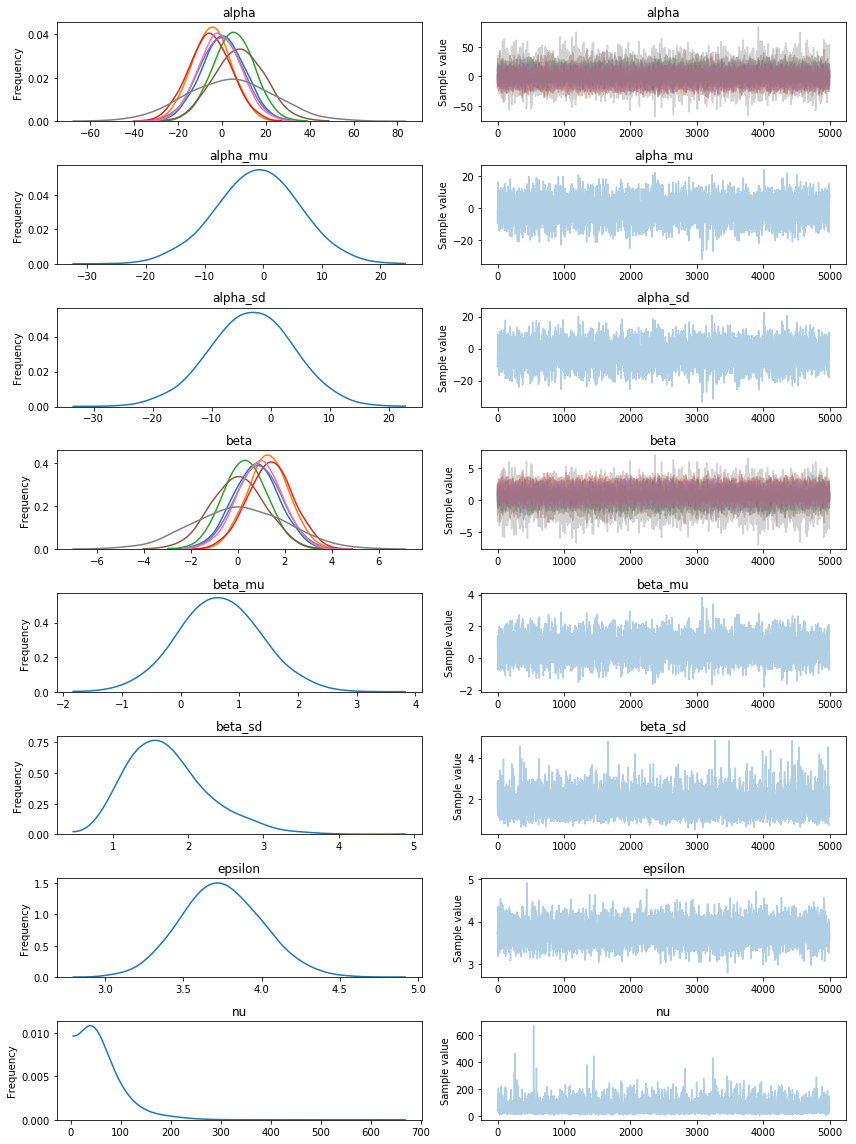

In [19]:
varnames = ['alpha', 'alpha_mu', 'alpha_sd', 'beta', 'beta_mu', 'beta_sd', 'epsilon', 'nu']
pm.traceplot(trace_hm, varnames)

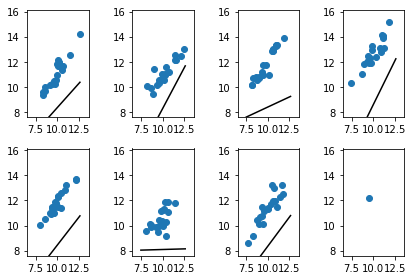

In [21]:
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)
for i in range(M):
    plt.subplot(2, 4, i+1)
    plt.scatter(x_m[j:k], y_m[j:k])
    alpha_m = trace_hm['alpha'][:, i].mean()
    beta_m = trace_hm['beta'][:, i].mean()
    plt.plot(x_range, alpha_m + beta_m * x_range, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))
    plt.xlim(x_m.min()-1, x_m.max()+1)
    plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N
plt.tight_layout()

Text(0, 0.5, '$y$')

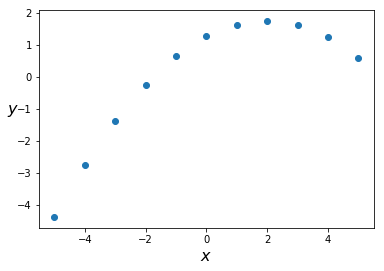

In [22]:
ans = sns.load_dataset('anscombe')
x_2 = ans[ans.dataset == 'II']['x'].values
y_2 = ans[ans.dataset == 'II']['y'].values
x_2 = x_2 - x_2.mean()
y_2 = y_2 - y_2.mean()
plt.scatter(x_2, y_2)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

logp = -36, ||grad|| = 6.753:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -24.68, ||grad|| = 12.417:   0%|          | 10/5000 [00:00<00:02, 2001.86it/s]

logp = -18.161, ||grad|| = 15.314:   0%|          | 20/5000 [00:00<00:02, 2224.39it/s]

logp = -185.37, ||grad|| = 4,417.3:   1%|          | 30/5000 [00:00<00:02, 2310.06it/s]

logp = 6.4929, ||grad|| = 108.69:   1%|          | 40/5000 [00:00<00:02, 2355.39it/s]  

logp = -84,368, ||grad|| = 9.913e+06:   1%|          | 50/5000 [00:00<00:01, 2502.54it/s]

logp = -12,260, ||grad|| = 5.5679e+06:   1%|          | 60/5000 [00:00<00:01, 2502.57it/s]

logp = 21.263, ||grad|| = 32,827:   1%|▏         | 70/5000 [00:00<00:01, 2502.57it/s]     

logp = 48.912, ||grad|| = 4,070.9:   2%|▏         | 80/5000 [00:00<00:01, 2502.59it/s]

logp = 48.968, ||grad|| = 0.080928:   2%|▏         | 90/5000 [00:00<00:01, 2574.09it/s]

logp = 48.968, ||grad|| = 0.080928: 100%|██████████| 92/92 [00:00<00:00, 2489.02it/s]  

Sequential sampling (1 chains in 1 job)

NUTS: [epsilon, beta2, beta1, alpha]

  0%|          | 0/3500 [00:00<?, ?it/s]

  0%|          | 11/3500 [00:00<00:32, 109.02it/s]

  2%|▏         | 74/3500 [00:00<00:23, 144.80it/s]

  4%|▍         | 155/3500 [00:00<00:17, 192.02it/s]

  7%|▋         | 240/3500 [00:00<00:13, 249.90it/s]

  9%|▉         | 325/3500 [00:00<00:10, 316.74it/s]

 12%|█▏        | 417/3500 [00:00<00:07, 393.34it/s]

 15%|█▍        | 508/3500 [00:00<00:06, 473.43it/s]

 17%|█▋        | 593/3500 [00:00<00:05, 545.05it/s]

 19%|█▉        | 676/3500 [00:00<00:04, 606.44it/s]

 22%|██▏       | 756/3500 [00:01<00:04, 646.15it/s]

 24%|██▍       | 840/3500 [00:01<00:03, 692.67it/s]

 27%|██▋       | 932/3500 [00:01<00:03, 746.50it/s]

 29%|██▉       | 1016/3500 [00:01<00:03, 770.38it/s]

 32%|███▏      | 1106/3500 [00:01<00:02, 803.24it/s]

 34%|███▍      | 1193/3500 [00:01<00:02, 820.08it/s]

 37%|███▋      | 1279/3500 [00:01<00:02, 817.68it/s]

 39%|███▉      | 1366/3500 [00:01<00:02, 830.57it/s]

 41%|████▏     | 1451/3500 [00:01<00:02, 822.01it/s]

 44%|████▍     | 1539/3500 [00:01<00:02, 836.44it/s]

 46%|████▋     | 1626/3500 [00:02<00:02, 844.03it/s]

 49%|████▉     | 1720/3500 [00:02<00:02, 868.53it/s]

 52%|█████▏    | 1808/3500 [00:02<00:01, 861.96it/s]

 54%|█████▍    | 1895/3500 [00:02<00:01, 844.50it/s]

 57%|█████▋    | 1980/3500 [00:02<00:01, 841.38it/s]

 59%|█████▉    | 2065/3500 [00:02<00:01, 826.97it/s]

 62%|██████▏   | 2156/3500 [00:02<00:01, 845.75it/s]

 64%|██████▍   | 2242/3500 [00:02<00:01, 842.74it/s]

 66%|██████▋   | 2327/3500 [00:02<00:01, 840.16it/s]

 69%|██████▉   | 2412/3500 [00:02<00:01, 828.56it/s]

 71%|███████▏  | 2500/3500 [00:03<00:01, 841.18it/s]

 74%|███████▍  | 2588/3500 [00:03<00:01, 850.25it/s]

 76%|███████▋  | 2677/3500 [00:03<00:00, 859.56it/s]

 79%|███████▉  | 2764/3500 [00:03<00:00, 842.88it/s]

 81%|████████▏ | 2849/3500 [00:03<00:00, 835.30it/s]

 84%|████████▍ | 2933/3500 [00:03<00:00, 831.99it/s]

 86%|████████▌ | 3018/3500 [00:03<00:00, 835.10it/s]

 89%|████████▊ | 3106/3500 [00:03<00:00, 843.46it/s]

 91%|█████████ | 3191/3500 [00:03<00:00, 843.15it/s]

 94%|█████████▍| 3285/3500 [00:03<00:00, 867.89it/s]

 97%|█████████▋| 3379/3500 [00:04<00:00, 886.08it/s]

 99%|█████████▉| 3468/3500 [00:04<00:00, 871.89it/s]

100%|██████████| 3500/3500 [00:04<00:00, 826.32it/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F18EDDF0B8>,
      dtype=object)

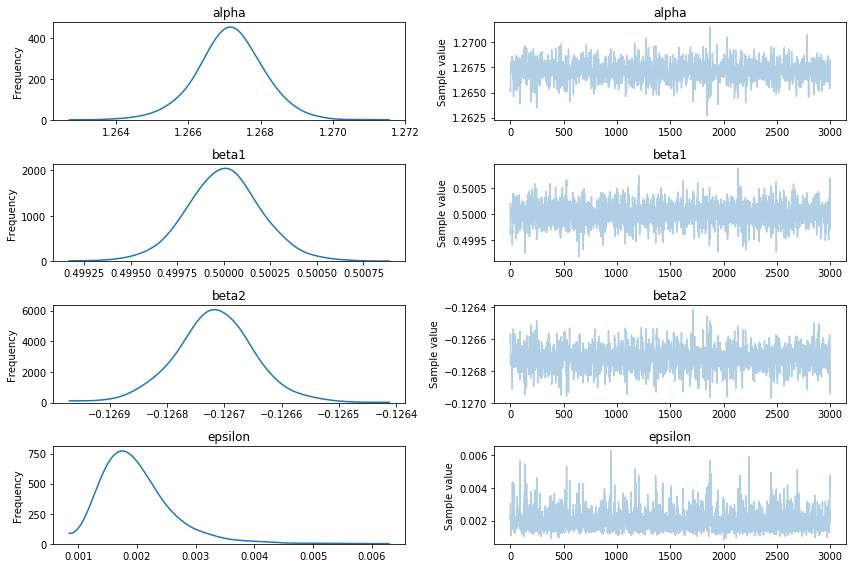

In [23]:
with pm.Model() as model_poly:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta1 = pm.Normal('beta1', mu=0, sd=1)
    beta2 = pm.Normal('beta2', mu=0, sd=1)
    epsilon = pm.Uniform('epsilon', lower=0, upper=10)
    
    mu = alpha + beta1 * x_2 + beta2 * x_2 ** 2
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y_2)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_poly = pm.sample(3000, step=step, start=start, chains=1)
pm.traceplot(trace_poly)

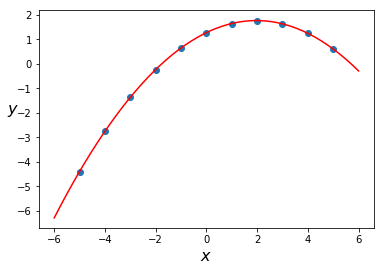

In [24]:
x_p = np.linspace(-6, 6)
y_p = trace_poly['alpha'].mean() + trace_poly['beta1'].mean() * x_p + trace_poly['beta2'].mean() * x_p ** 2
plt.scatter(x_2, y_2)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.plot(x_p, y_p, c='r')

In [2]:
np.random.seed(314)
N = 100
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size=N)

X = np.array([np.random.normal(i, j, N) for i, j in zip([10, 2], [1, 1.5])])
X_mean = X.mean(axis=1, keepdims=True)
X_centered = X - X_mean
y = alpha_real + np.dot(beta_real, X) + eps_real

In [3]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 10))
    for idx, x_i in enumerate(x):
        plt.subplot(2, 2, idx+1)
        plt.scatter(x_i, y)
        plt.xlabel('$x_{}$'.format(idx), fontsize=16)
        plt.ylabel('$y$', rotation=0, fontsize=16)
    
    plt.subplot(2, 2, idx+2)
    plt.scatter(x[0], x[1])
    plt.xlabel('$x_{}$'.format(idx-1), fontsize=16)
    plt.ylabel('$x_{}$'.format(idx), rotation=0, fontsize=16)

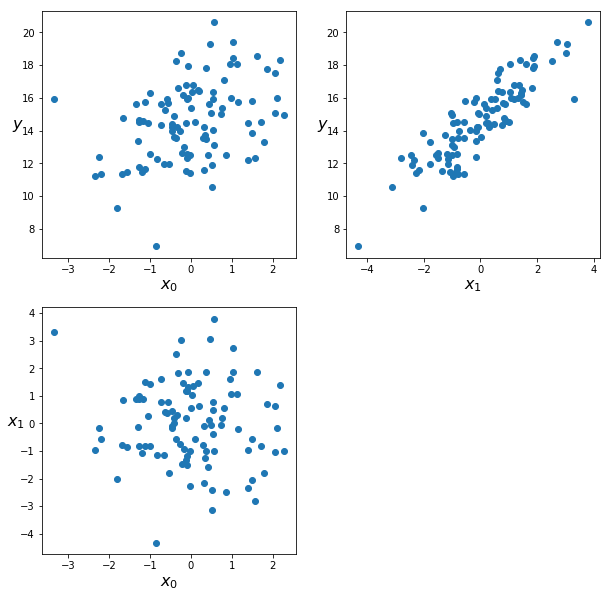

In [4]:
scatter_plot(X_centered, y)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

logp = -698.23, ||grad|| = 776.46:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -347.25, ||grad|| = 95.872:   0%|          | 10/5000 [00:00<00:01, 2502.42it/s]

logp = -478.11, ||grad|| = 1,006.1:   0%|          | 20/5000 [00:00<00:01, 2502.57it/s]

logp = -75.778, ||grad|| = 32.757:   1%|          | 30/5000 [00:00<00:01, 2502.47it/s] 

logp = -75.778, ||grad|| = 32.757: 100%|██████████| 41/41 [00:00<00:00, 2565.13it/s]  

C:\ProgramData\Anaconda3\lib\site-packages\theano\gpuarray\dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "


Sequential sampling (1 chains in 1 job)

NUTS: [epsilon, beta, alpha_tmp]

  0%|          | 0/5500 [00:00<?, ?it/s]

  1%|          | 49/5500 [00:00<00:11, 485.65it/s]

  3%|▎         | 181/5500 [00:00<00:08, 597.75it/s]

  5%|▌         | 289/5500 [00:00<00:07, 686.40it/s]

  7%|▋         | 408/5500 [00:00<00:06, 784.82it/s]

 10%|▉         | 533/5500 [00:00<00:05, 879.91it/s]

 12%|█▏        | 687/5500 [00:00<00:04, 1007.98it/s]

 15%|█▌        | 847/5500 [00:00<00:04, 1131.68it/s]

 18%|█▊        | 1003/5500 [00:00<00:03, 1230.65it/s]

 21%|██        | 1151/5500 [00:00<00:03, 1293.11it/s]

 24%|██▍       | 1312/5500 [00:01<00:03, 1371.11it/s]

 26%|██▋       | 1457/5500 [00:01<00:02, 1362.85it/s]

 29%|██▉       | 1612/5500 [00:01<00:02, 1410.61it/s]

 32%|███▏      | 1758/5500 [00:01<00:02, 1421.34it/s]

 35%|███▍      | 1909/5500 [00:01<00:02, 1443.11it/s]

 38%|███▊      | 2066/5500 [00:01<00:02, 1475.23it/s]

 40%|████      | 2223/5500 [00:01<00:02, 1498.58it/s]

 43%|████▎     | 2375/5500 [00:01<00:02, 1487.73it/s]

 46%|████▌     | 2525/5500 [00:01<00:02, 1483.01it/s]

 49%|████▊     | 2674/5500 [00:01<00:01, 1468.01it/s]

 51%|█████▏    | 2827/5500 [00:02<00:01, 1482.20it/s]

 54%|█████▍    | 2981/5500 [00:02<00:01, 1495.16it/s]

 57%|█████▋    | 3139/5500 [00:02<00:01, 1515.72it/s]

 60%|█████▉    | 3292/5500 [00:02<00:01, 1515.93it/s]

 63%|██████▎   | 3446/5500 [00:02<00:01, 1519.03it/s]

 65%|██████▌   | 3599/5500 [00:02<00:01, 1482.95it/s]

 68%|██████▊   | 3748/5500 [00:02<00:01, 1459.35it/s]

 71%|███████   | 3904/5500 [00:02<00:01, 1484.35it/s]

 74%|███████▍  | 4058/5500 [00:02<00:00, 1492.35it/s]

 77%|███████▋  | 4210/5500 [00:02<00:00, 1496.56it/s]

 79%|███████▉  | 4360/5500 [00:03<00:00, 1467.30it/s]

 82%|████████▏ | 4513/5500 [00:03<00:00, 1481.70it/s]

 85%|████████▍ | 4669/5500 [00:03<00:00, 1500.46it/s]

 88%|████████▊ | 4824/5500 [00:03<00:00, 1511.01it/s]

 90%|█████████ | 4977/5500 [00:03<00:00, 1512.63it/s]

 93%|█████████▎| 5130/5500 [00:03<00:00, 1513.76it/s]

 96%|█████████▌| 5284/5500 [00:03<00:00, 1517.50it/s]

 99%|█████████▉| 5436/5500 [00:03<00:00, 1514.18it/s]

100%|██████████| 5500/5500 [00:03<00:00, 1442.02it/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D227240D30>,
      dtype=object)

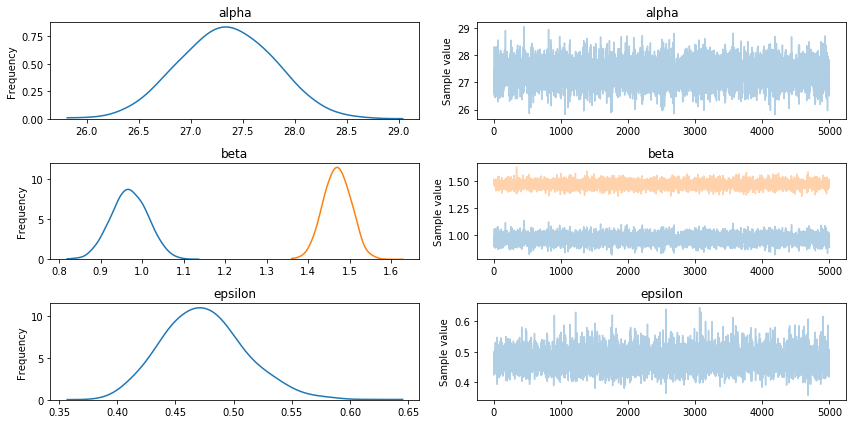

In [5]:
with pm.Model() as model_mlr:
    alpha_tmp = pm.Normal('alpha_tmp', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1, shape=2)
    epsilon = pm.HalfCauchy('epsilon', 5)
    mu = alpha_tmp + pm.math.dot(beta, X_centered)
    alpha = pm.Deterministic('alpha', alpha_tmp + pm.math.dot(beta, X_mean))
    
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_mlr = pm.sample(5000, step=step, start=start, chains=1)
varnames = ['alpha', 'beta', 'epsilon']
pm.traceplot(trace_mlr, varnames)

In [6]:
pm.summary(trace_mlr, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha__0,27.348677,0.456923,0.005468,26.481155,28.238978
beta__0,0.969439,0.043791,0.000521,0.881951,1.051930
beta__1,1.469642,0.032799,0.000332,1.404847,1.530498
epsilon,0.474899,0.035642,0.000477,0.408059,0.544367


In [8]:
N = 100
x_1 = np.random.normal(size=N)
x_2 = x_1 + np.random.normal(size=N, scale=1)
y = x_1 + np.random.normal(size=N)
X = np.vstack((x_1, x_2))

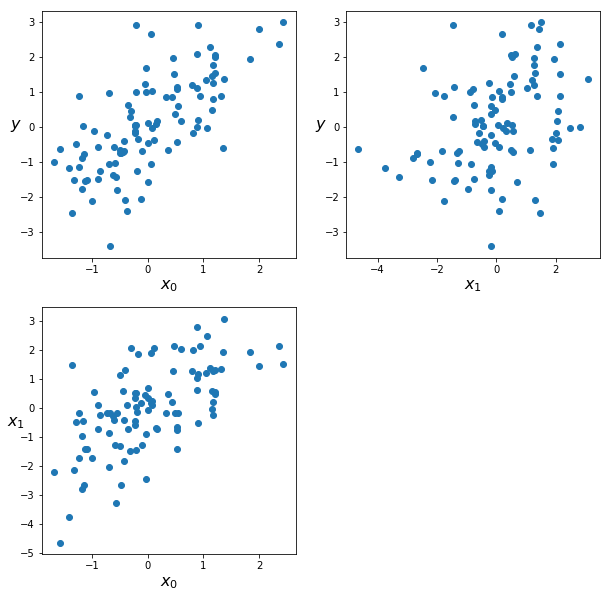

In [9]:
scatter_plot(X, y)

In [10]:
with pm.Model() as model_mlr:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1, shape=2)
    epsilon = pm.HalfCauchy('epsilon', 5)
    mu = alpha + pm.math.dot(beta, X)
    
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_red = pm.sample(5000, step=step, start=start, chains=1)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

logp = -264.3, ||grad|| = 93.796:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -144.23, ||grad|| = 0.083714:   0%|          | 10/5000 [00:00<00:02, 1668.38it/s]

logp = -144.23, ||grad|| = 0.083714: 100%|██████████| 14/14 [00:00<00:00, 1751.75it/s]  

Sequential sampling (1 chains in 1 job)

NUTS: [epsilon, beta, alpha]

  0%|          | 0/5500 [00:00<?, ?it/s]

  1%|▏         | 81/5500 [00:00<00:06, 802.80it/s]

  3%|▎         | 192/5500 [00:00<00:06, 873.64it/s]

  6%|▌         | 306/5500 [00:00<00:05, 937.41it/s]

  8%|▊         | 424/5500 [00:00<00:05, 996.76it/s]

 10%|▉         | 544/5500 [00:00<00:04, 1047.65it/s]

 12%|█▏        | 664/5500 [00:00<00:04, 1086.48it/s]

 14%|█▍        | 792/5500 [00:00<00:04, 1135.38it/s]

 17%|█▋        | 910/5500 [00:00<00:04, 1145.41it/s]

 19%|█▉        | 1036/5500 [00:00<00:03, 1171.31it/s]

 21%|██        | 1163/5500 [00:01<00:03, 1196.23it/s]

 23%|██▎       | 1282/5500 [00:01<00:03, 1170.08it/s]

 26%|██▌       | 1415/5500 [00:01<00:03, 1210.89it/s]

 28%|██▊       | 1536/5500 [00:01<00:03, 1207.38it/s]

 30%|███       | 1660/5500 [00:01<00:03, 1210.23it/s]

 32%|███▏      | 1786/5500 [00:01<00:03, 1221.55it/s]

 35%|███▍      | 1909/5500 [00:01<00:02, 1199.39it/s]

 37%|███▋      | 2031/5500 [00:01<00:02, 1202.31it/s]

 39%|███▉      | 2156/5500 [00:01<00:02, 1213.06it/s]

 41%|████▏     | 2278/5500 [00:01<00:02, 1204.71it/s]

 44%|████▎     | 2399/5500 [00:02<00:02, 1203.06it/s]

 46%|████▌     | 2520/5500 [00:02<00:02, 1191.28it/s]

 48%|████▊     | 2642/5500 [00:02<00:02, 1196.59it/s]

 50%|█████     | 2772/5500 [00:02<00:02, 1222.74it/s]

 53%|█████▎    | 2895/5500 [00:02<00:02, 1218.01it/s]

 55%|█████▍    | 3017/5500 [00:02<00:02, 1211.72it/s]

 57%|█████▋    | 3139/5500 [00:02<00:01, 1186.25it/s]

 59%|█████▉    | 3266/5500 [00:02<00:01, 1207.10it/s]

 62%|██████▏   | 3387/5500 [00:02<00:01, 1201.15it/s]

 64%|██████▍   | 3513/5500 [00:02<00:01, 1215.06it/s]

 66%|██████▌   | 3635/5500 [00:03<00:01, 1202.53it/s]

 68%|██████▊   | 3764/5500 [00:03<00:01, 1224.36it/s]

 71%|███████   | 3887/5500 [00:03<00:01, 1219.14it/s]

 73%|███████▎  | 4010/5500 [00:03<00:01, 1219.12it/s]

 75%|███████▌  | 4135/5500 [00:03<00:01, 1224.98it/s]

 77%|███████▋  | 4258/5500 [00:03<00:01, 1223.20it/s]

 80%|███████▉  | 4381/5500 [00:03<00:00, 1214.64it/s]

 82%|████████▏ | 4503/5500 [00:03<00:00, 1174.57it/s]

 84%|████████▍ | 4622/5500 [00:03<00:00, 1176.02it/s]

 86%|████████▌ | 4740/5500 [00:03<00:00, 1153.43it/s]

 88%|████████▊ | 4857/5500 [00:04<00:00, 1155.27it/s]

 91%|█████████ | 4983/5500 [00:04<00:00, 1181.83it/s]

 93%|█████████▎| 5102/5500 [00:04<00:00, 1153.65it/s]

 95%|█████████▍| 5218/5500 [00:04<00:00, 1149.04it/s]

 97%|█████████▋| 5338/5500 [00:04<00:00, 1160.84it/s]

 99%|█████████▉| 5455/5500 [00:04<00:00, 1157.03it/s]

100%|██████████| 5500/5500 [00:04<00:00, 1185.28it/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

In [11]:
pm.summary(trace_red)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,0.063402,0.098098,0.001143,-0.129470,0.262519
beta__0,1.203698,0.143222,0.002859,0.921308,1.476681
beta__1,-0.173502,0.086532,0.001824,-0.350173,-0.012815
epsilon,0.974334,0.070278,0.000815,0.841017,1.110187


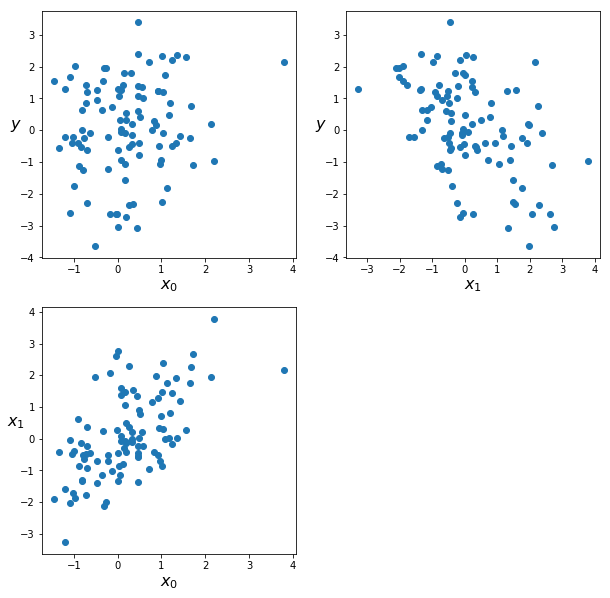

In [12]:
N = 100
r = 0.8
x_0 = np.random.normal(size=N)
x_1 = x_1 + np.random.normal(loc=x_0*r, scale=(1-r**2)**0.5)
y = np.random.normal(loc=x_0-x_1)
X = np.vstack((x_0, x_1))
scatter_plot(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

logp = -269.6, ||grad|| = 92.382:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -155.38, ||grad|| = 0.053386:   0%|          | 10/5000 [00:00<00:02, 2001.77it/s]

logp = -155.38, ||grad|| = 0.053386: 100%|██████████| 14/14 [00:00<00:00, 2001.85it/s]  

Sequential sampling (1 chains in 1 job)

NUTS: [epsilon, beta, alpha]

  0%|          | 0/5500 [00:00<?, ?it/s]

  2%|▏         | 92/5500 [00:00<00:05, 902.89it/s]

  4%|▍         | 207/5500 [00:00<00:05, 962.93it/s]

  6%|▌         | 326/5500 [00:00<00:05, 1019.05it/s]

  8%|▊         | 434/5500 [00:00<00:04, 1033.93it/s]

 10%|▉         | 546/5500 [00:00<00:04, 1055.64it/s]

 12%|█▏        | 659/5500 [00:00<00:04, 1074.15it/s]

 14%|█▍        | 783/5500 [00:00<00:04, 1116.34it/s]

 16%|█▋        | 903/5500 [00:00<00:04, 1137.28it/s]

 19%|█▊        | 1024/5500 [00:00<00:03, 1151.89it/s]

 21%|██        | 1149/5500 [00:01<00:03, 1176.68it/s]

 23%|██▎       | 1274/5500 [00:01<00:03, 1194.68it/s]

 25%|██▌       | 1402/5500 [00:01<00:03, 1215.94it/s]

 28%|██▊       | 1523/5500 [00:01<00:03, 1203.66it/s]

 30%|██▉       | 1643/5500 [00:01<00:03, 1185.13it/s]

 32%|███▏      | 1767/5500 [00:01<00:03, 1197.95it/s]

 34%|███▍      | 1887/5500 [00:01<00:03, 1174.32it/s]

 37%|███▋      | 2012/5500 [00:01<00:02, 1189.57it/s]

 39%|███▉      | 2133/5500 [00:01<00:02, 1192.46it/s]

 41%|████      | 2254/5500 [00:01<00:02, 1194.49it/s]

 43%|████▎     | 2375/5500 [00:02<00:02, 1195.91it/s]

 45%|████▌     | 2501/5500 [00:02<00:02, 1211.30it/s]

 48%|████▊     | 2626/5500 [00:02<00:02, 1219.45it/s]

 50%|████▉     | 2749/5500 [00:02<00:02, 1219.33it/s]

 52%|█████▏    | 2871/5500 [00:02<00:02, 1216.26it/s]

 54%|█████▍    | 2993/5500 [00:02<00:02, 1210.51it/s]

 57%|█████▋    | 3117/5500 [00:02<00:01, 1216.00it/s]

 59%|█████▉    | 3239/5500 [00:02<00:01, 1203.17it/s]

 61%|██████    | 3360/5500 [00:02<00:01, 1194.87it/s]

 63%|██████▎   | 3480/5500 [00:02<00:01, 1179.15it/s]

 65%|██████▌   | 3598/5500 [00:03<00:01, 1162.35it/s]

 68%|██████▊   | 3720/5500 [00:03<00:01, 1176.01it/s]

 70%|██████▉   | 3838/5500 [00:03<00:01, 1174.05it/s]

 72%|███████▏  | 3957/5500 [00:03<00:01, 1175.54it/s]

 74%|███████▍  | 4075/5500 [00:03<00:01, 1173.85it/s]

 76%|███████▋  | 4200/5500 [00:03<00:01, 1192.63it/s]

 79%|███████▊  | 4325/5500 [00:03<00:00, 1206.14it/s]

 81%|████████  | 4452/5500 [00:03<00:00, 1221.45it/s]

 83%|████████▎ | 4575/5500 [00:03<00:00, 1209.94it/s]

 85%|████████▌ | 4697/5500 [00:03<00:00, 1199.01it/s]

 88%|████████▊ | 4818/5500 [00:04<00:00, 1195.53it/s]

 90%|████████▉ | 4938/5500 [00:04<00:00, 1193.67it/s]

 92%|█████████▏| 5058/5500 [00:04<00:00, 1181.80it/s]

 94%|█████████▍| 5178/5500 [00:04<00:00, 1184.05it/s]

 96%|█████████▋| 5297/5500 [00:04<00:00, 1179.15it/s]

 98%|█████████▊| 5415/5500 [00:04<00:00, 1169.26it/s]

100%|██████████| 5500/5500 [00:04<00:00, 1180.71it/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D22A993E48>,
      dtype=object)

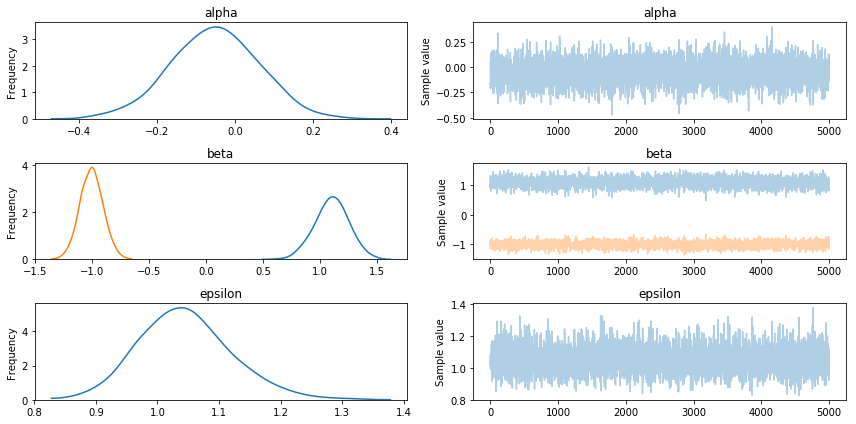

In [13]:
with pm.Model() as model_mlr:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    epsilon = pm.HalfCauchy('epsilon', 5)
    mu = alpha + pm.math.dot(beta, X)
    
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_ma = pm.sample(5000, step=step, start=start, chains=1)
pm.traceplot(trace_ma)